In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## Loading data


In [11]:

# load dataset
dataset = pd.read_excel(io="./FOR CODE-V5.0-all indexes.xlsx", sheet_name=1, convert_float=False)
dataset = dataset.drop(['编号', '门诊号', 'BA', '姓名', '电话', '时间', "BA", "是否转阳*", '是否治疗'],axis=1)
for i in list(dataset.columns):
    if dataset[i].dtypes == 'object':
        dataset[i] = pd.to_numeric(dataset[i], errors='coerce')
print(dataset.info())
# print(dataset.columns)
# dataset_non_tranmit = dataset[dataset.non_severe_to_severe != 1]
y = "是否分娩"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Columns: 103 entries, 是否分娩 to 血液免疫常规-F
dtypes: float64(103)
memory usage: 1.5 MB
None


## Loading data


In [56]:
print(dataset.columns)
# dataset_non_tranmit = dataset[dataset.non_severe_to_severe != 1]
VARS_ALL = {"num":[], 'cate':[]}


for i in list(dataset.columns[1:]):
    if i in ['胚胎染色体有无异常', '男方外周血染色体有无异常', '女方外周染色体有无异常', '血型(+/-)', '血型（ABO)'
    ,'APS SCORE', 'Infertility-related SCORE', 'Infection Score', '既往月经周期*', '经量', '痛经', '丈夫情况*', '清宫', 
             '妇科疾病史','流产期']:
        VARS_ALL["cate"].append(i)
    elif ('F' not in i) or (i in ['FSH', 'FT3', 'FT4']):
        VARS_ALL["num"].append(i)
    else:
        VARS_ALL['cate'].append(i)
ALL_X = [*VARS_ALL["num"], *VARS_ALL["cate"]]
print(len(VARS_ALL["num"]))
print(len(VARS_ALL["cate"]))


Index(['是否分娩', '年龄', '体重/KG', '身高/cm', 'BMI/kg^m3', '孕次', '产次', '剖宫产次', '顺产次',
       '引产次',
       ...
       '支原体-F', '衣原体-F', '血常规-F', '血型(+/-)', '血型（ABO)', '凝血-F2', '肝肾功能-F2',
       '血糖-F', '血脂-F', '血液免疫常规-F'],
      dtype='object', length=103)
40
62


是否分娩 variable  value
0      1.0       年龄   24.0
1      1.0       年龄   27.0
2      1.0       年龄   36.0
3      0.0       年龄   35.0
4      1.0       年龄   25.0
...    ...      ...    ...
1870   0.0       年龄   30.0
1871   1.0       年龄   27.0
1872   0.0       年龄   27.0
1873   0.0       年龄   32.0
1874   1.0       年龄   30.0

[1859 rows x 3 columns]

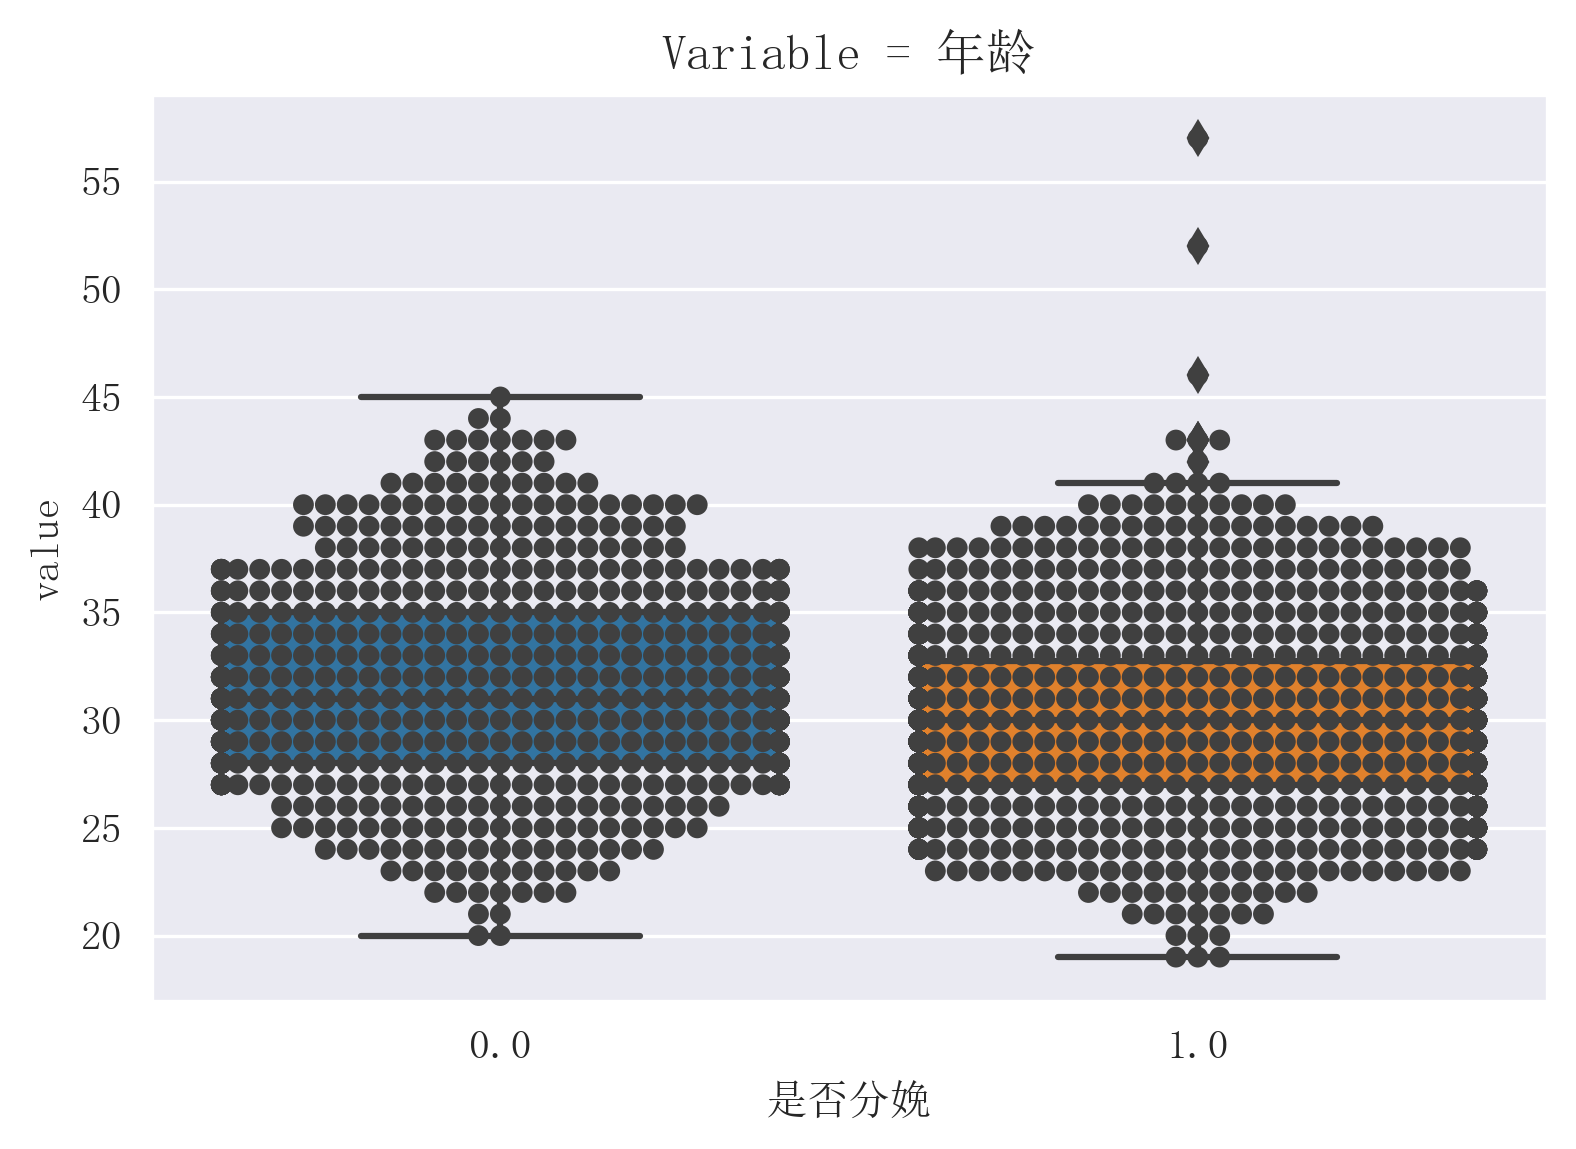

In [45]:
from IPython.display import display, IFrame,Image
dataset_num = dataset[VARS_ALL["num"]+[y]]

for i in VARS_ALL['num']:
    dataset_melt = pd.melt(dataset_num, id_vars=y, value_vars= i).dropna()
    # display(dataset_melt[dataset_melt.isnull().T.any()])
    display(dataset_melt)
    sns.set_style("darkgrid",{"font.sans-serif":["SimSun"]})
    plt.figure(dpi=300)
    sns.boxplot(x=y,y="value",data=dataset_melt)
    plt.title("Variable = %s"%(i))
    if '/' in i:
        plt.savefig('./fig/%s.png'%(i[:i.find('/')]))
    else:  
        plt.savefig('./fig/%s.png'%(i))
    plt.show()

C:\Users\14599\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


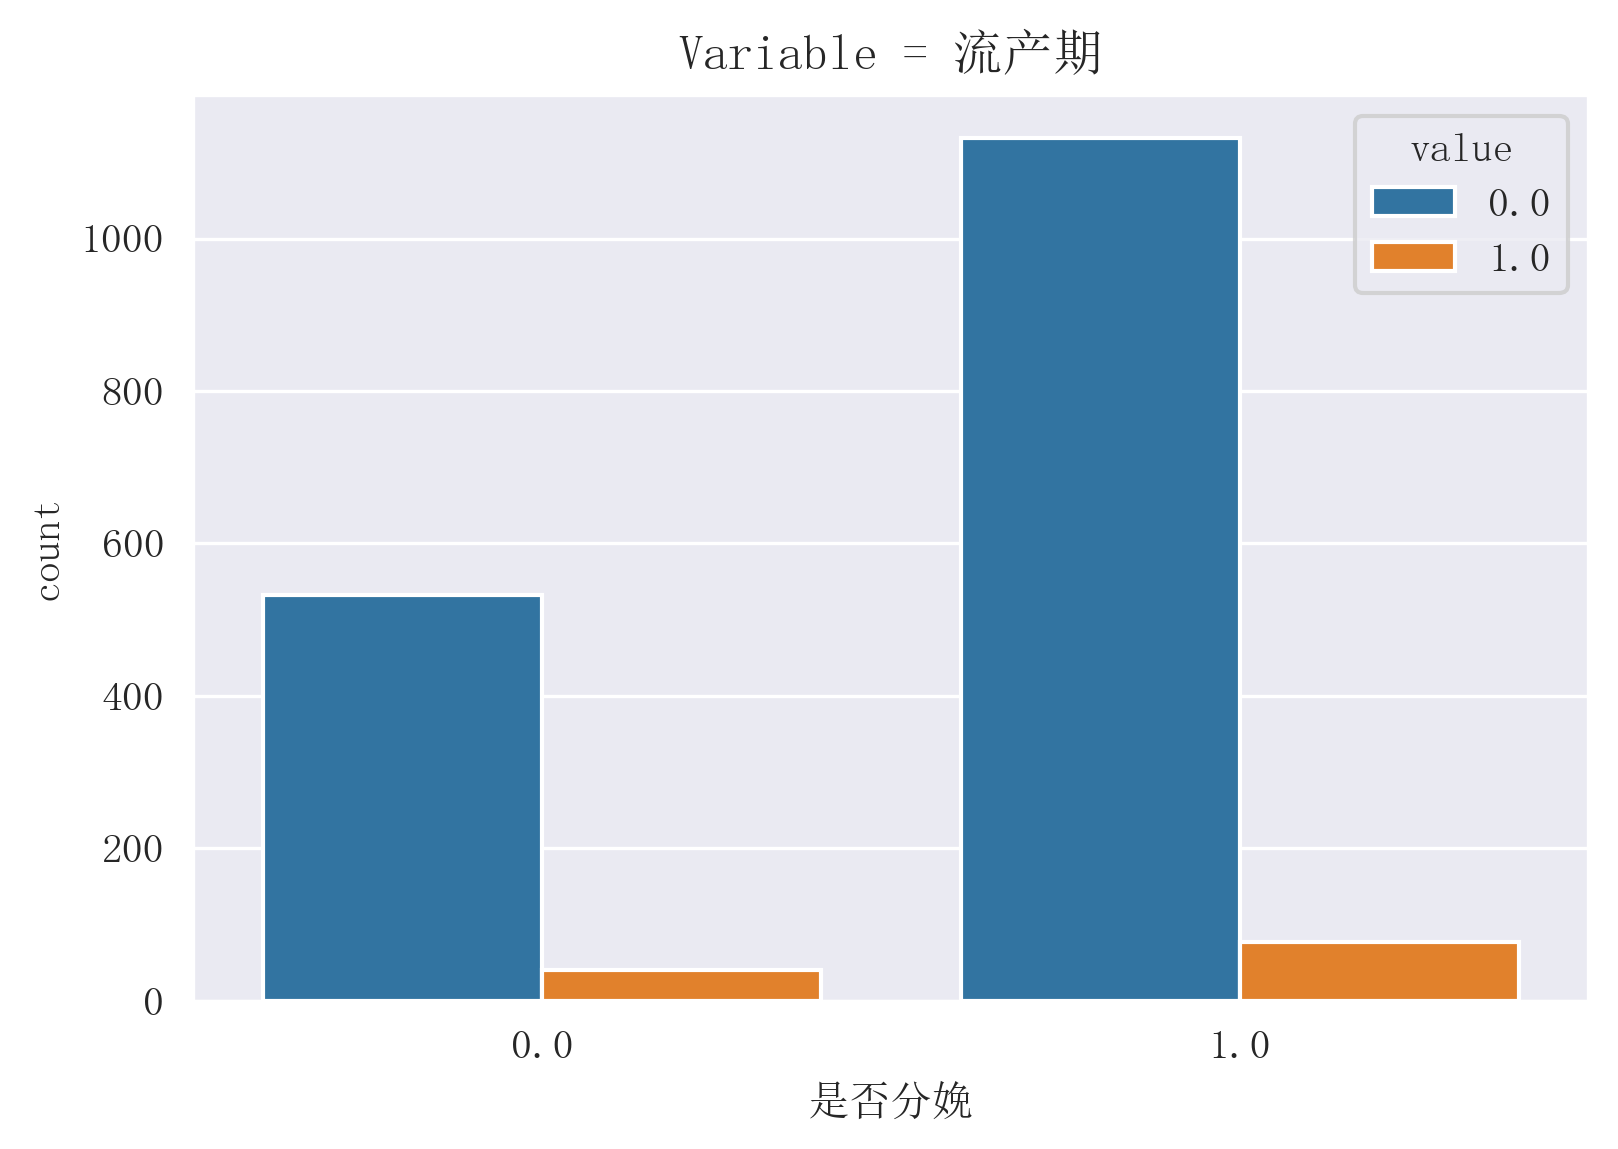

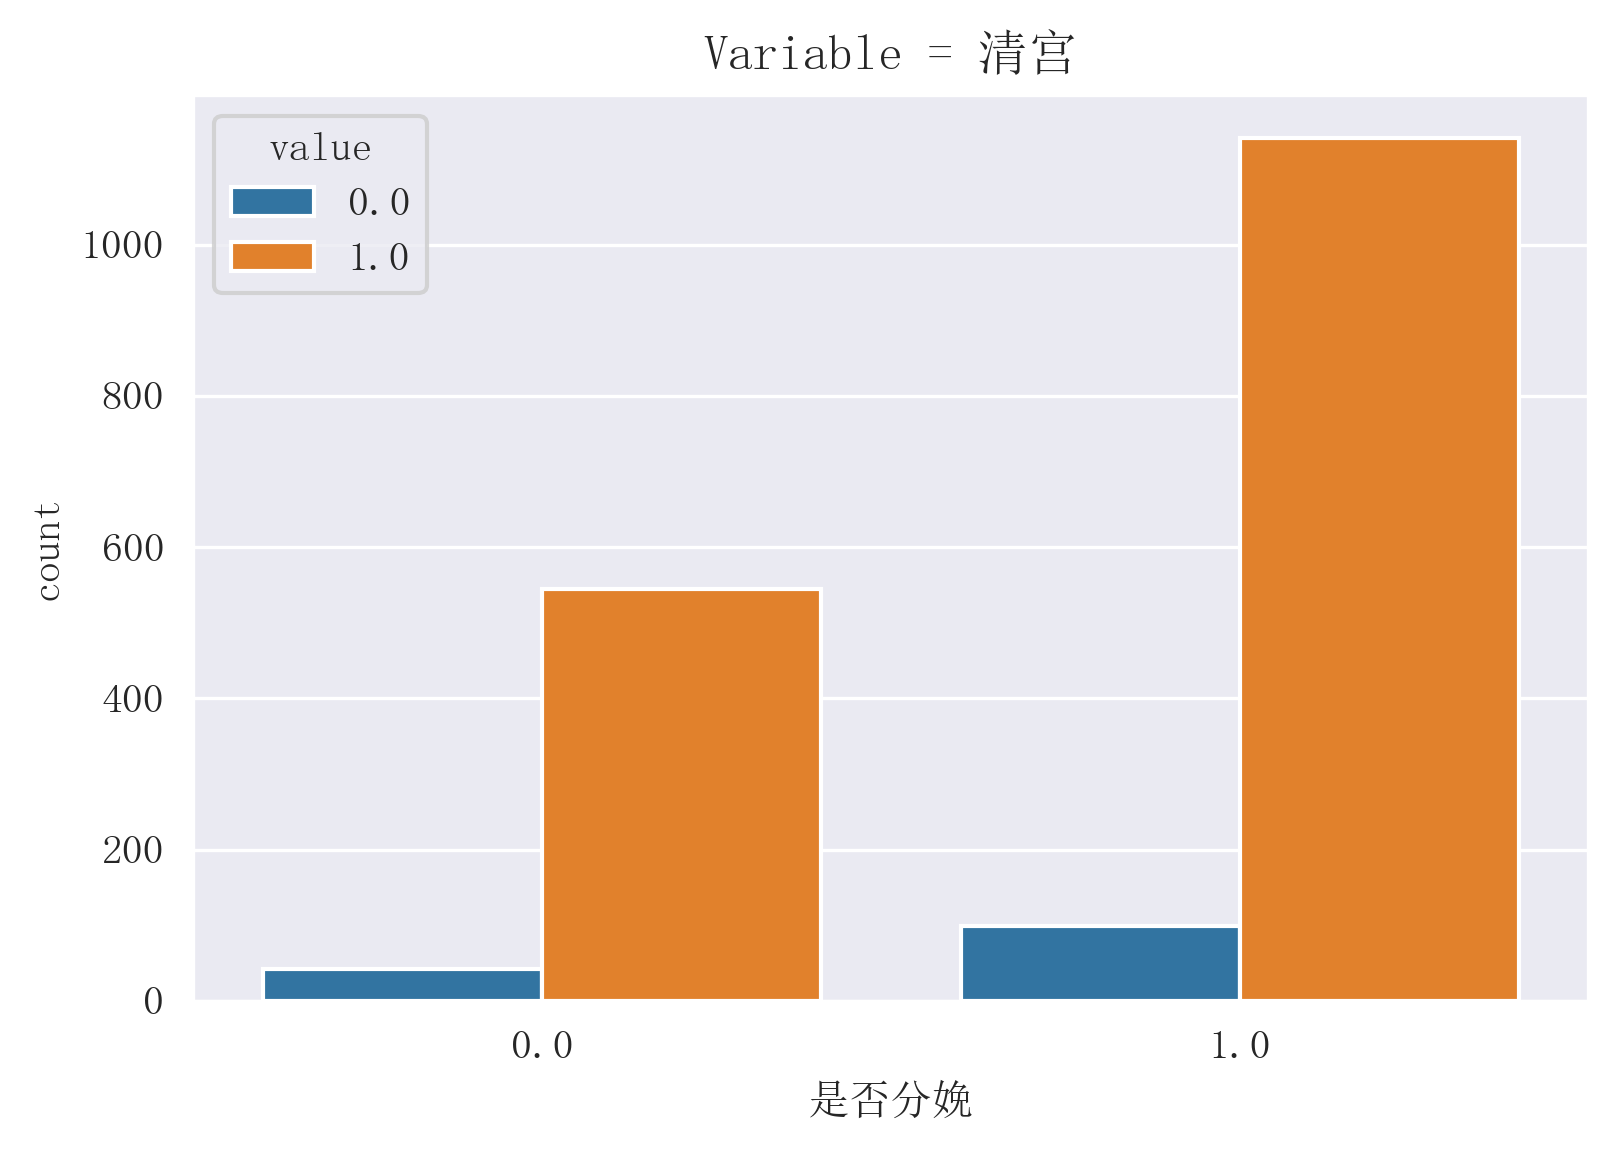

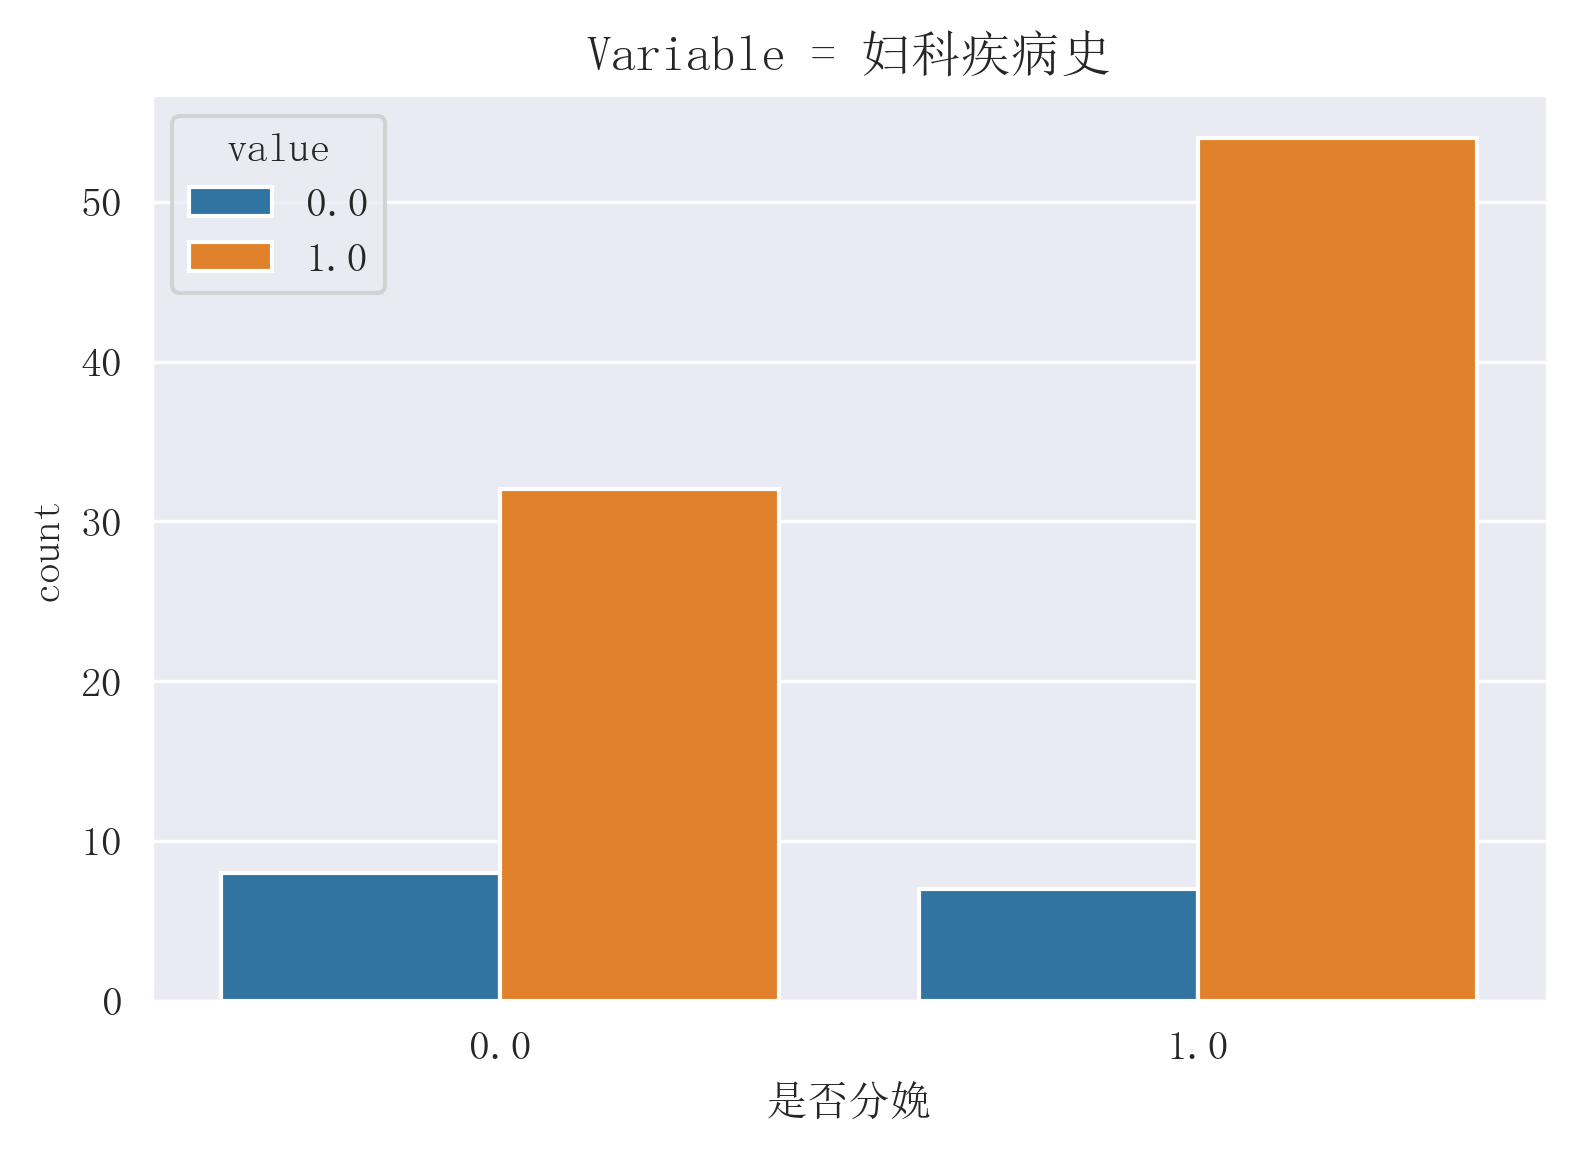

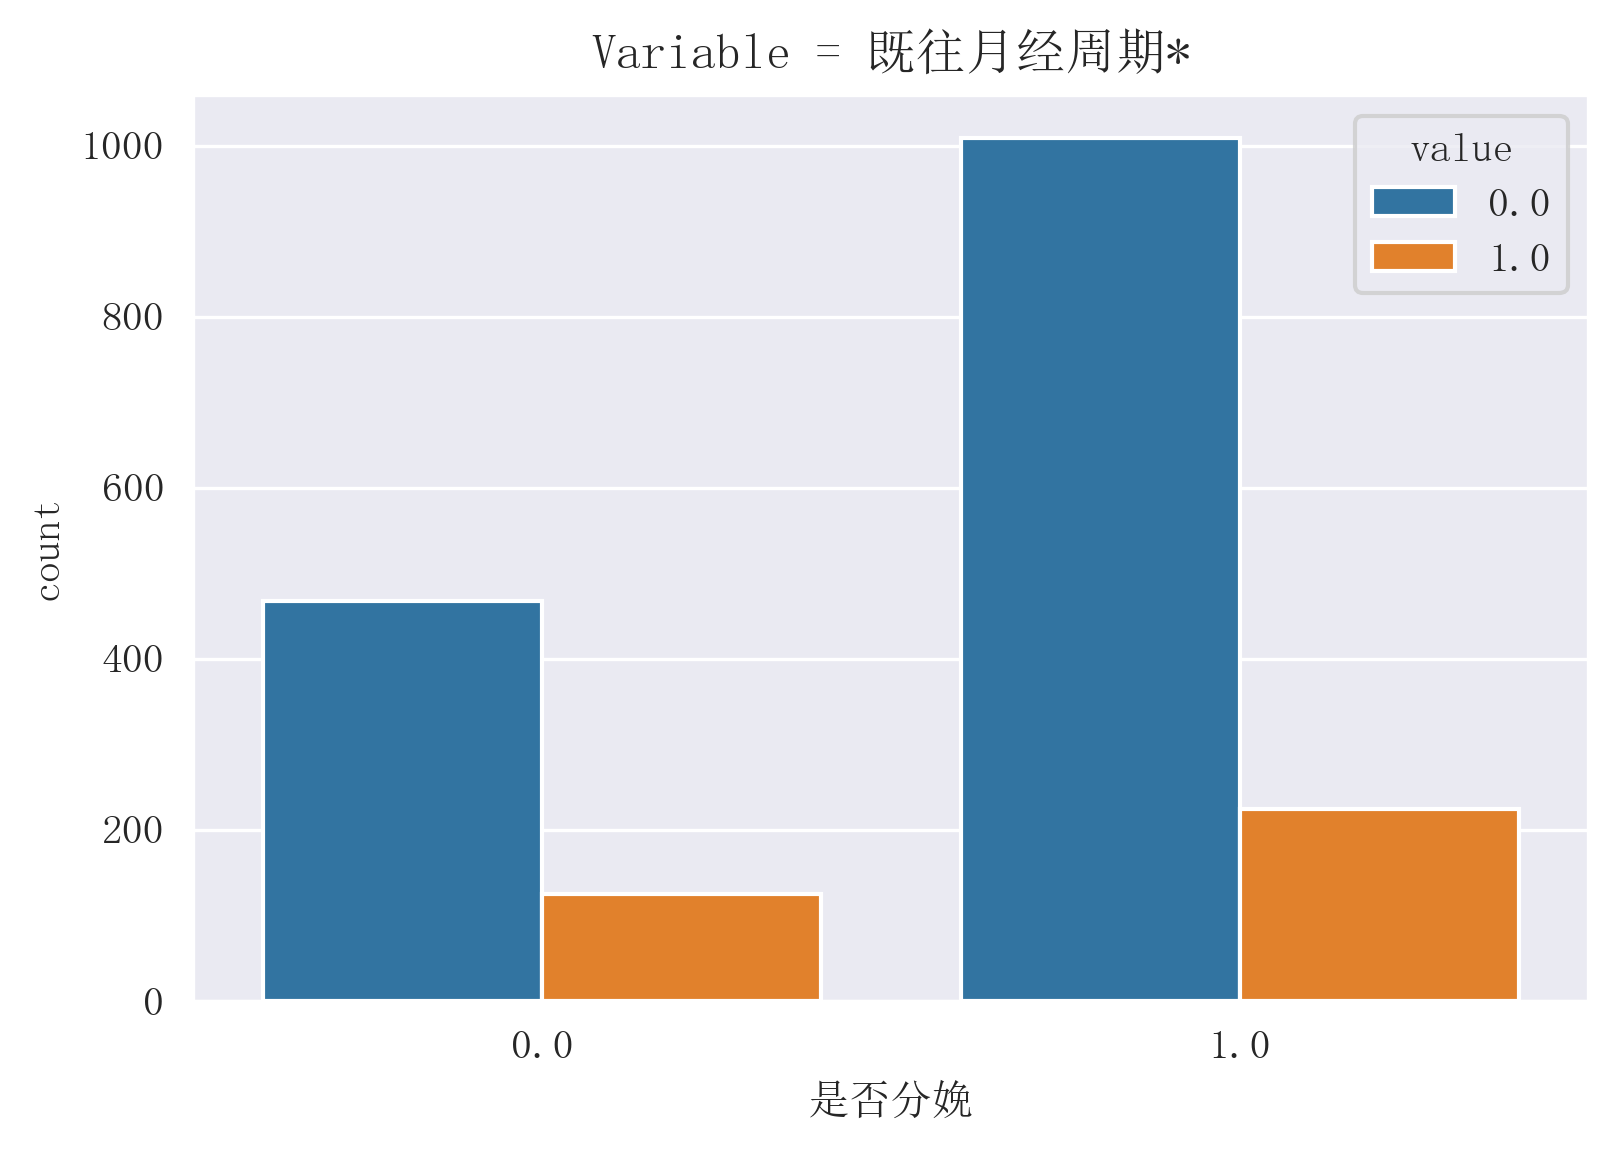

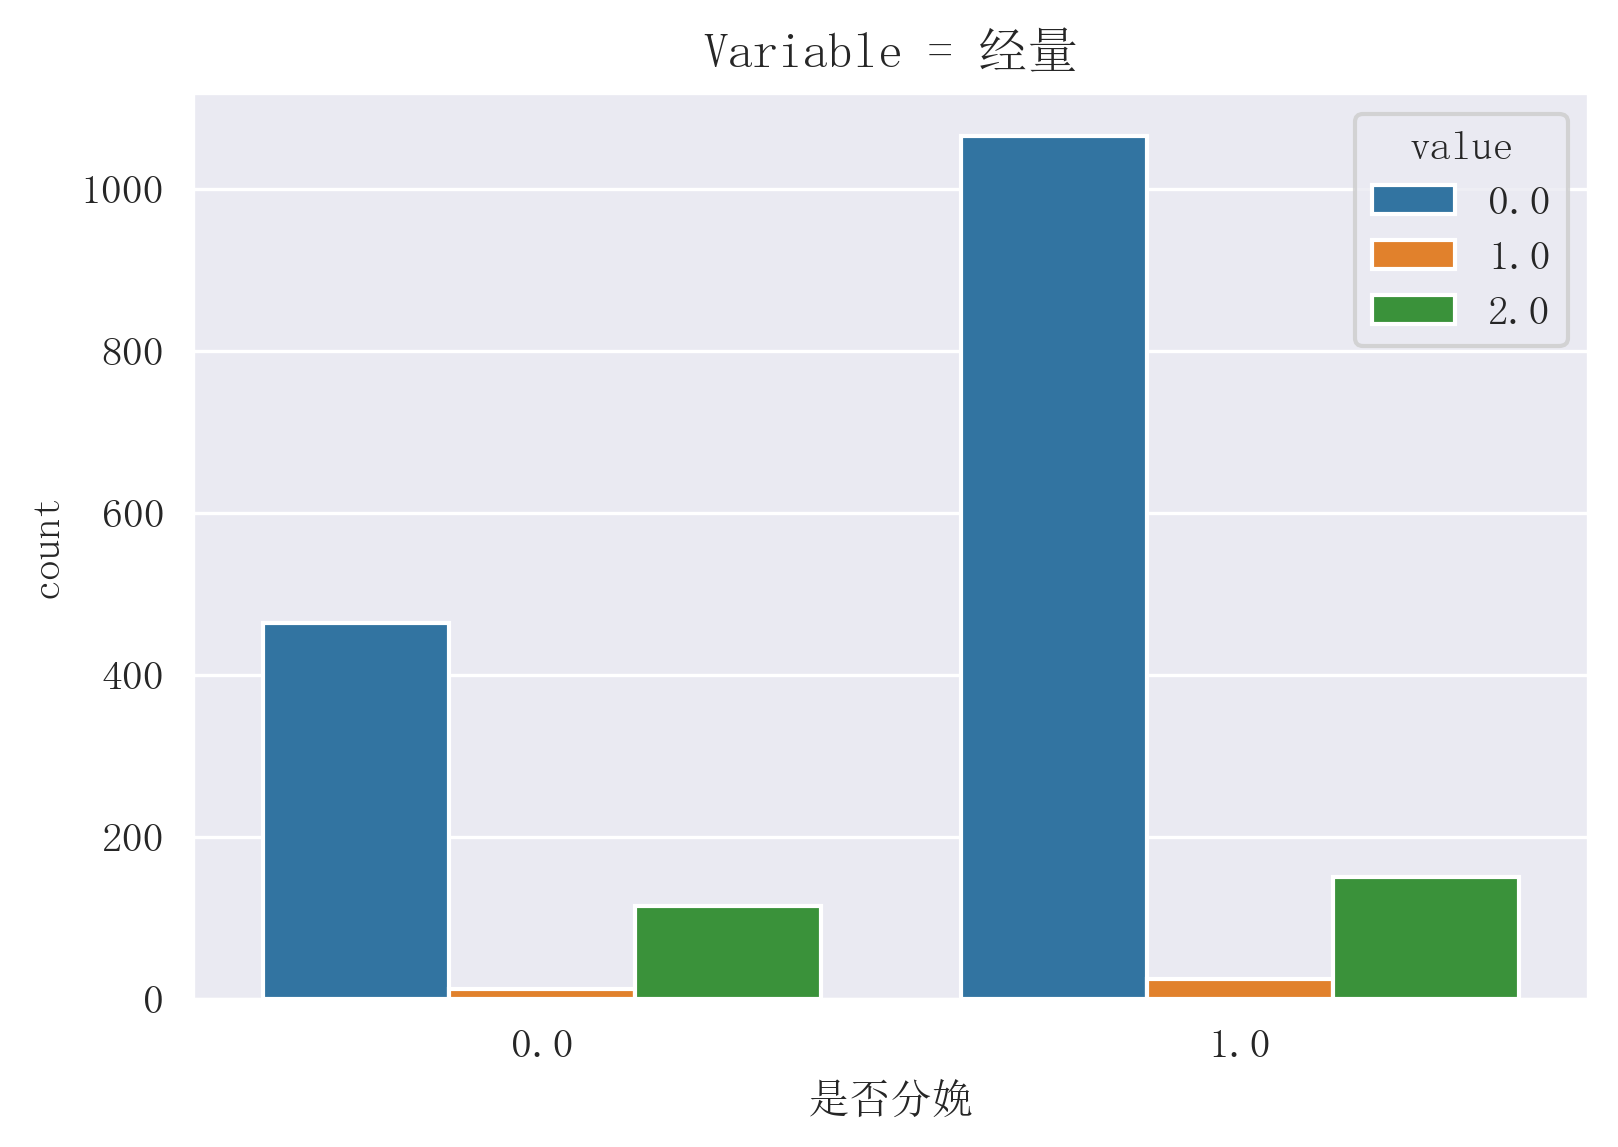

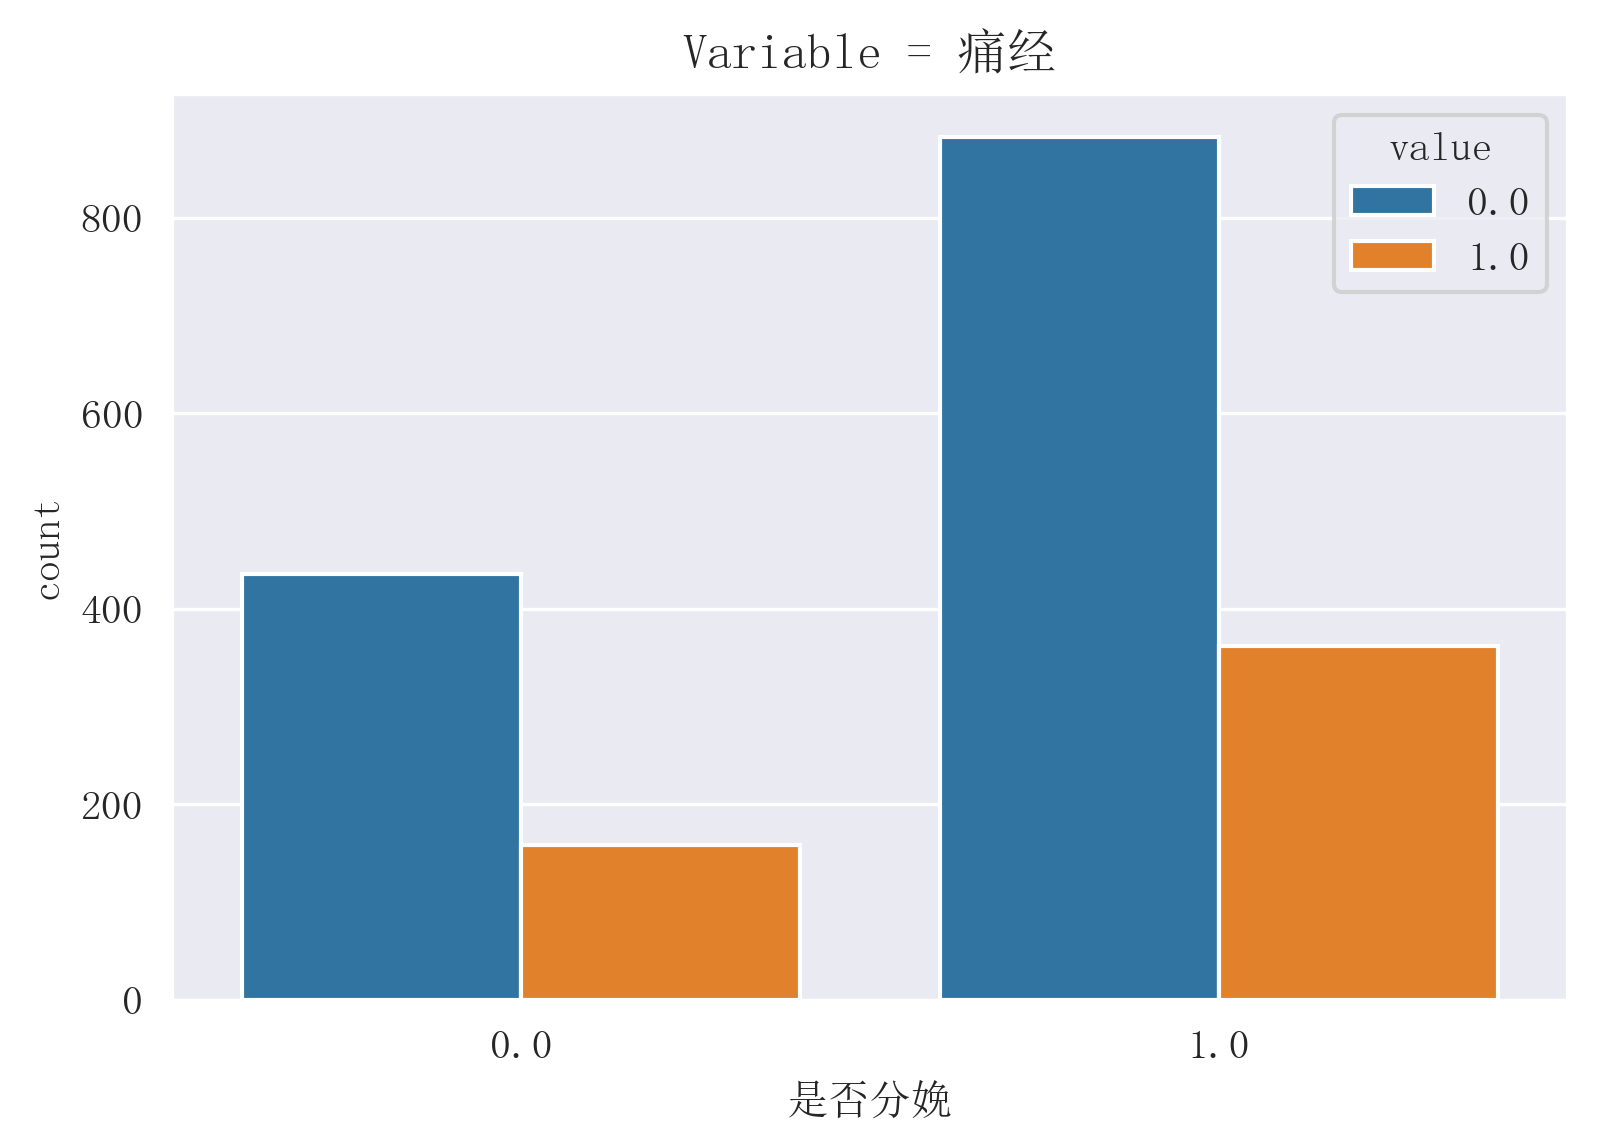

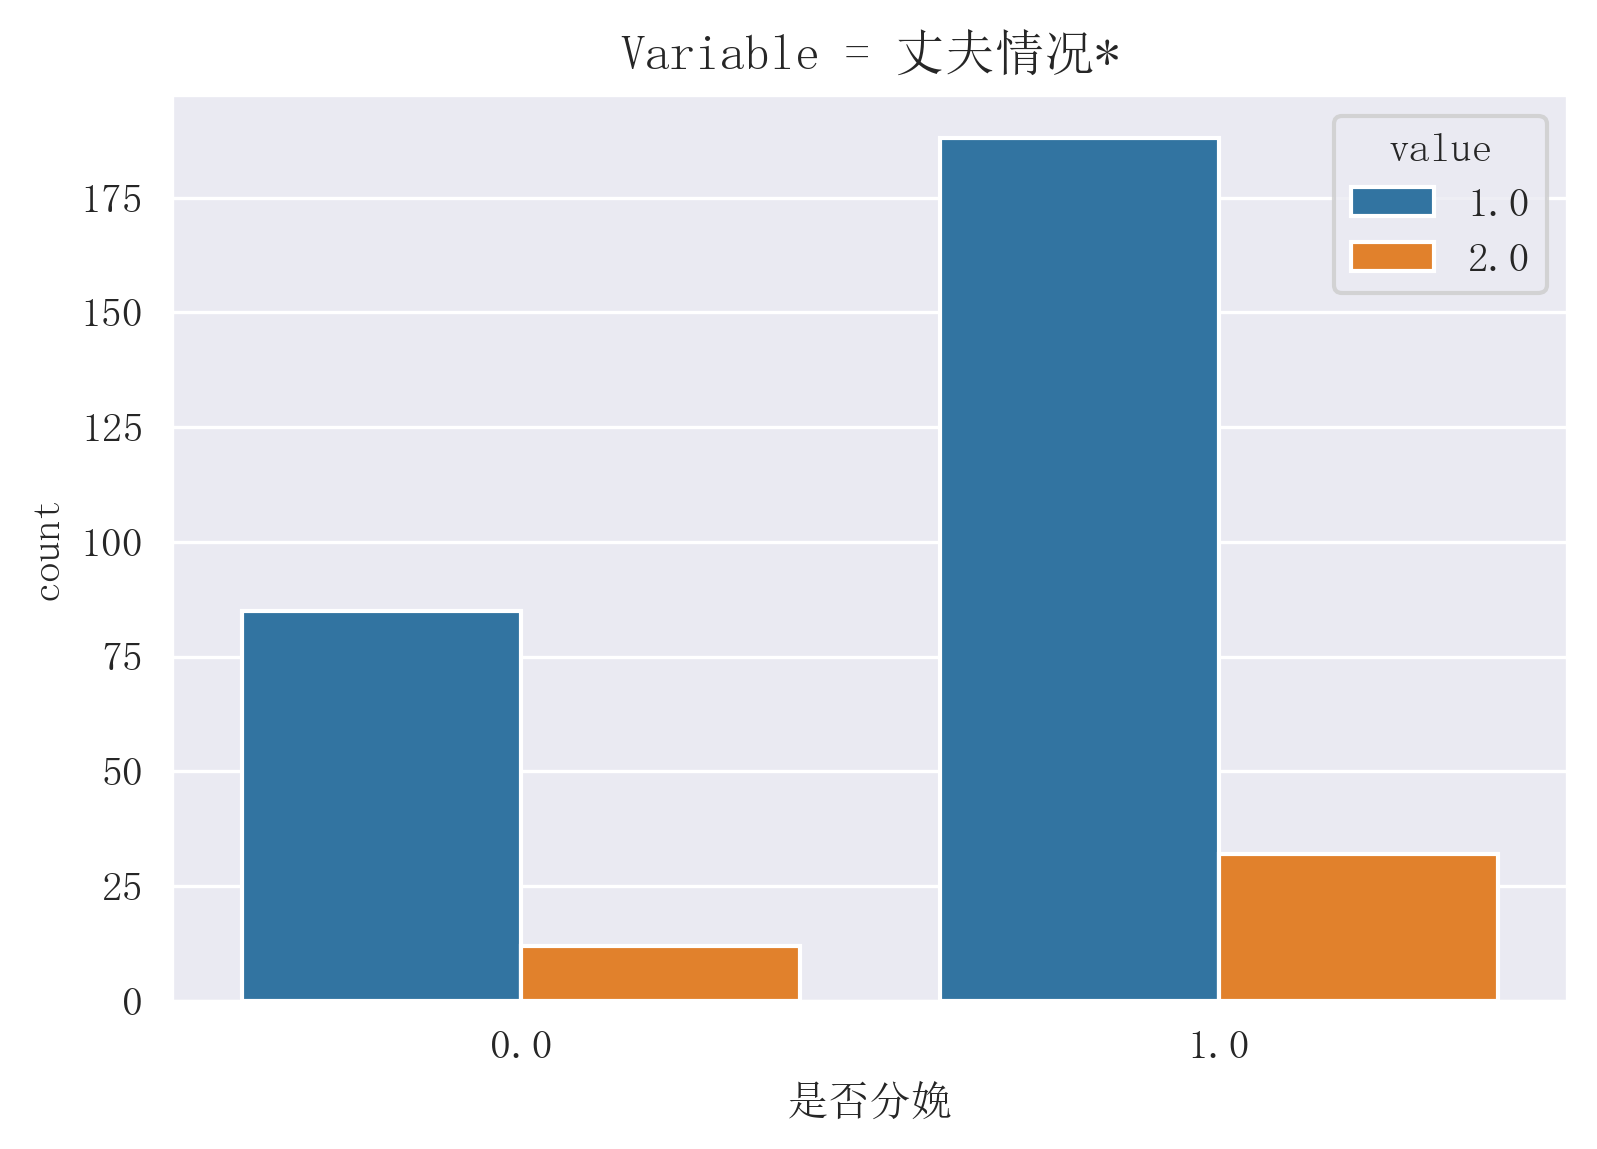

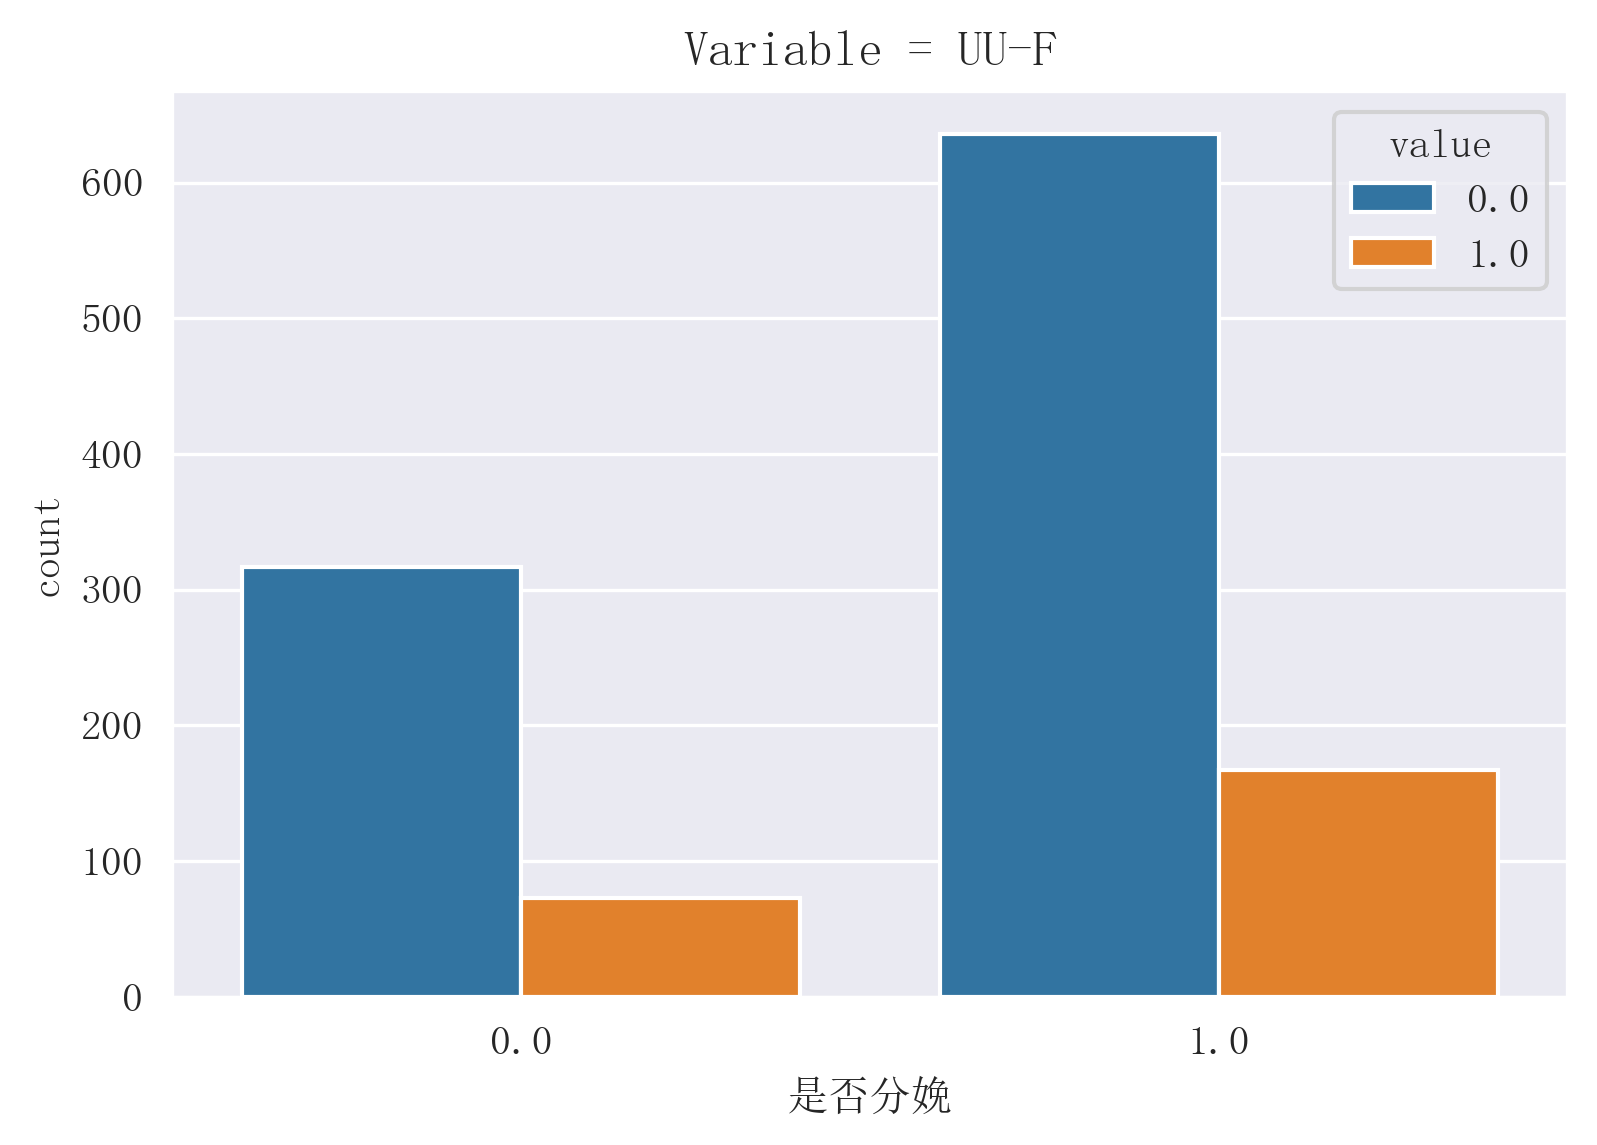

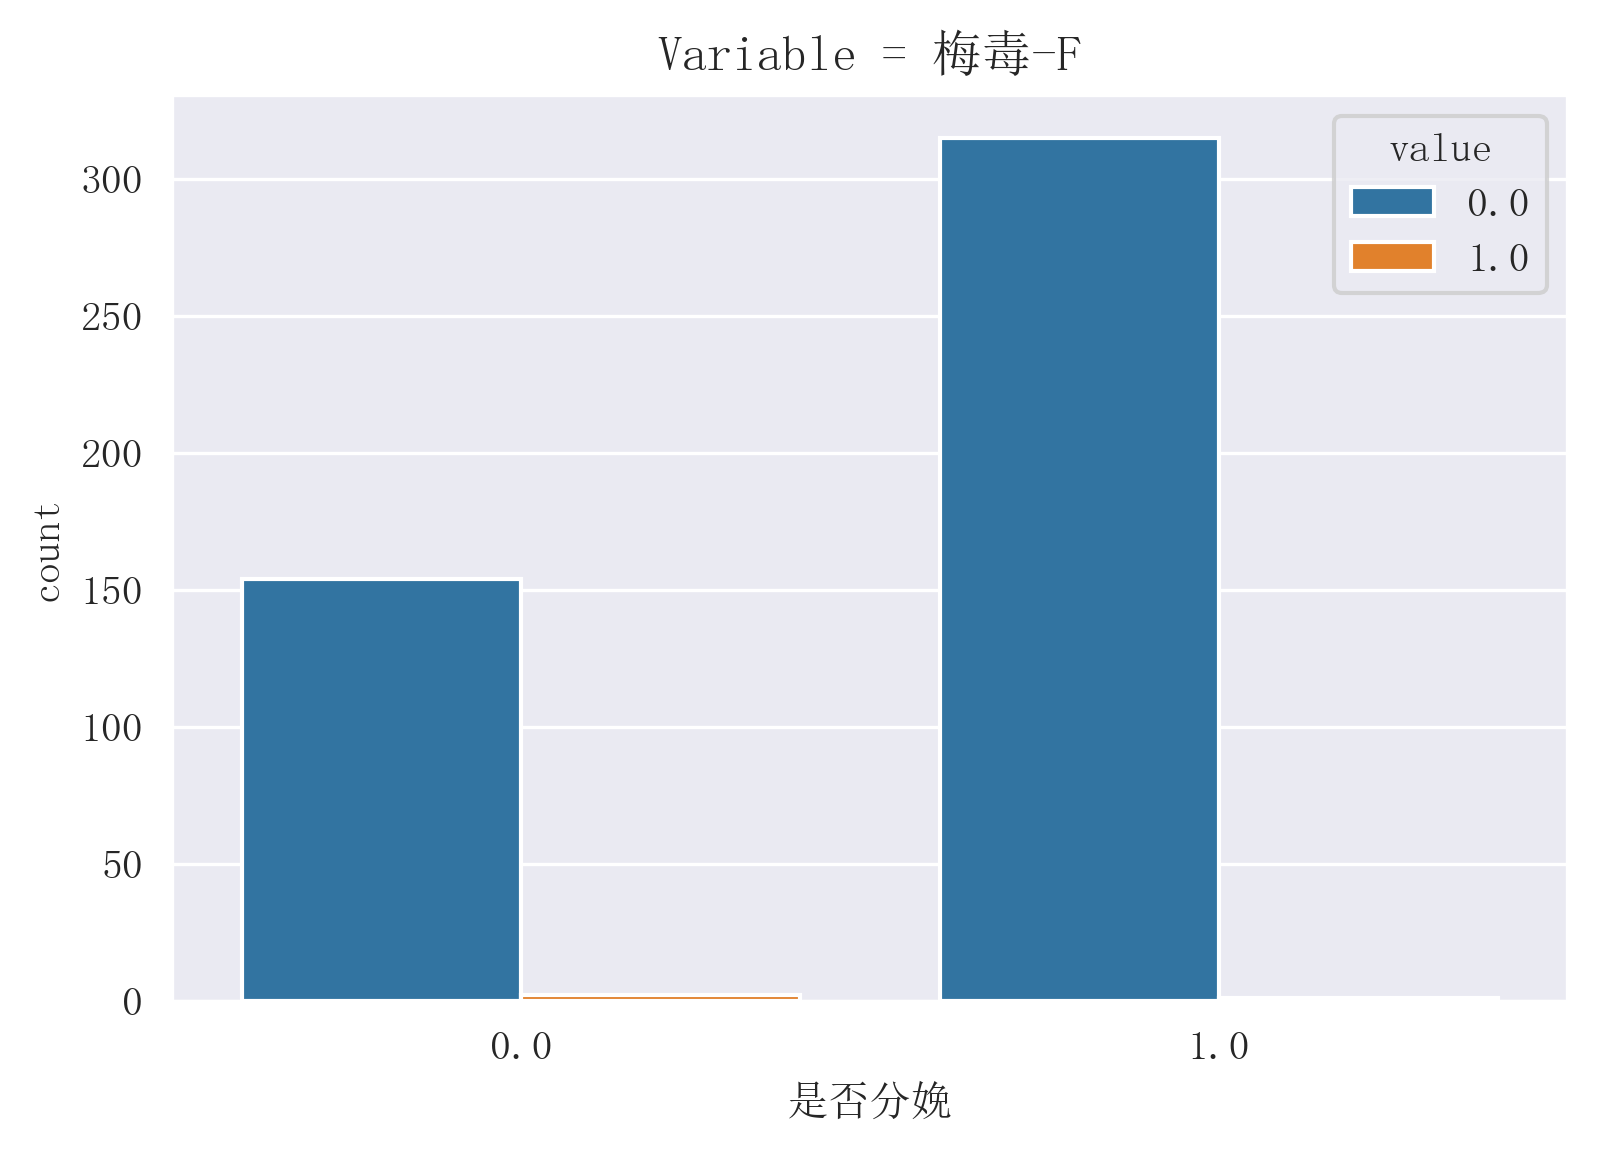

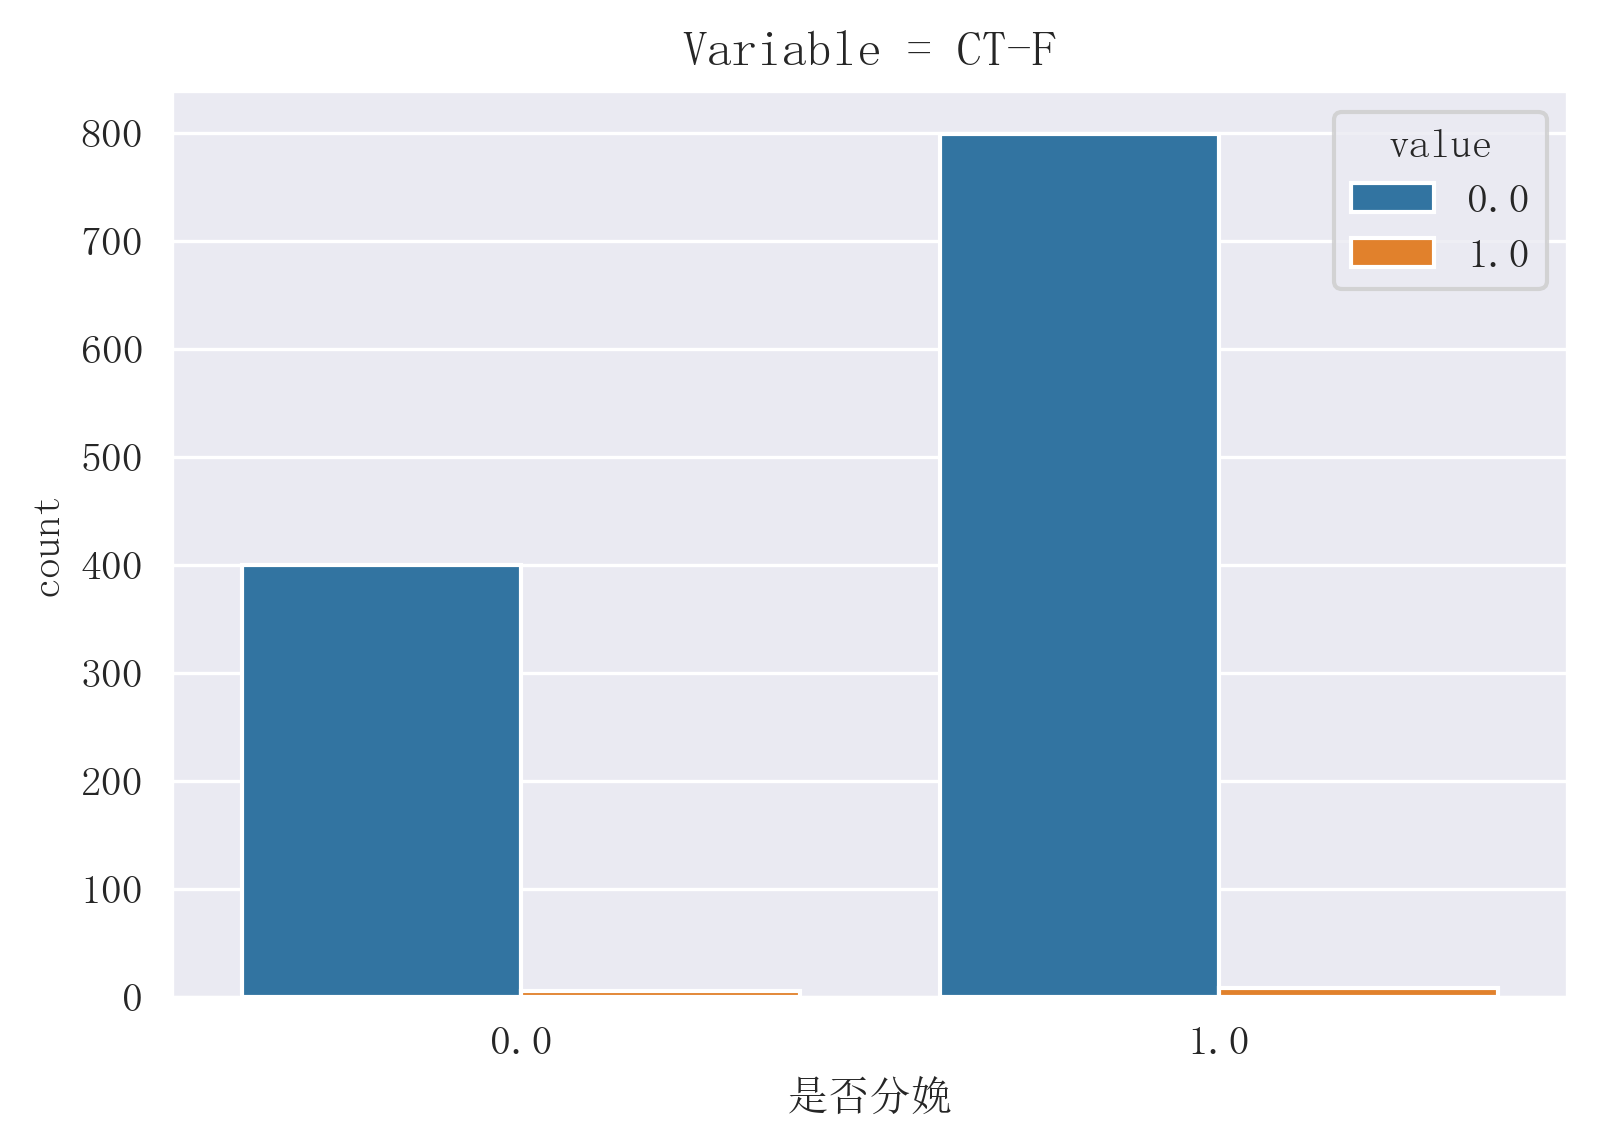

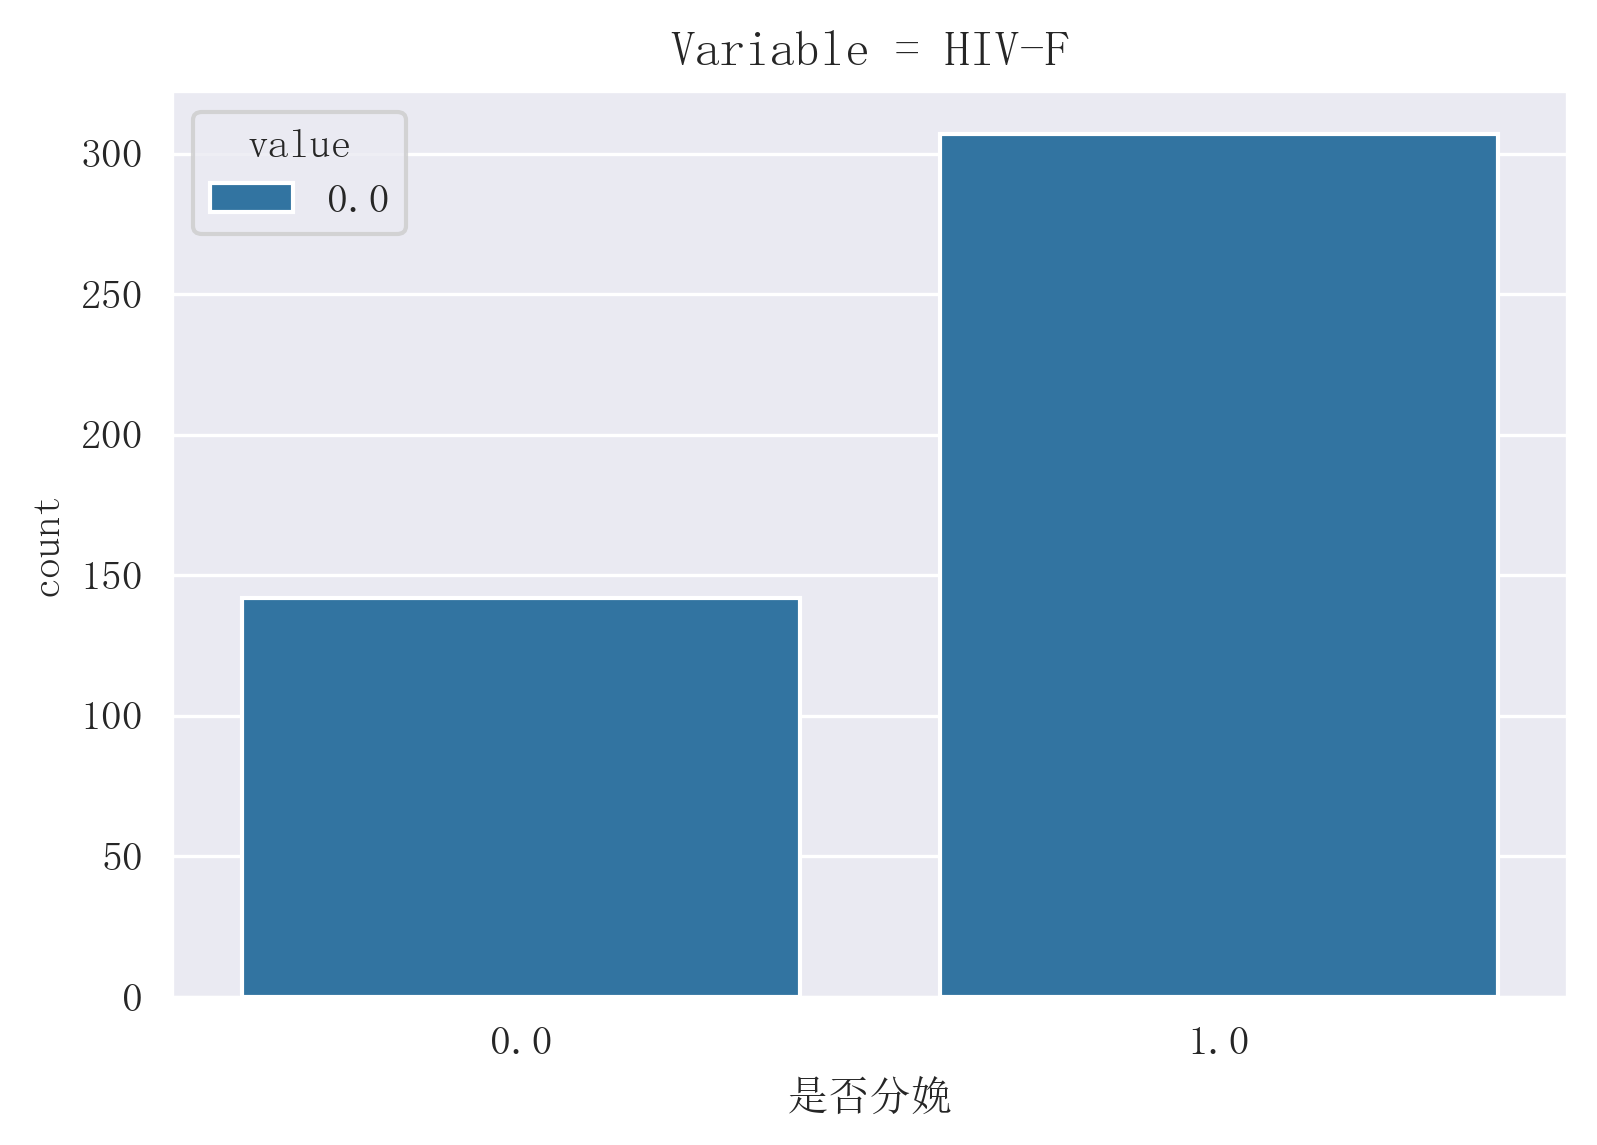

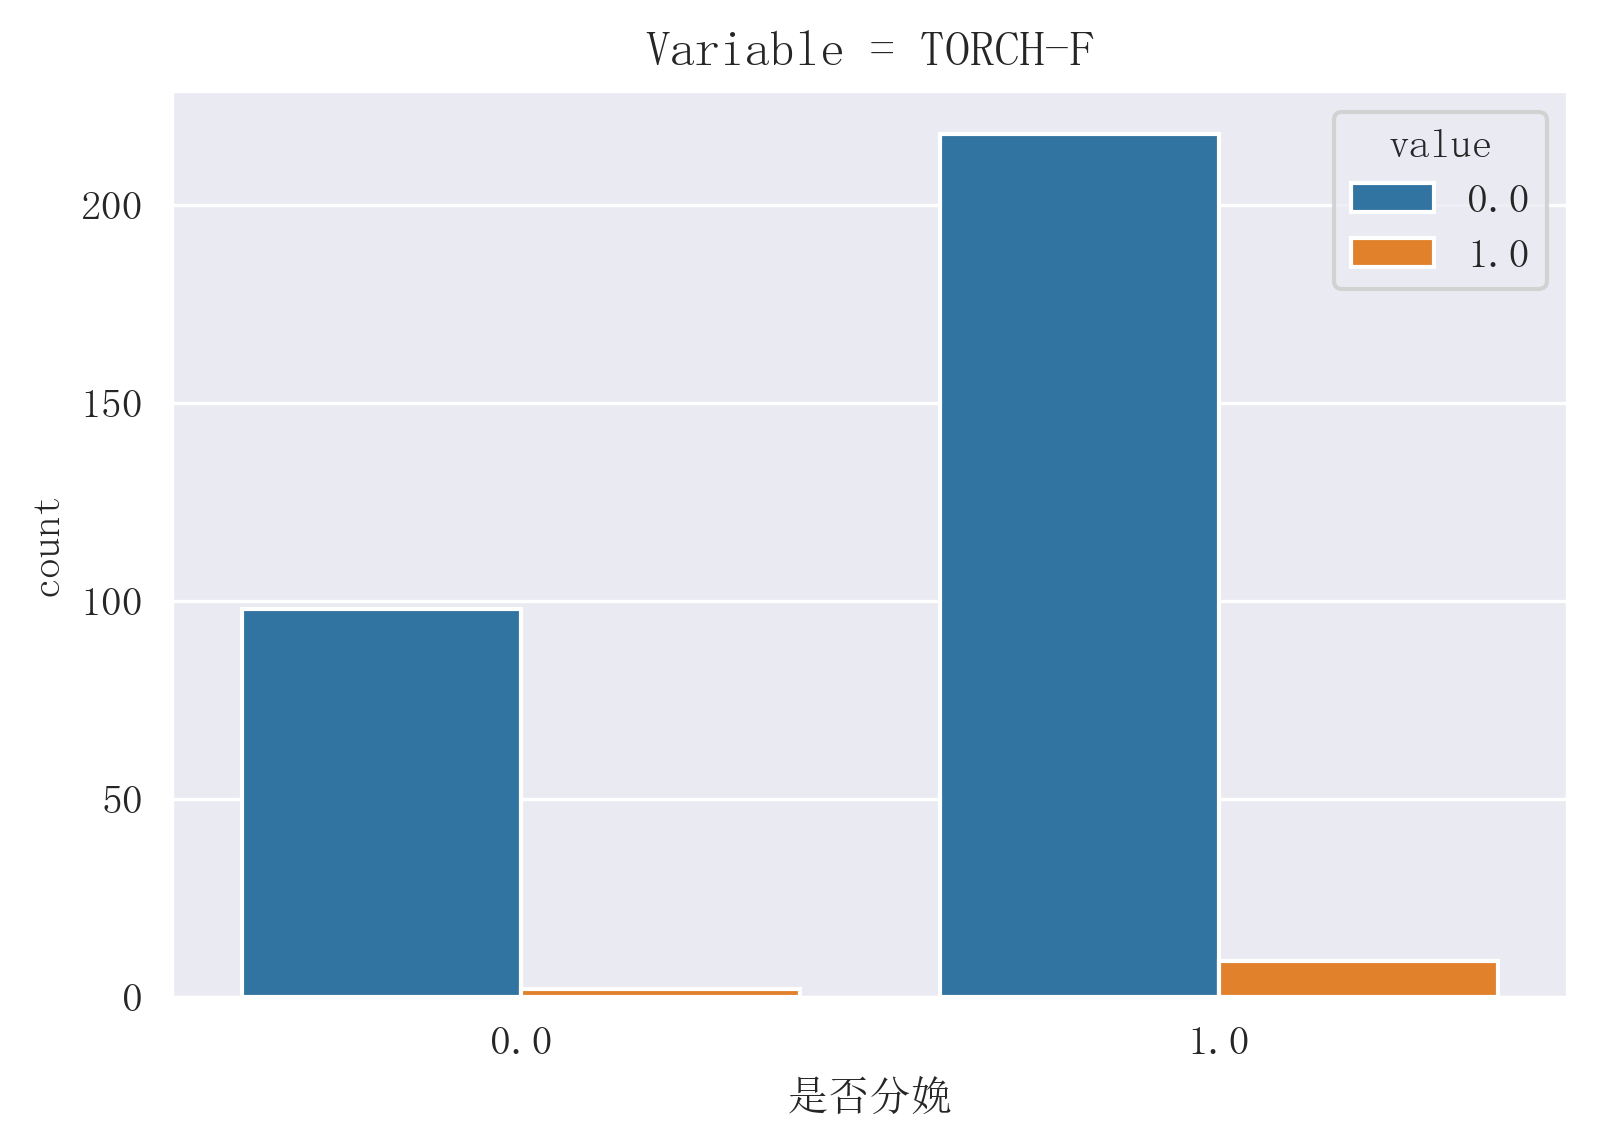

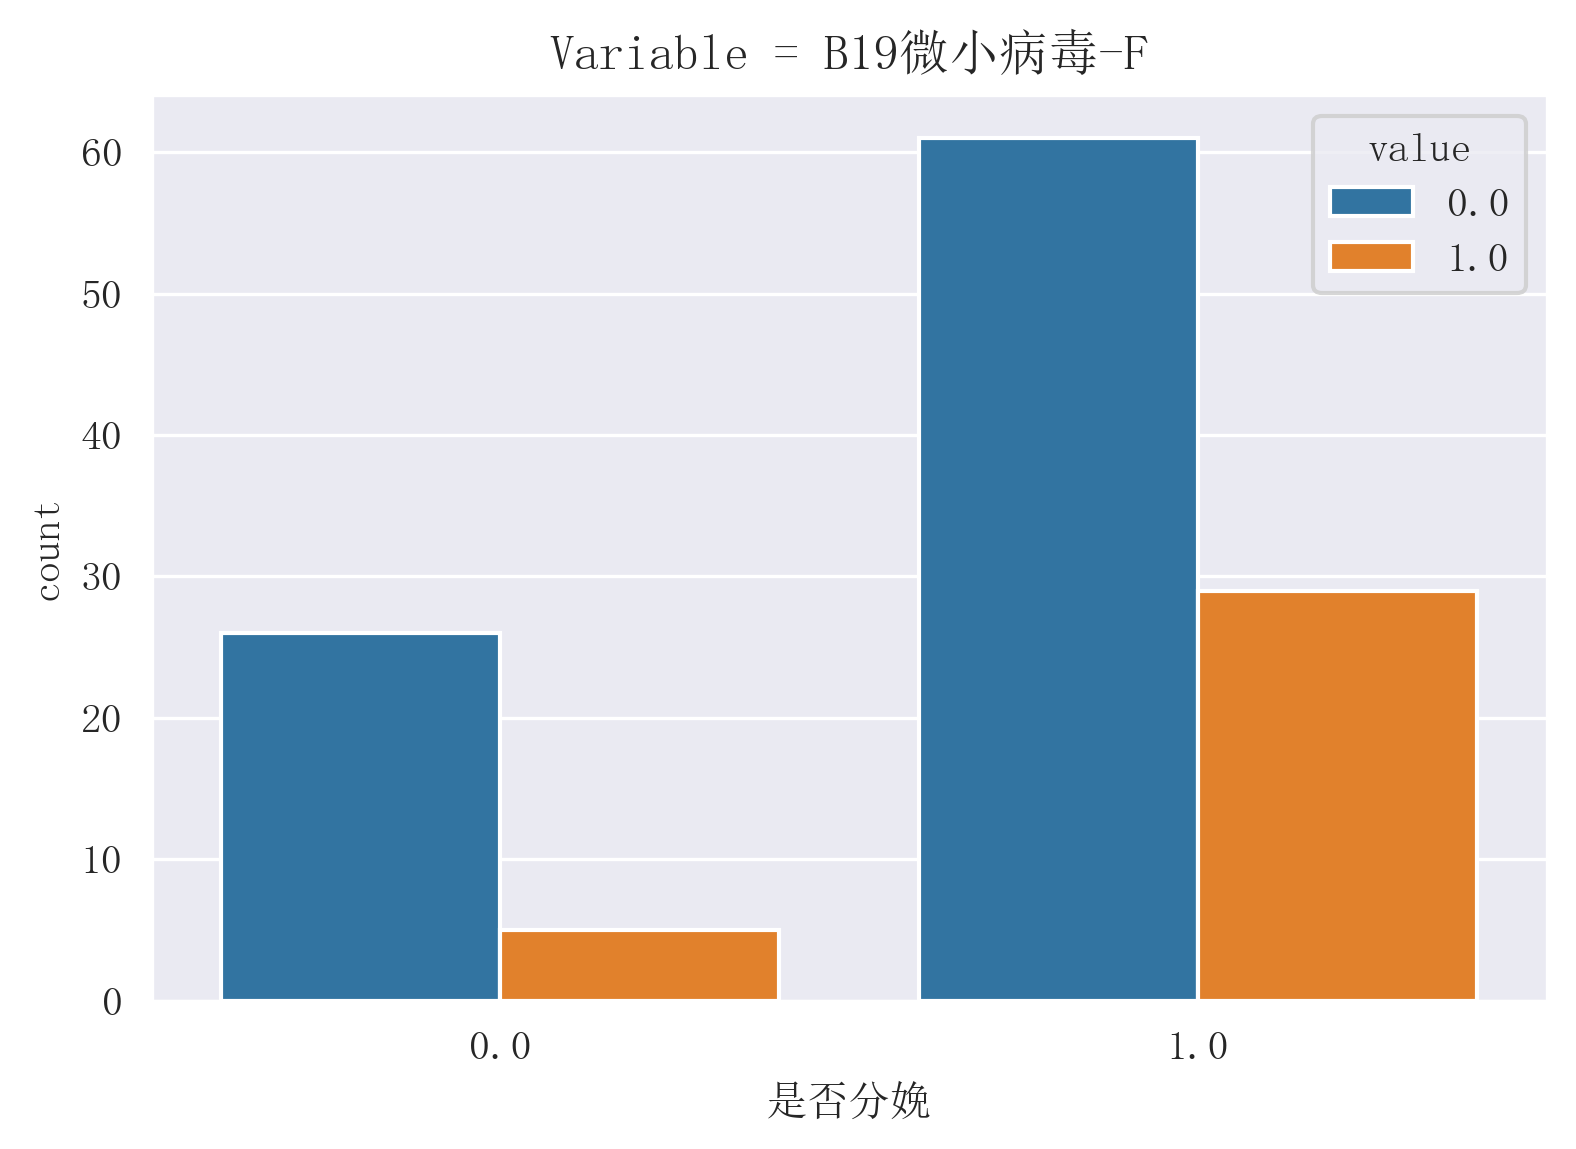

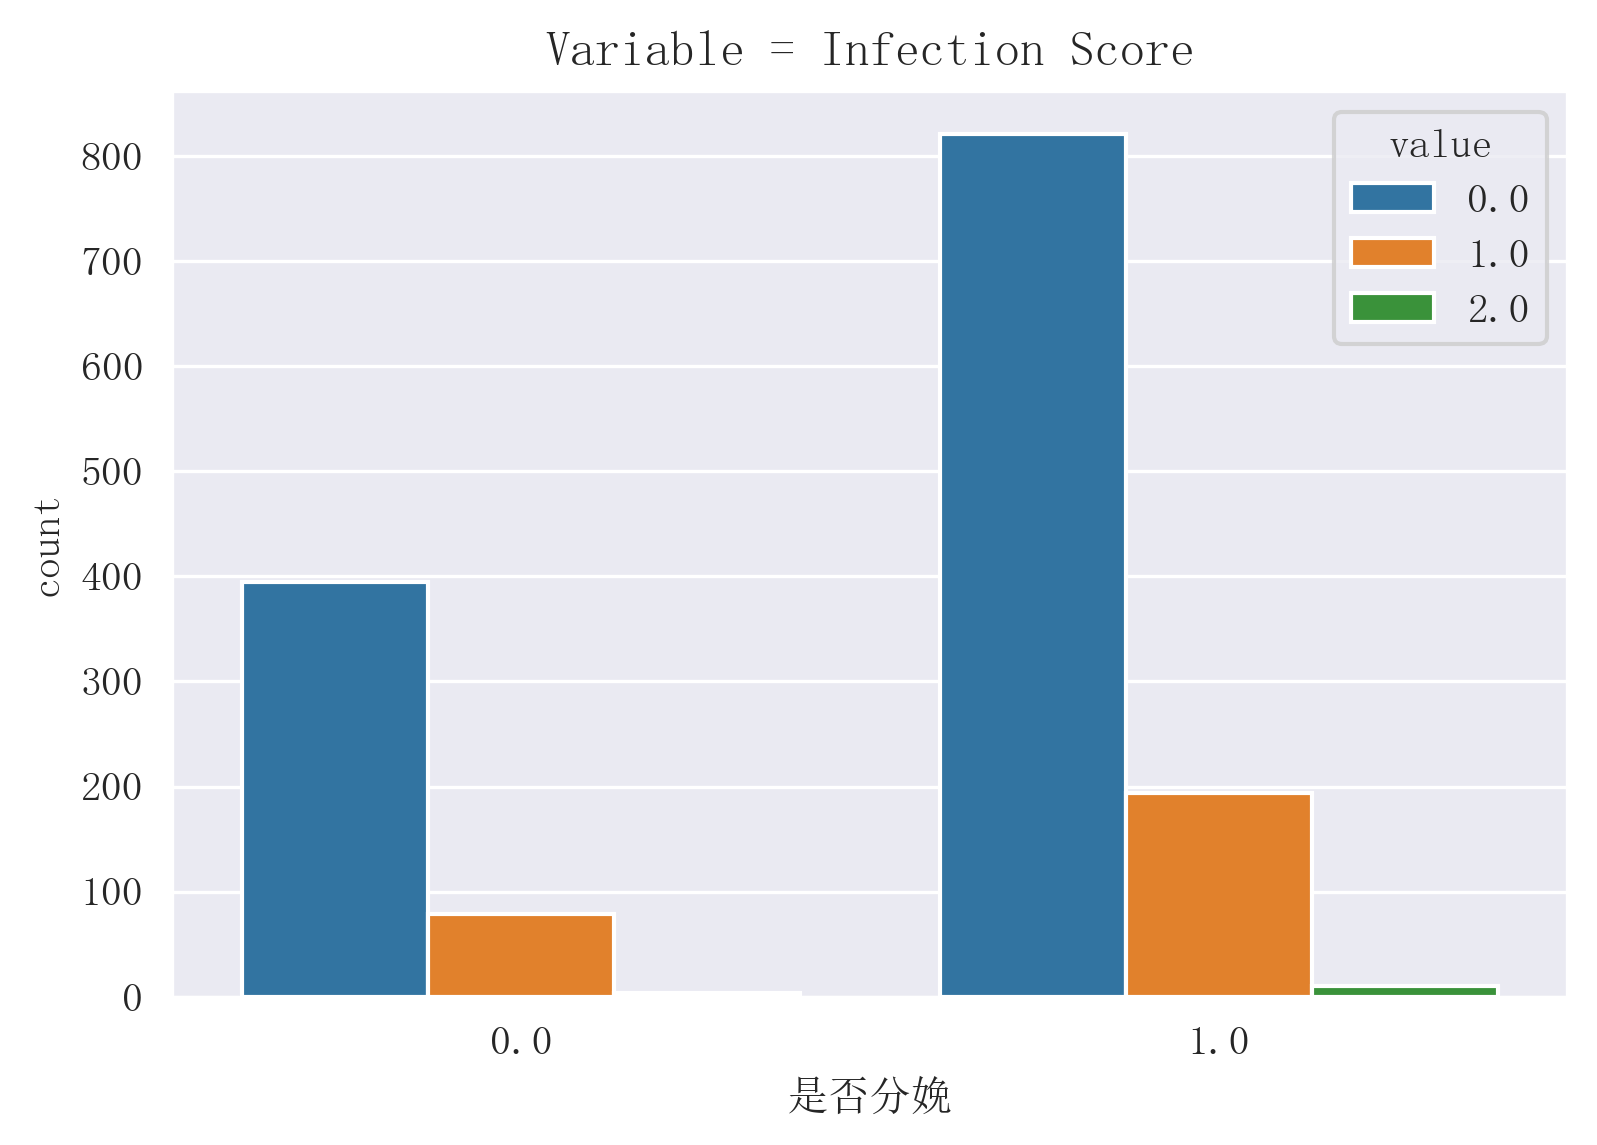

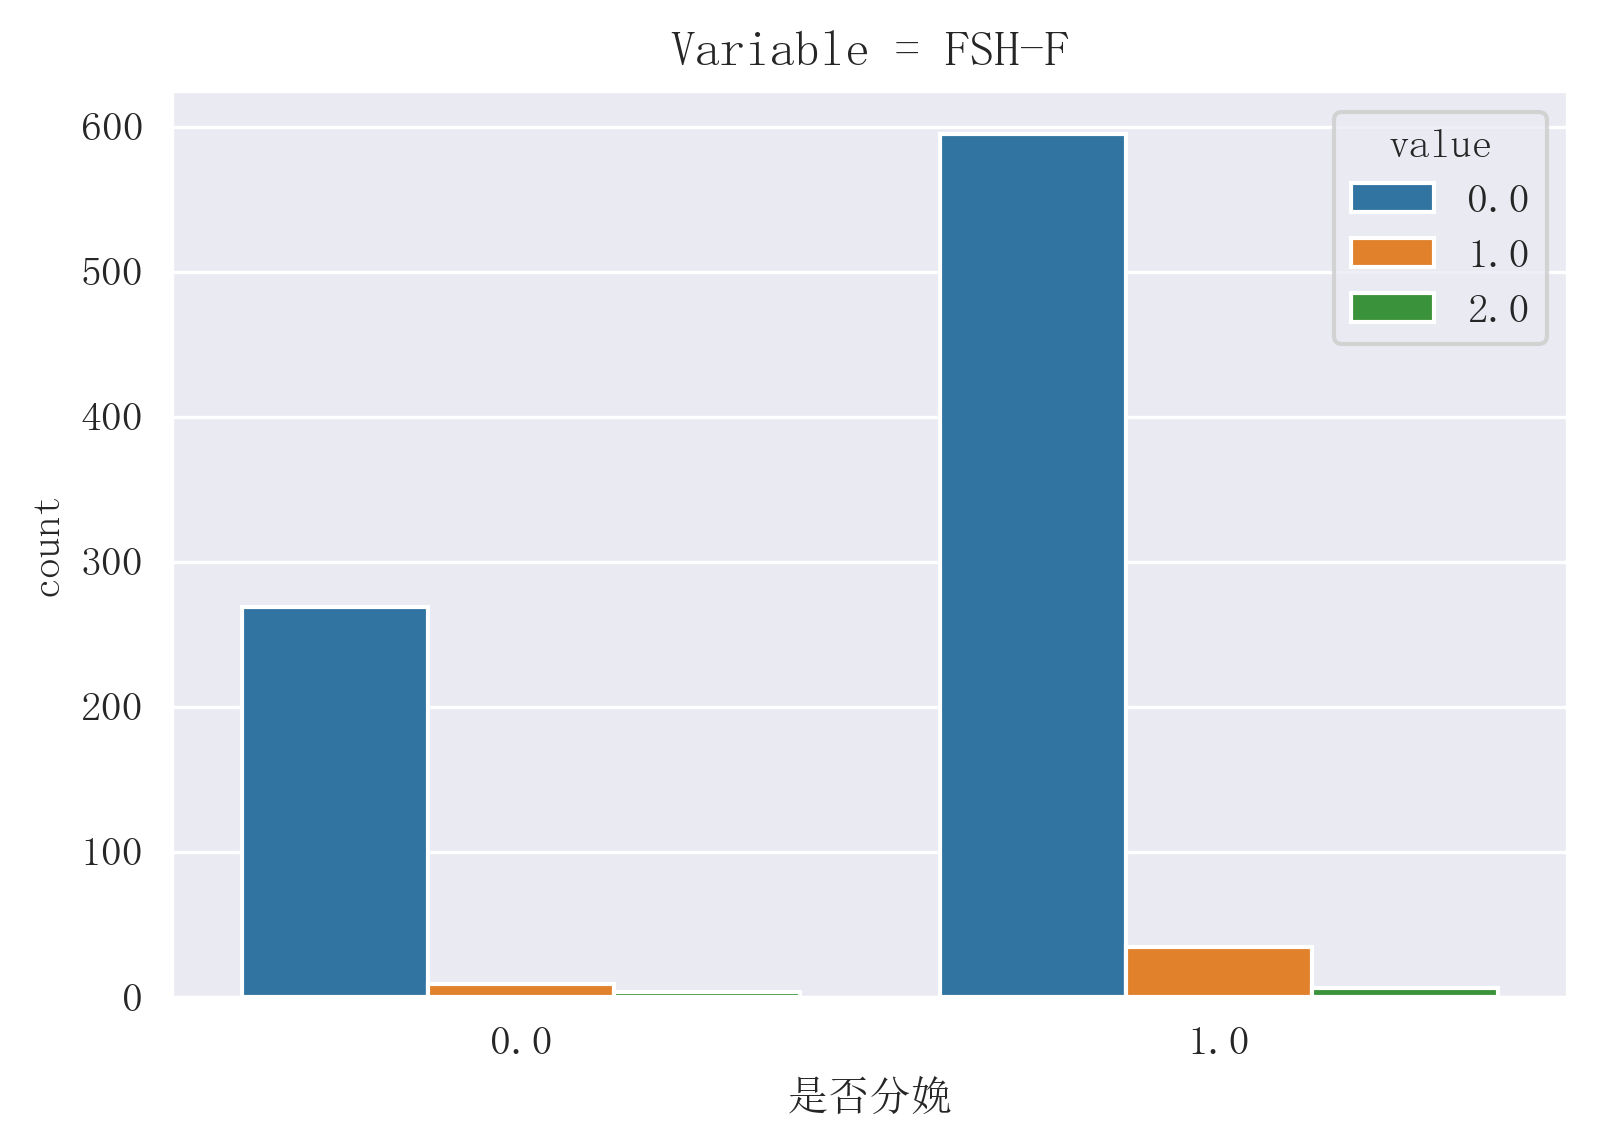

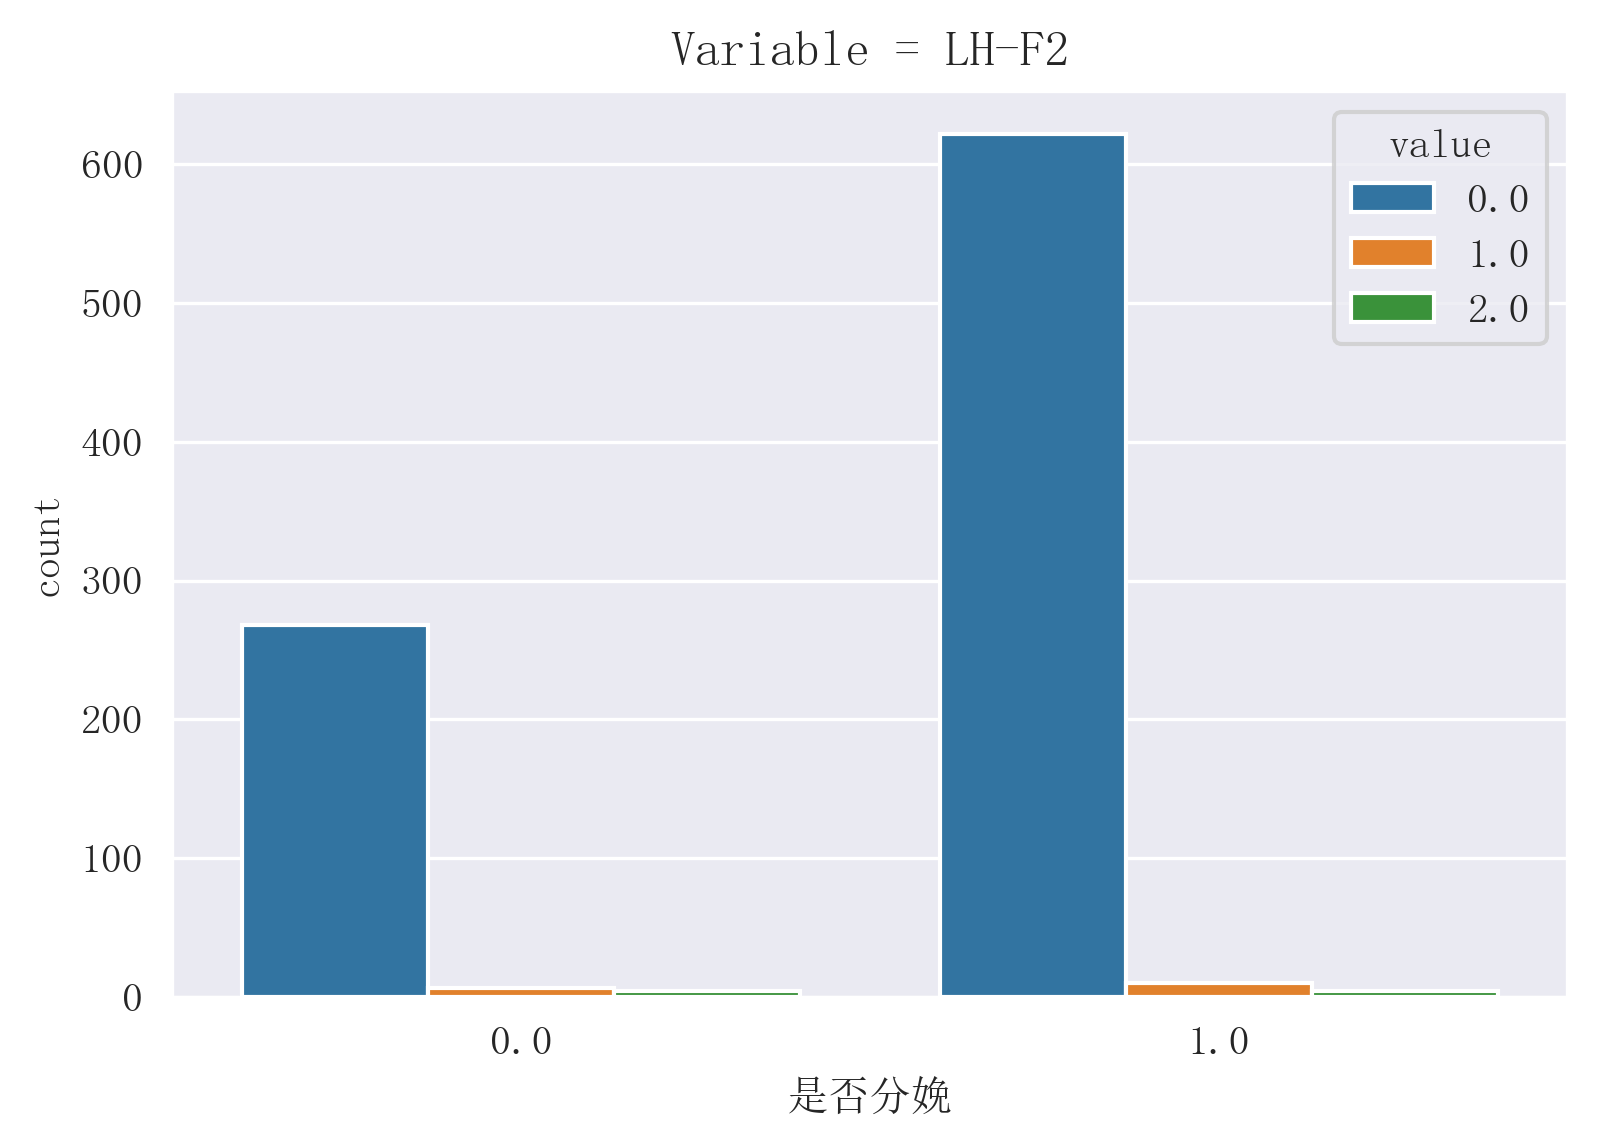

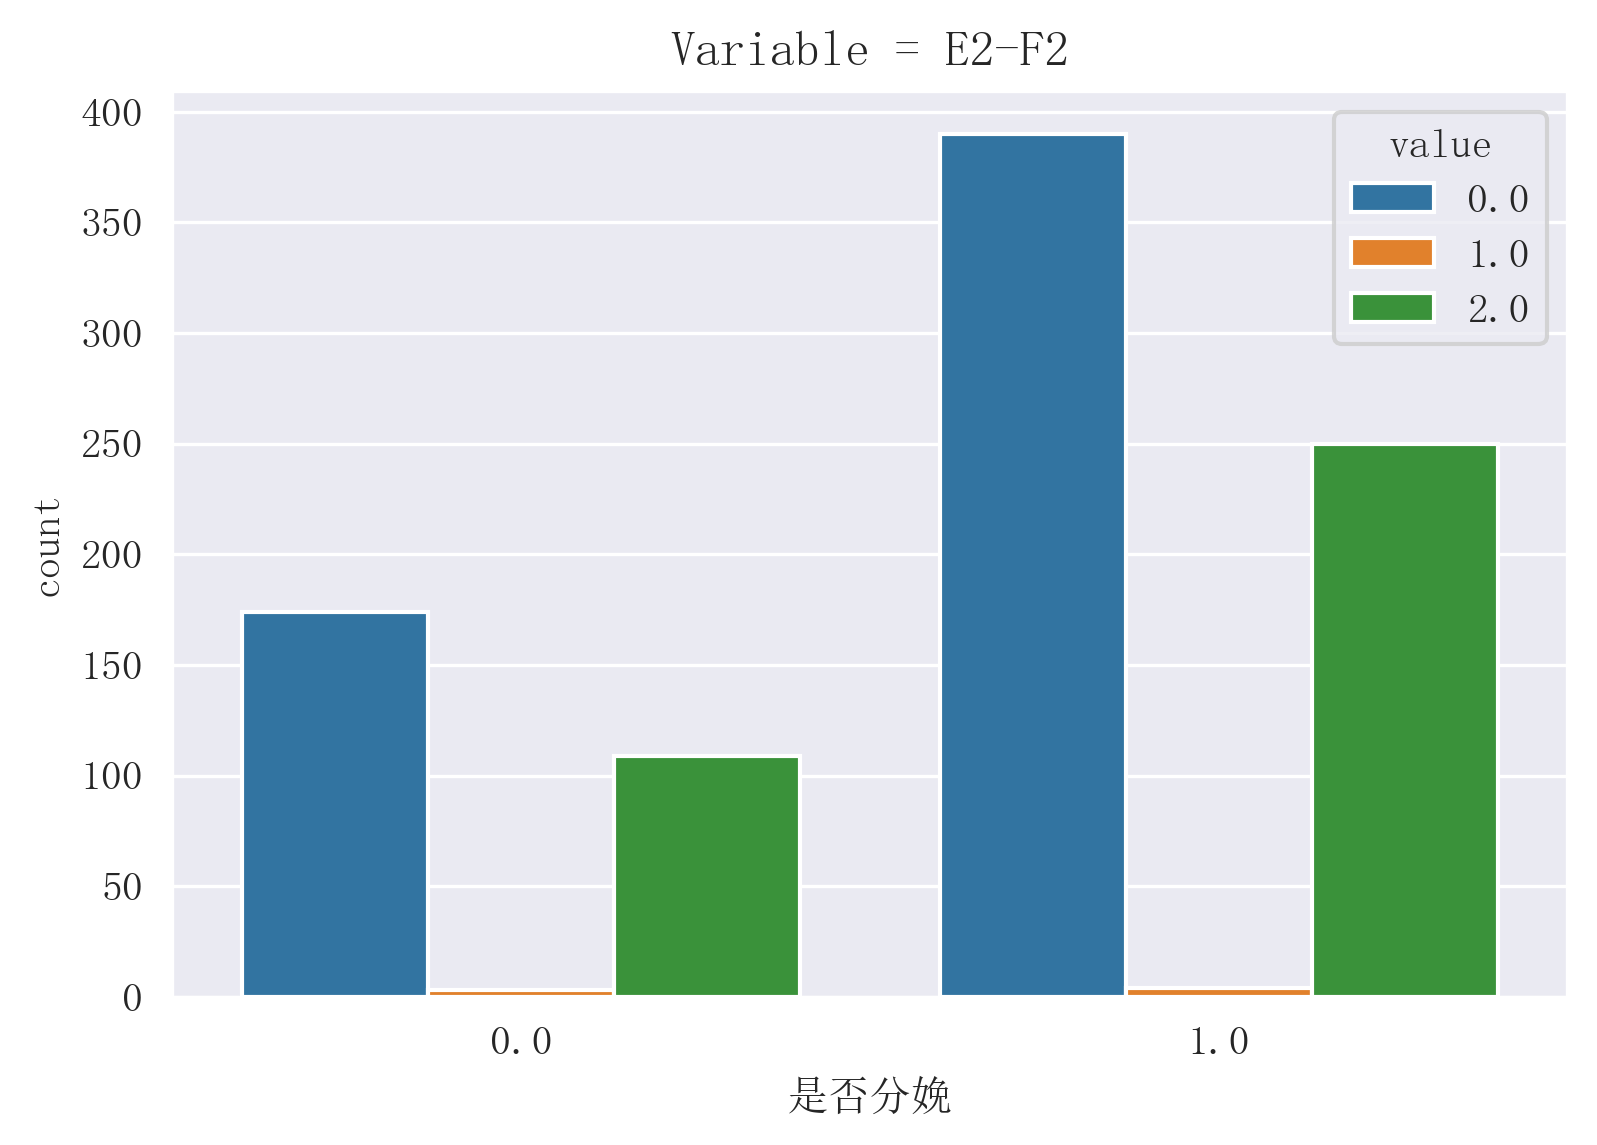

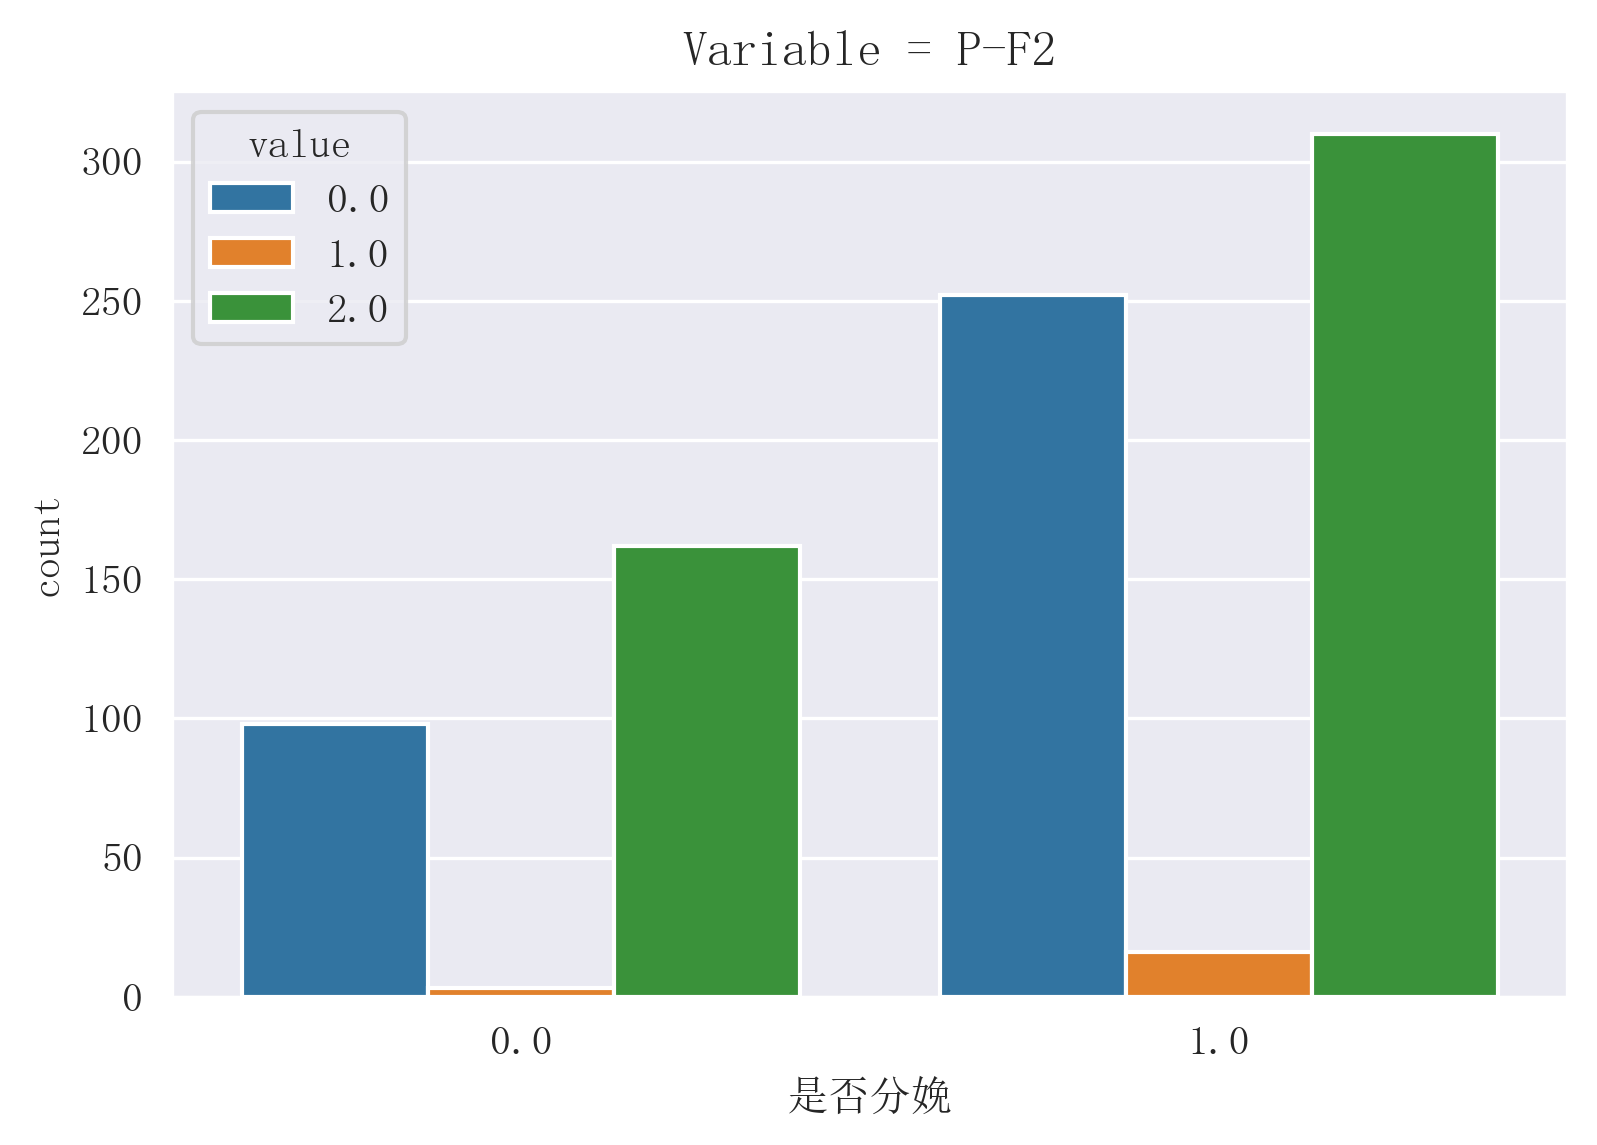

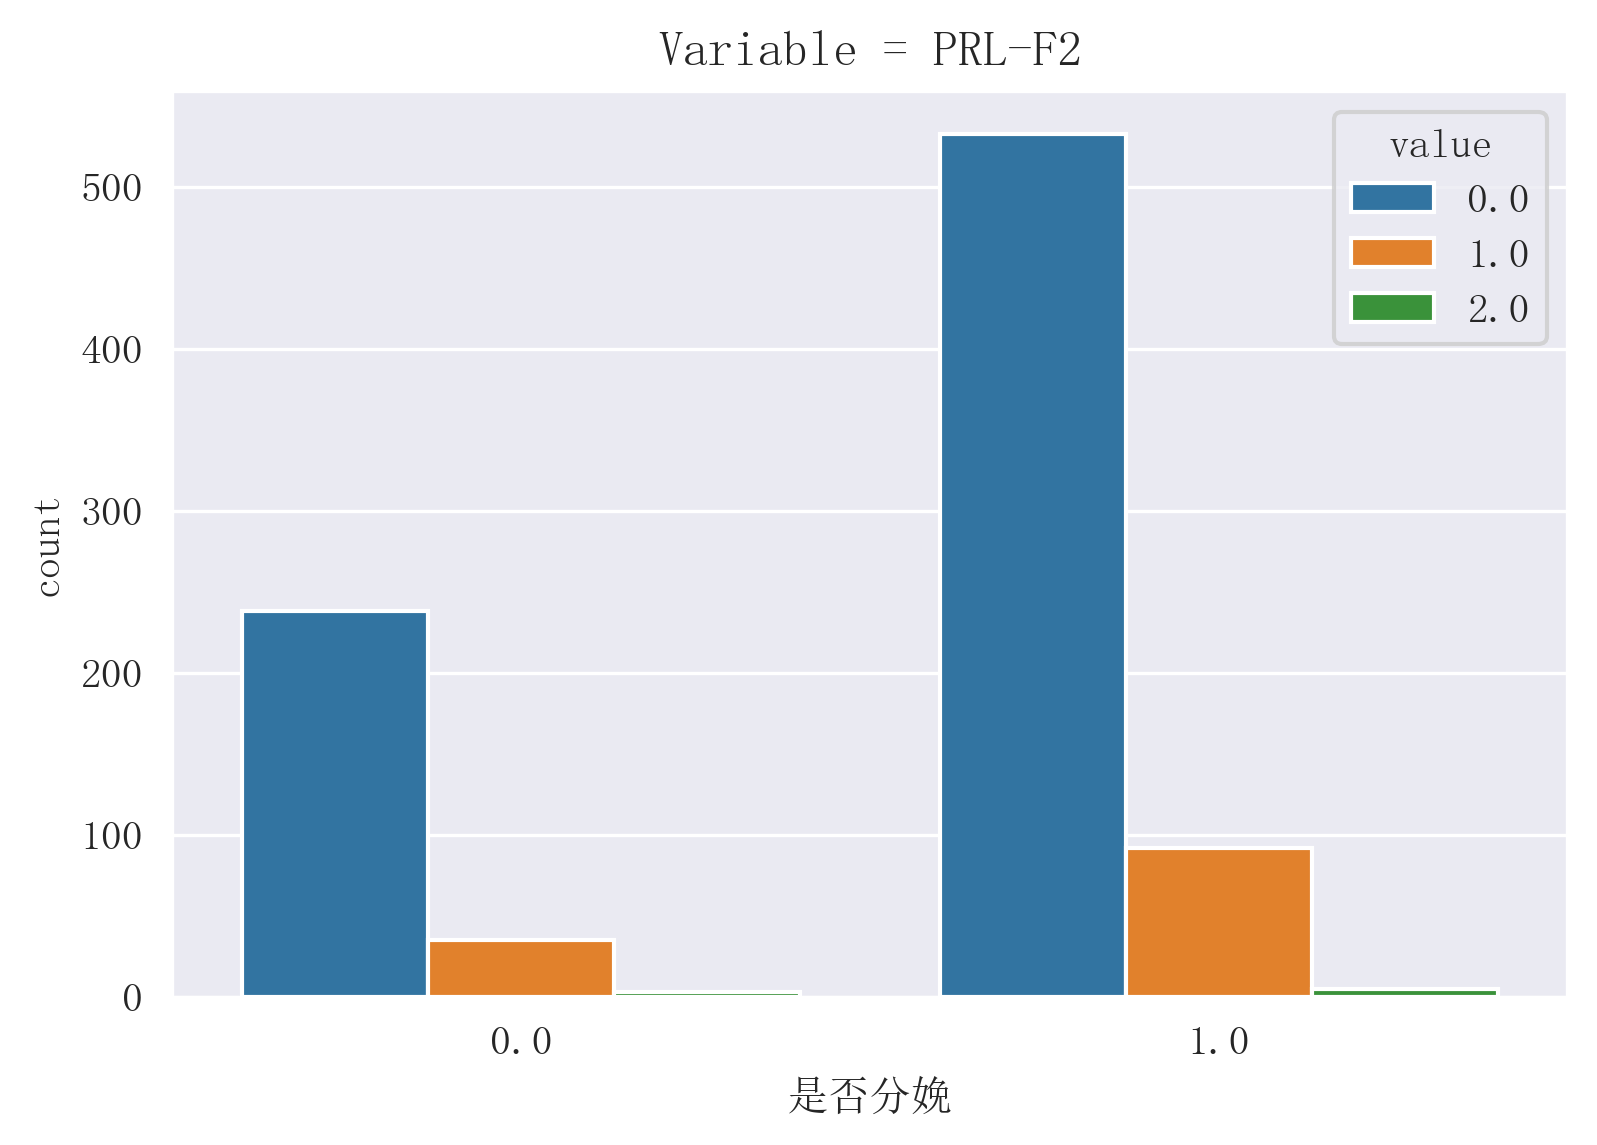

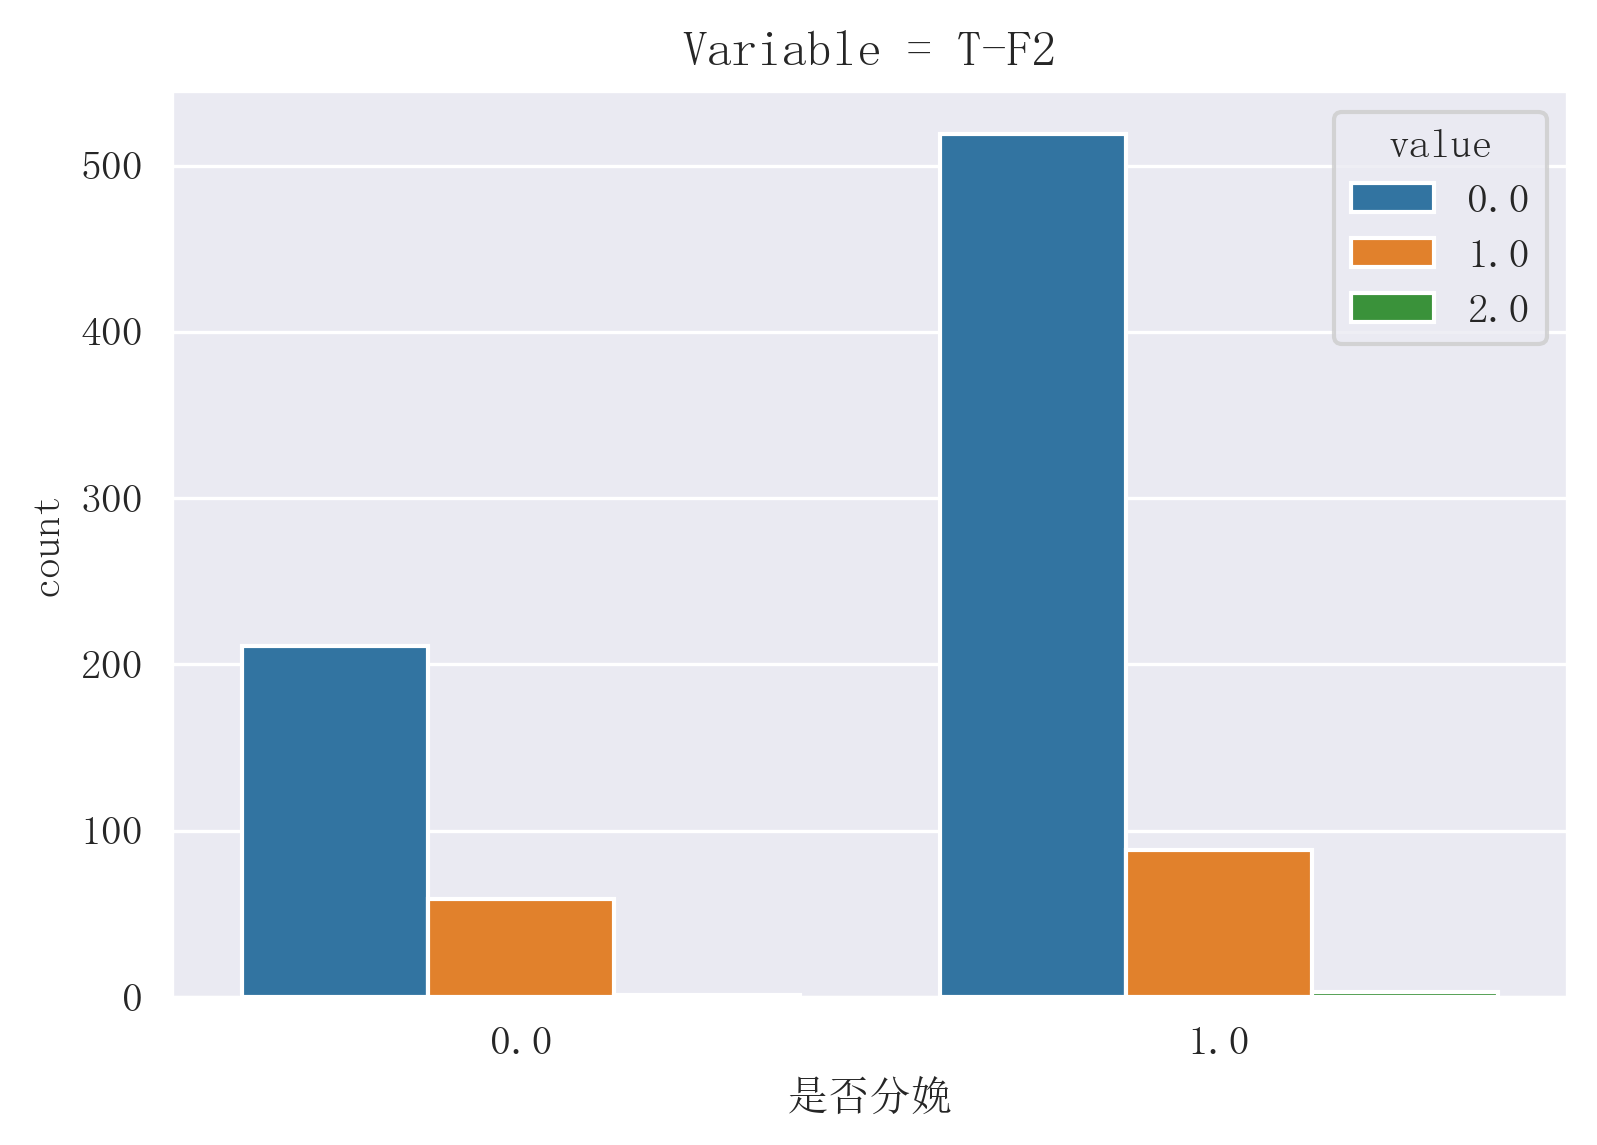

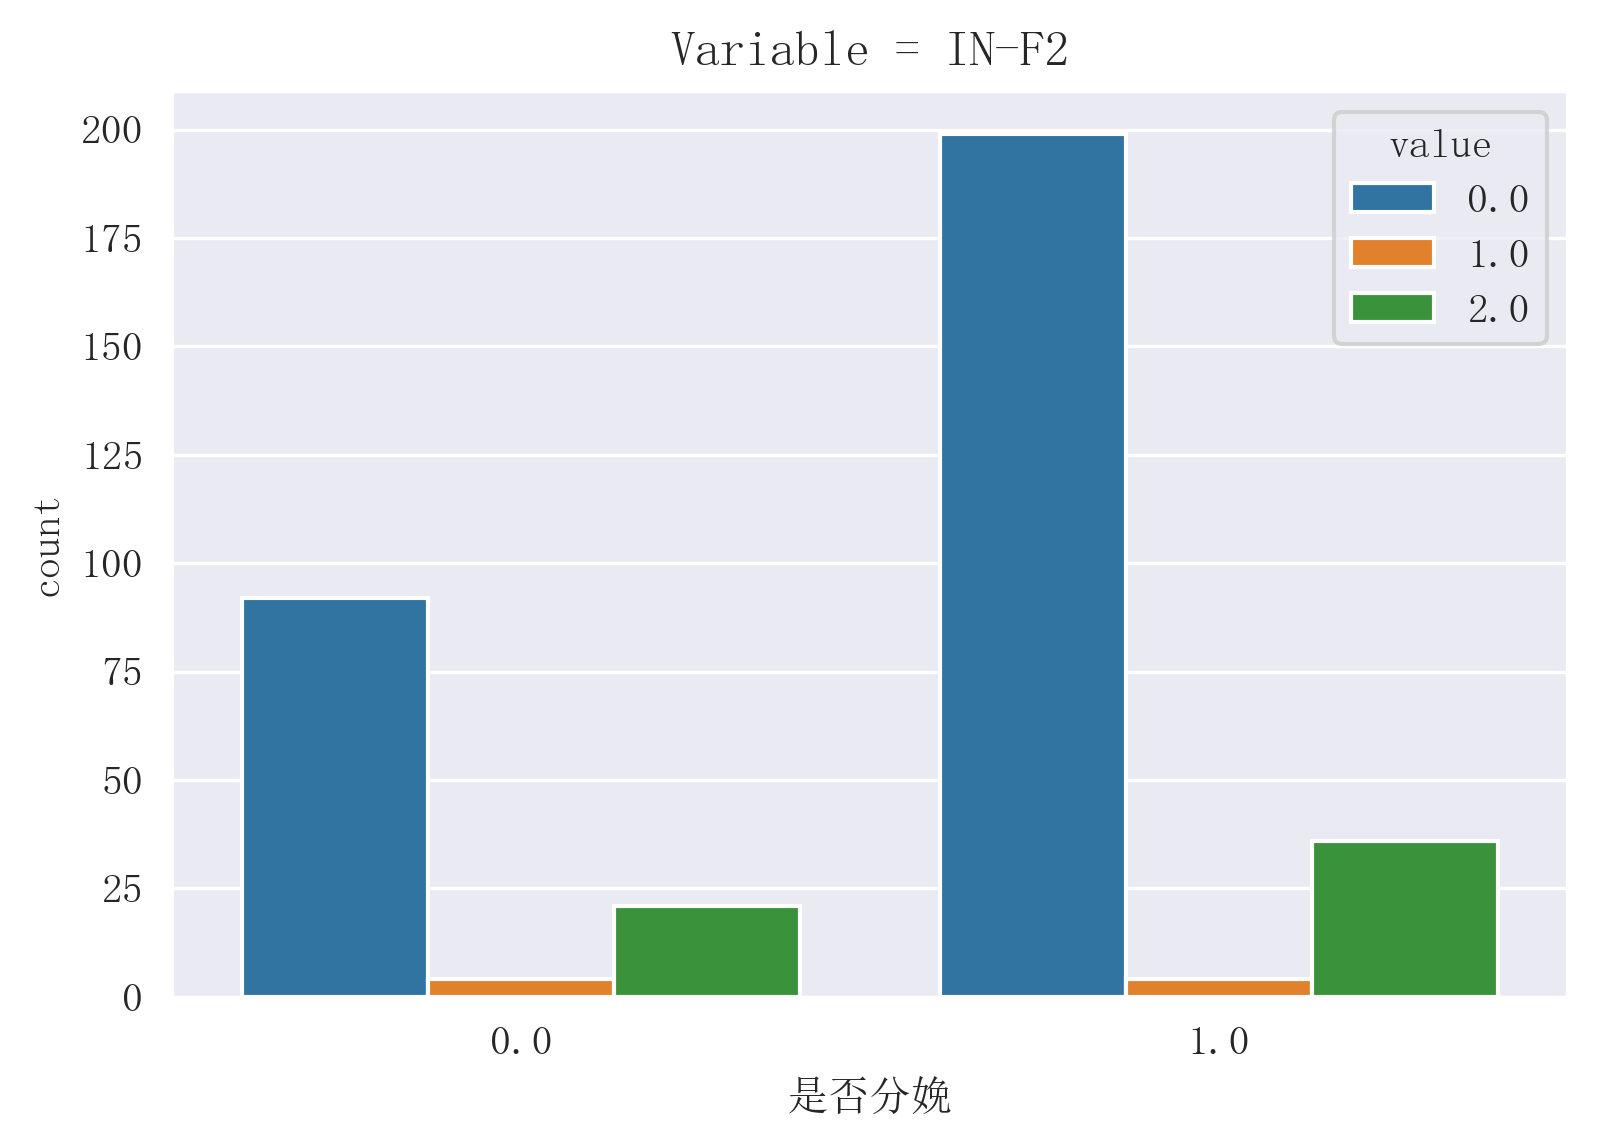

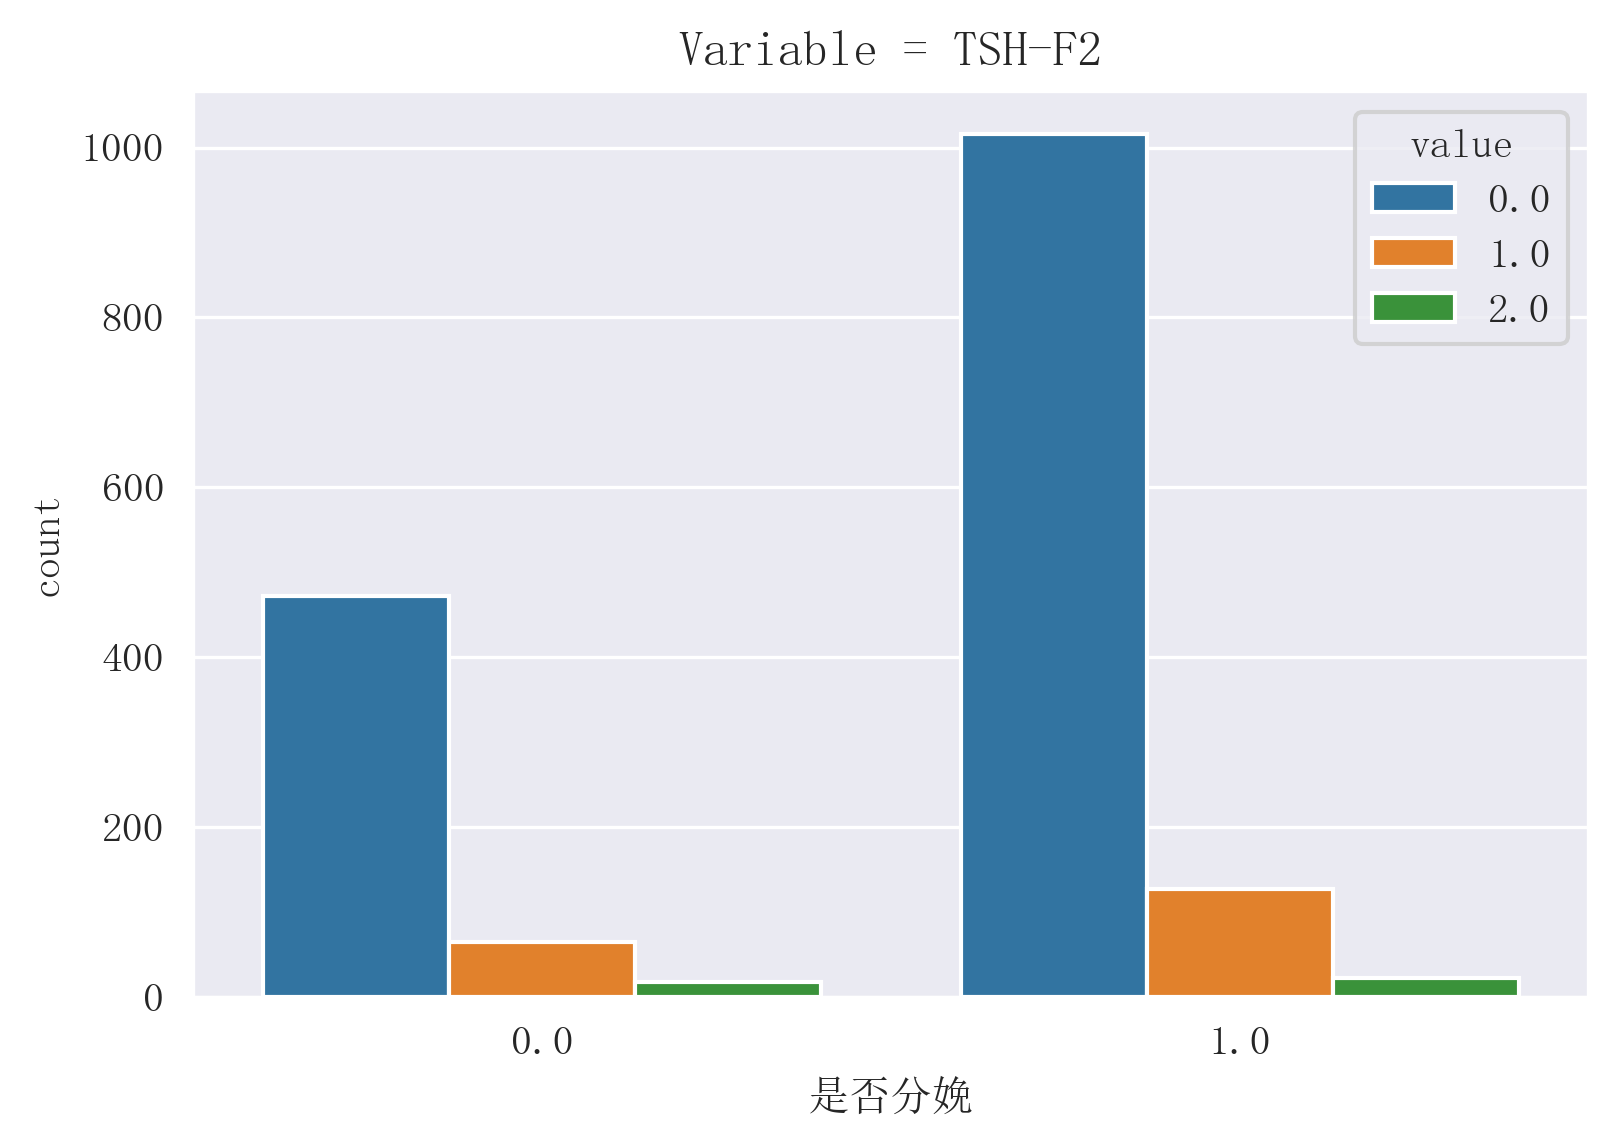

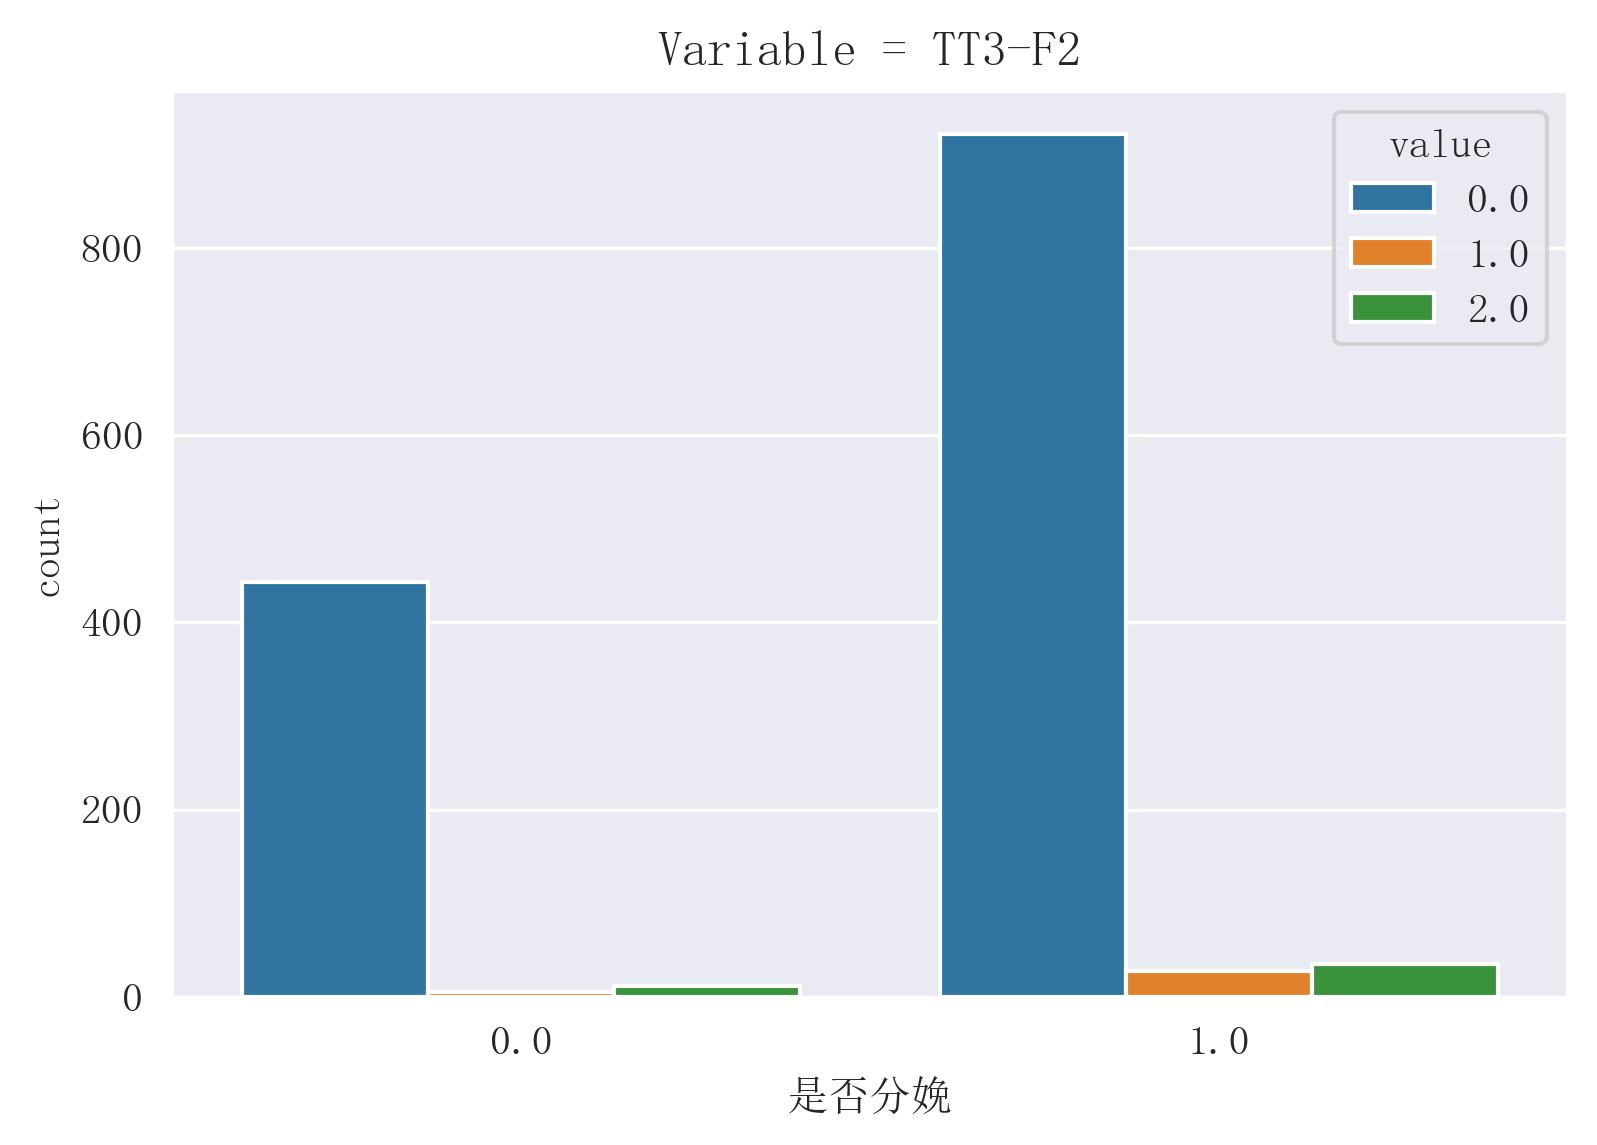

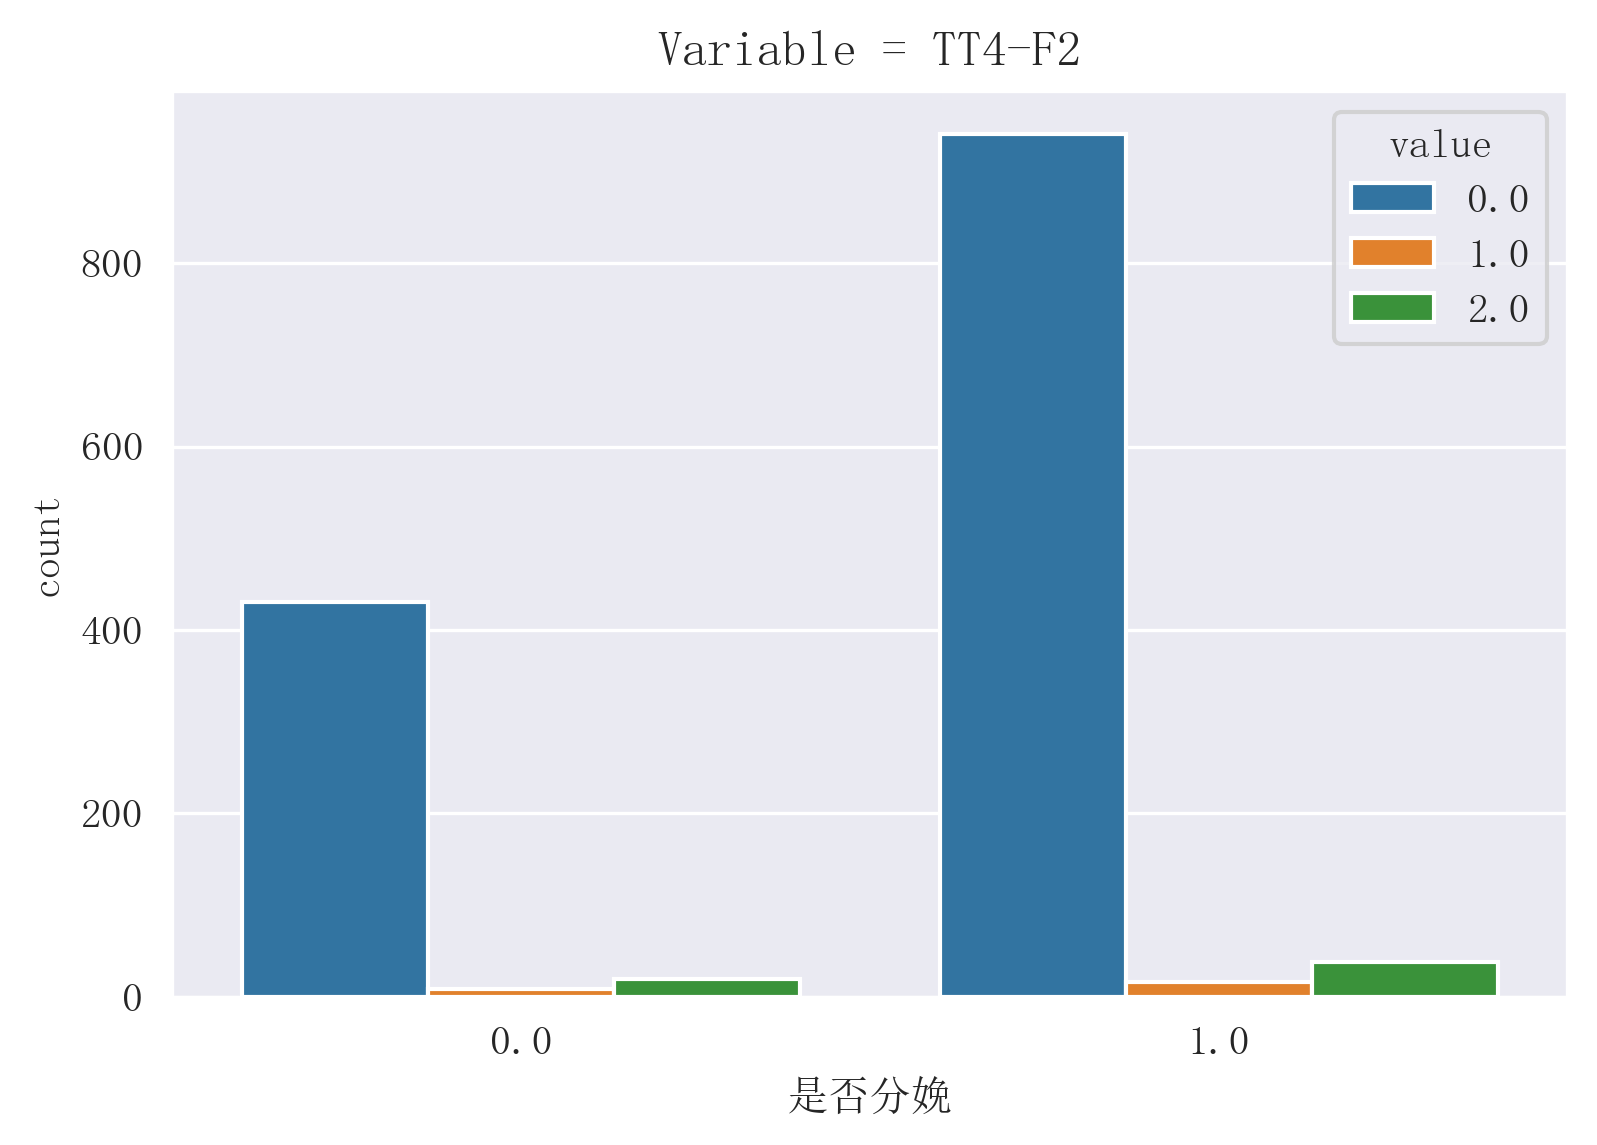

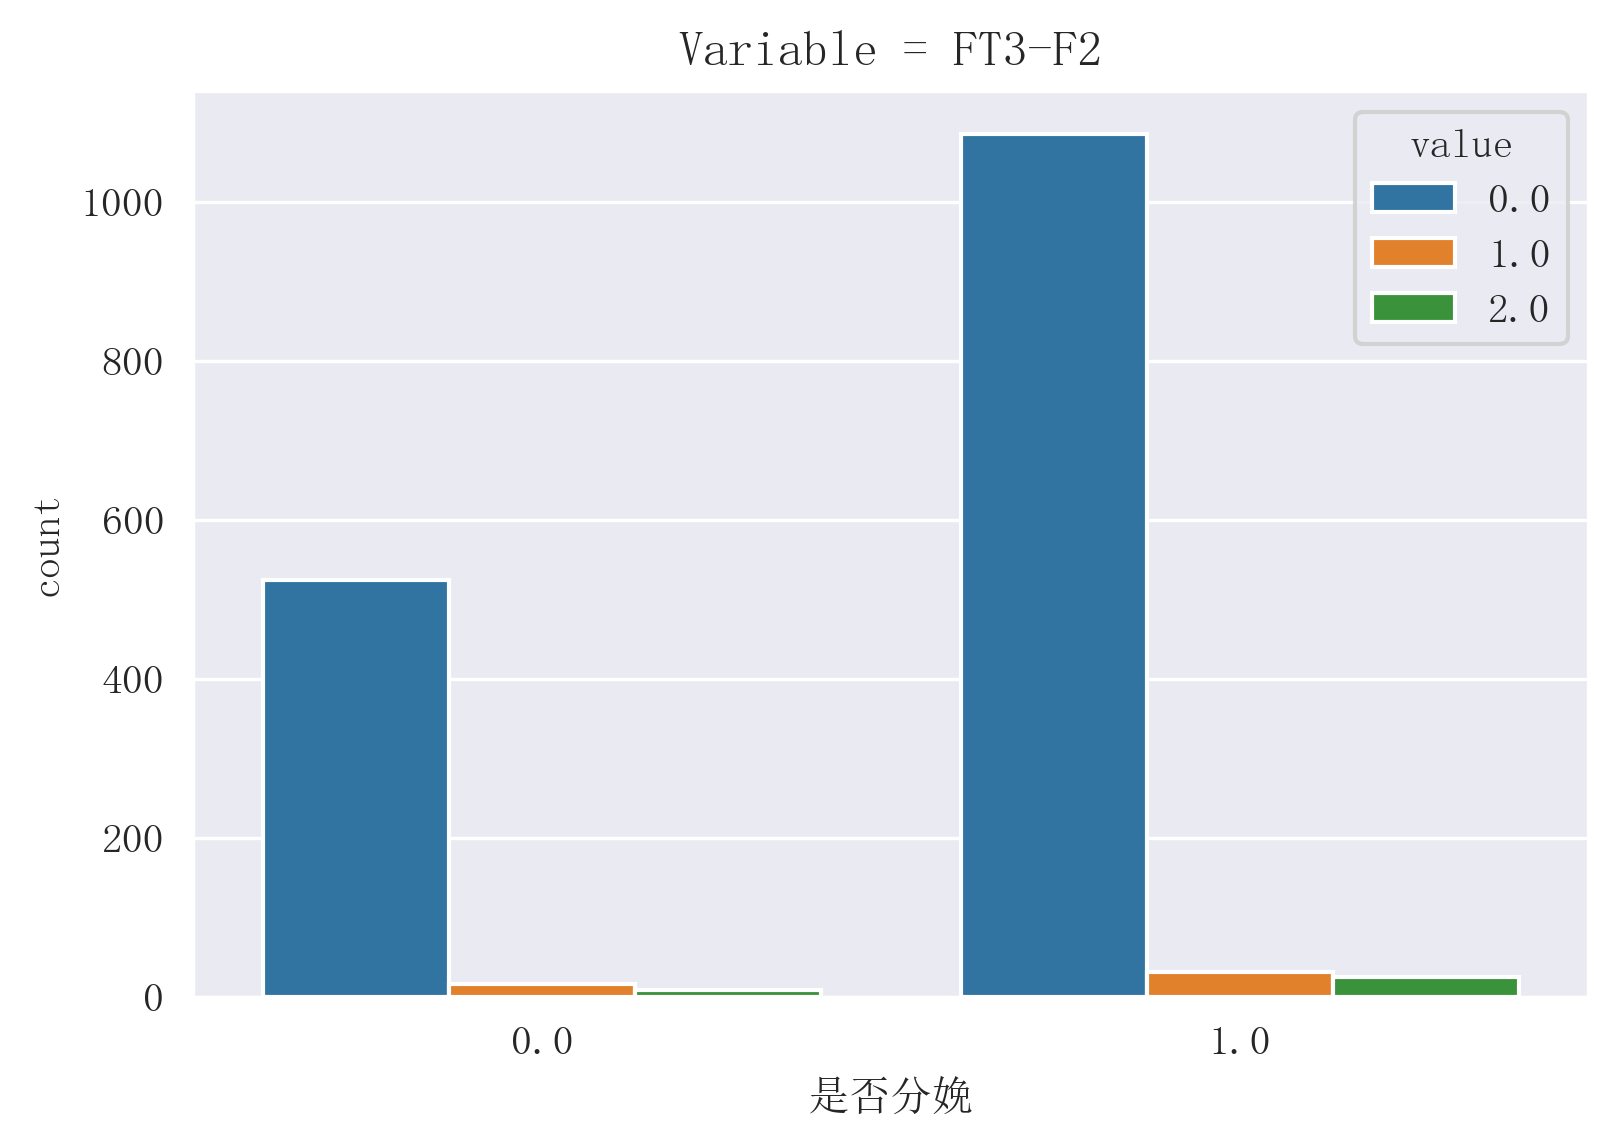

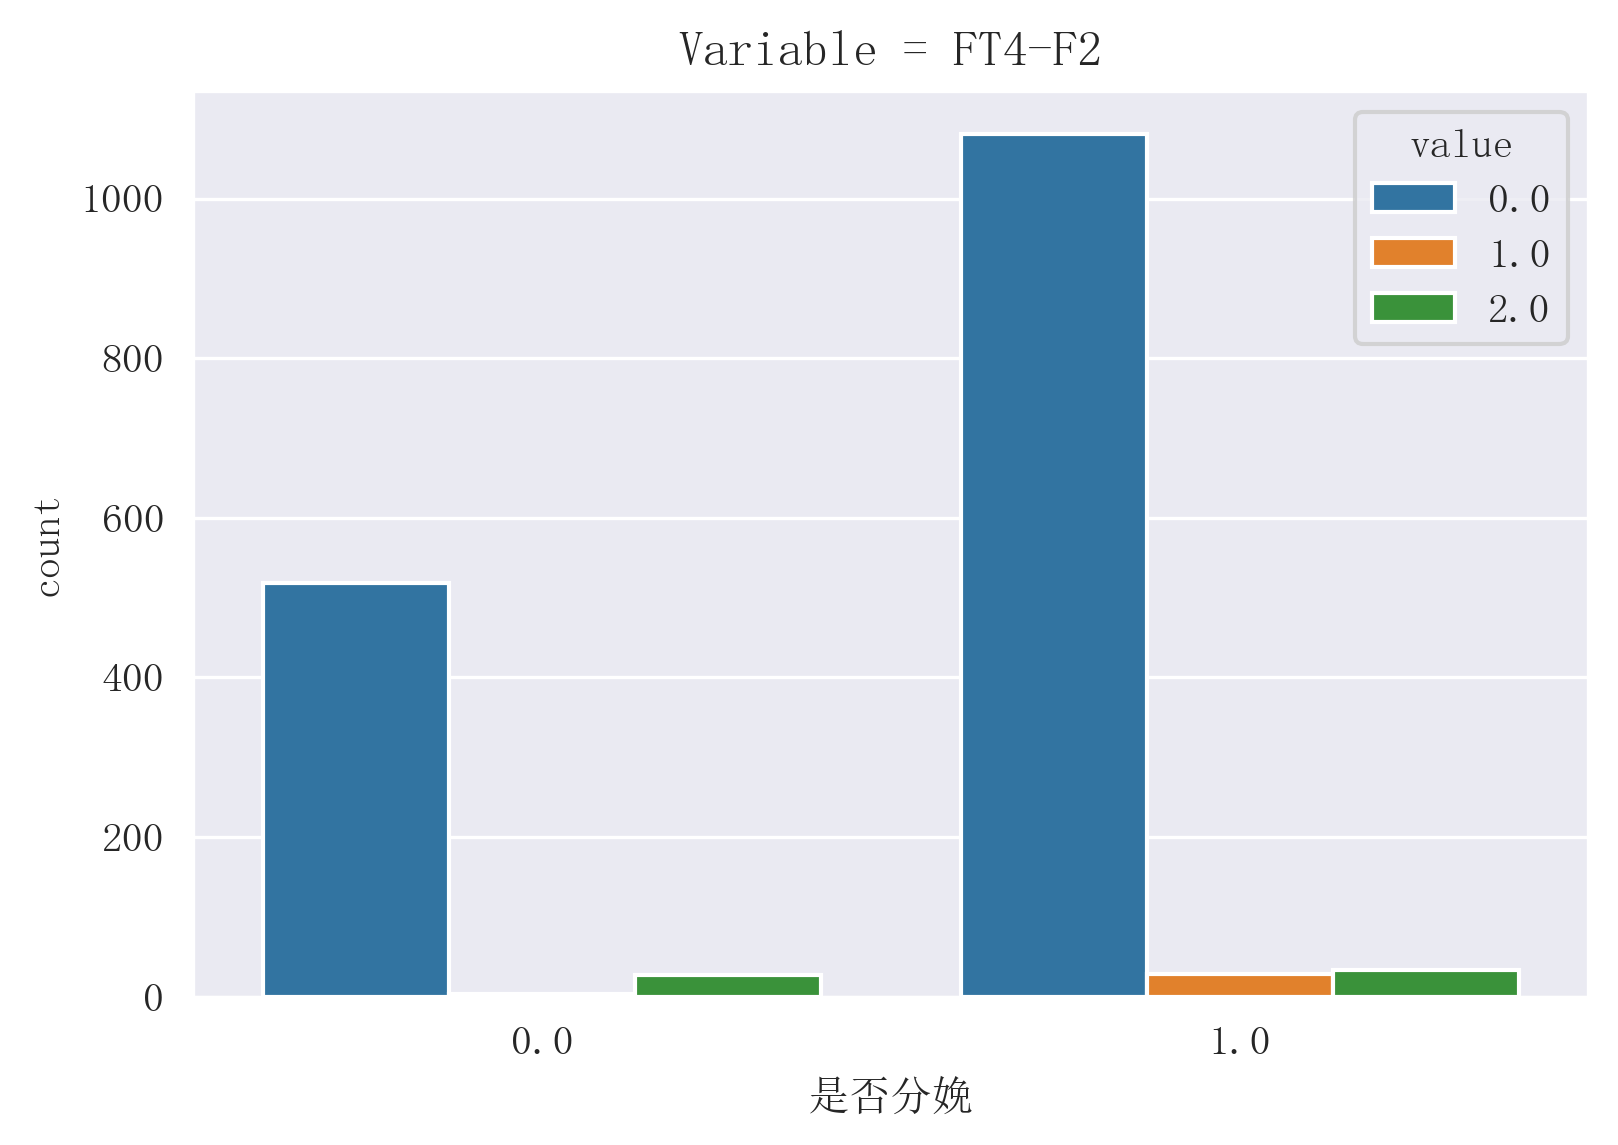

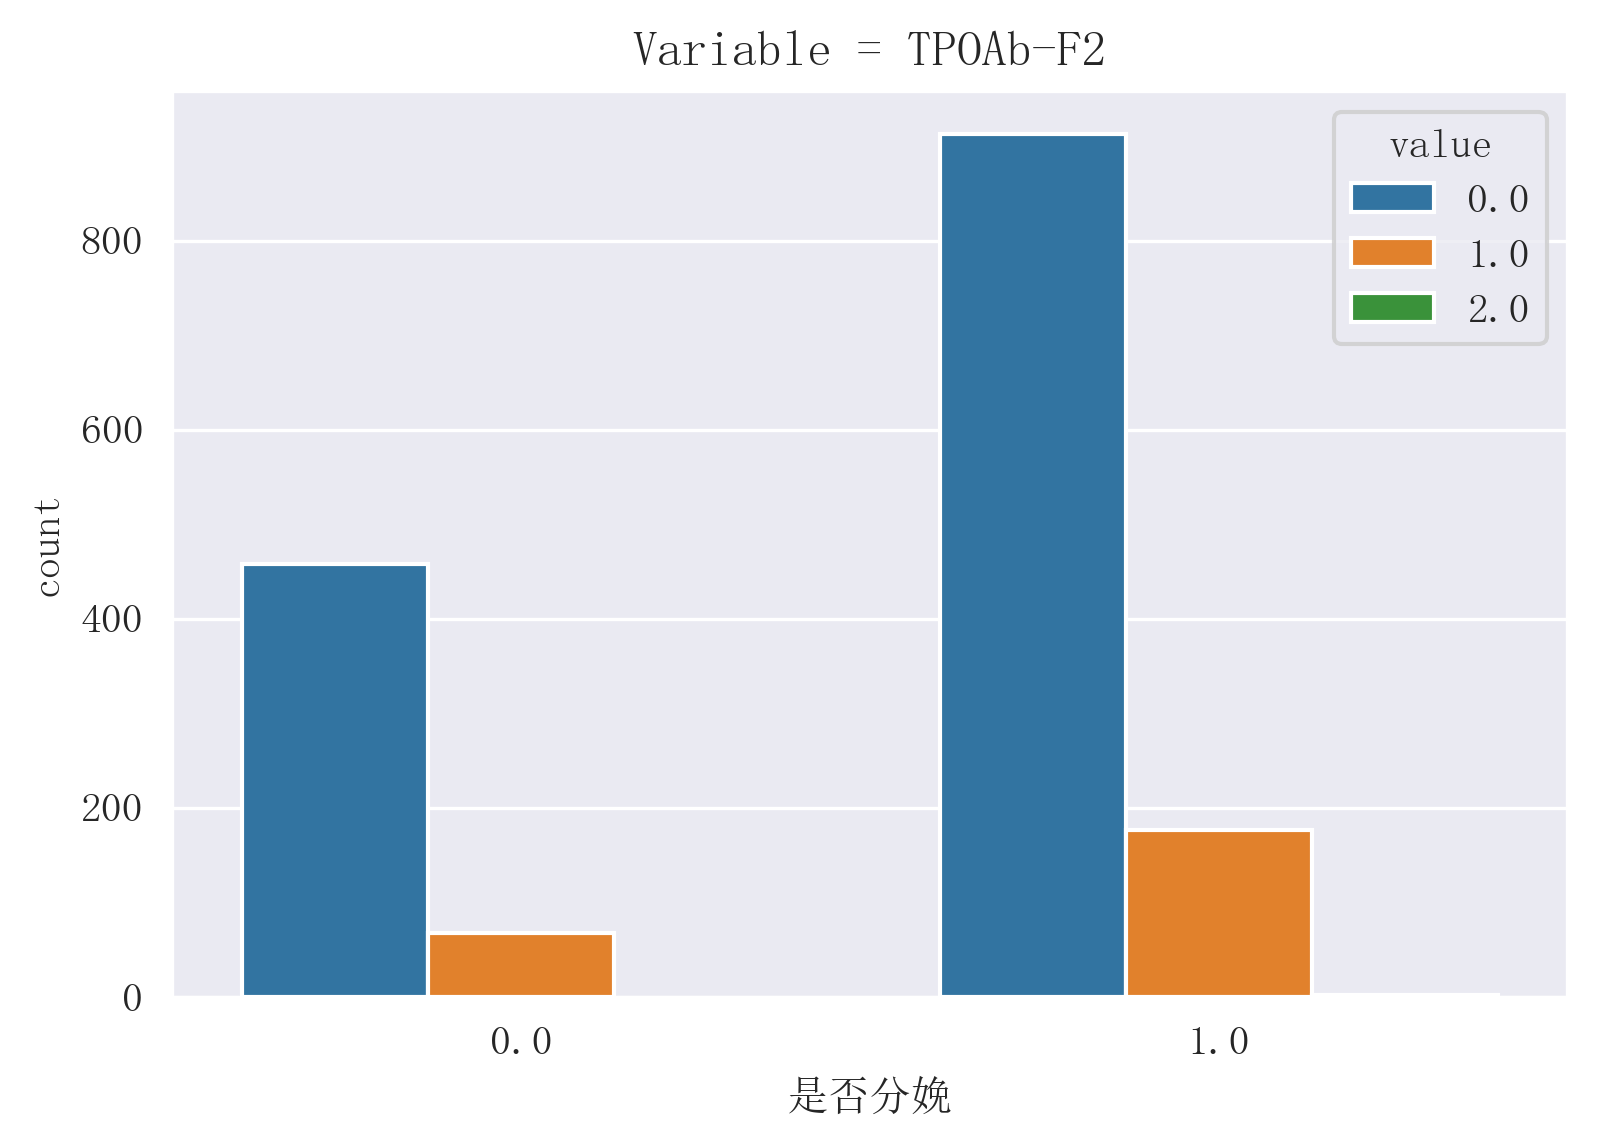

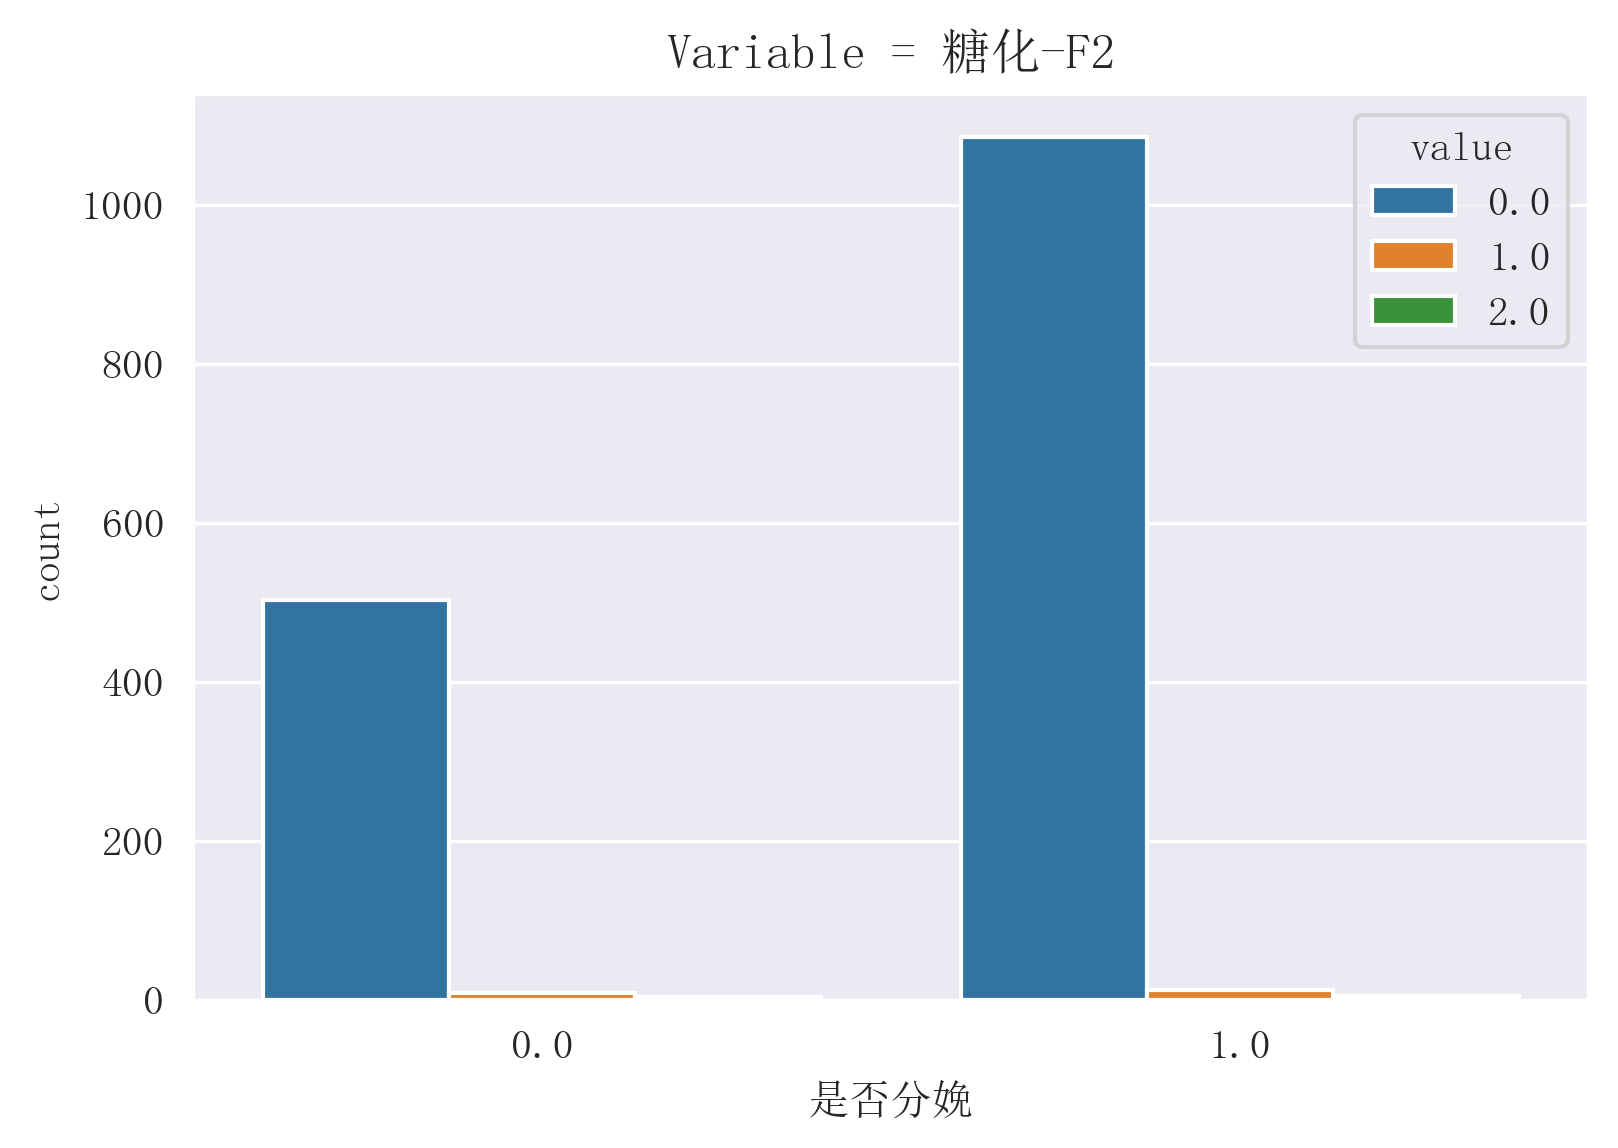

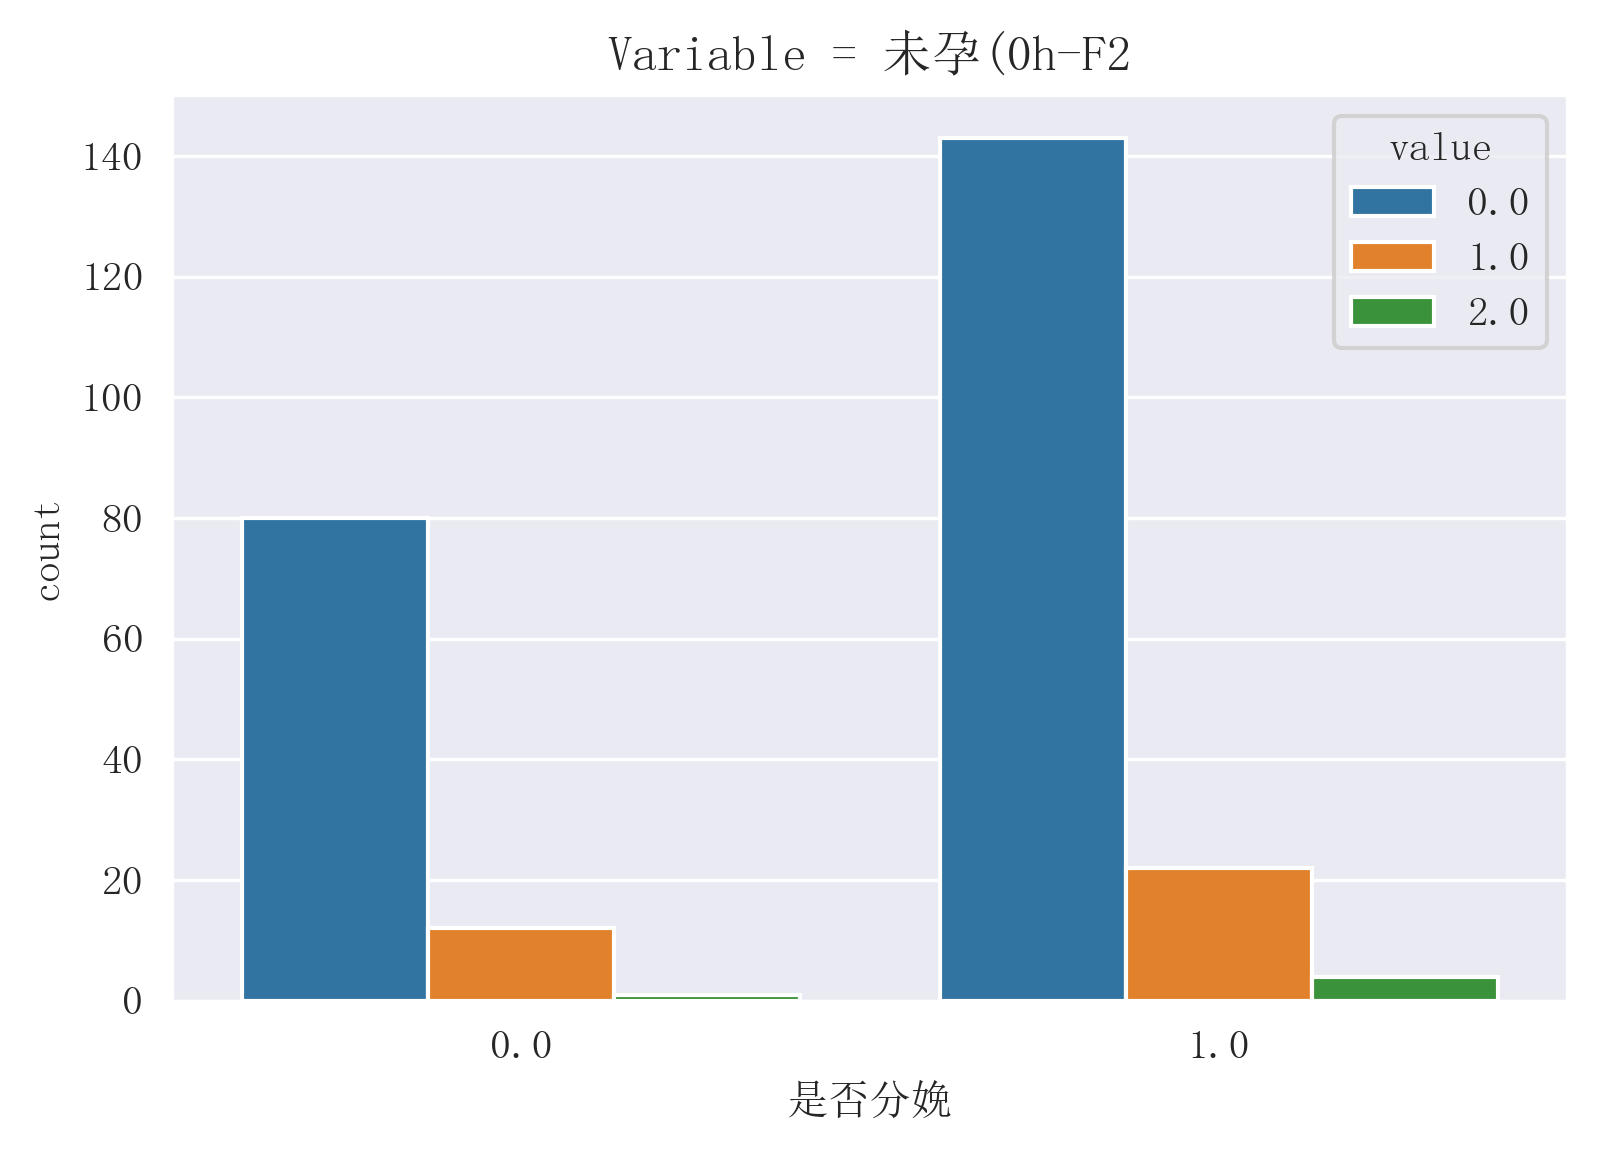

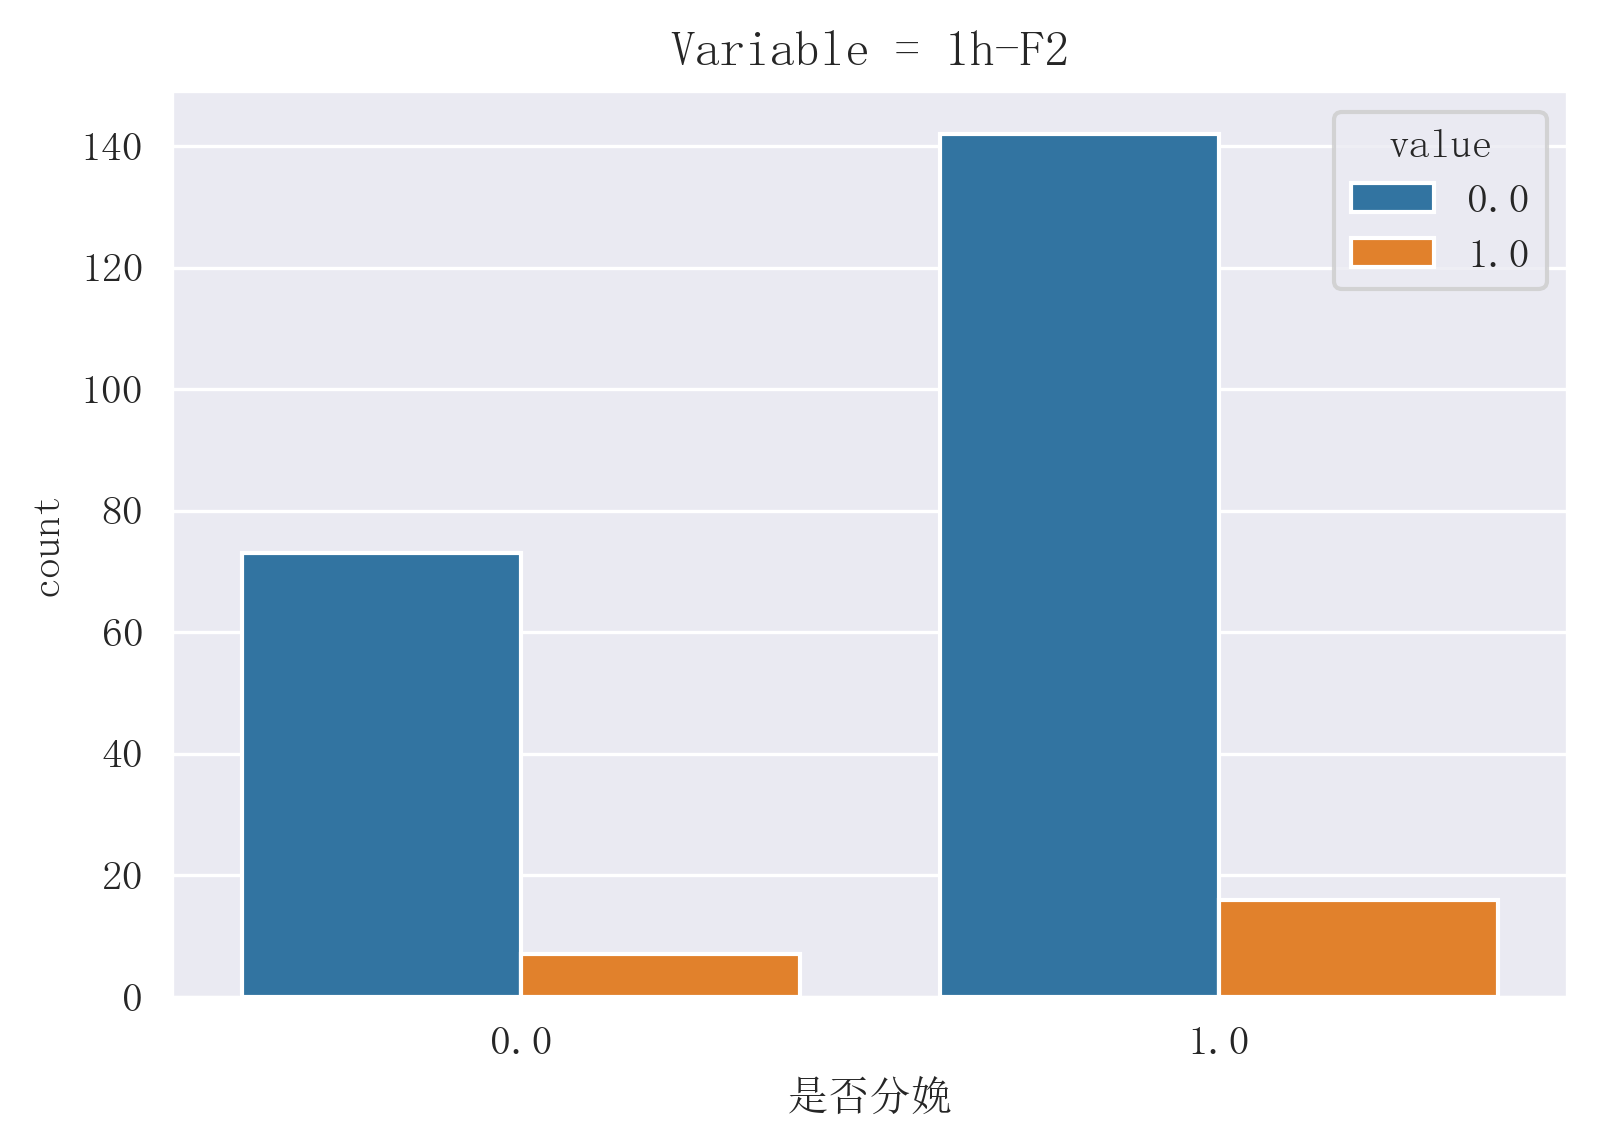

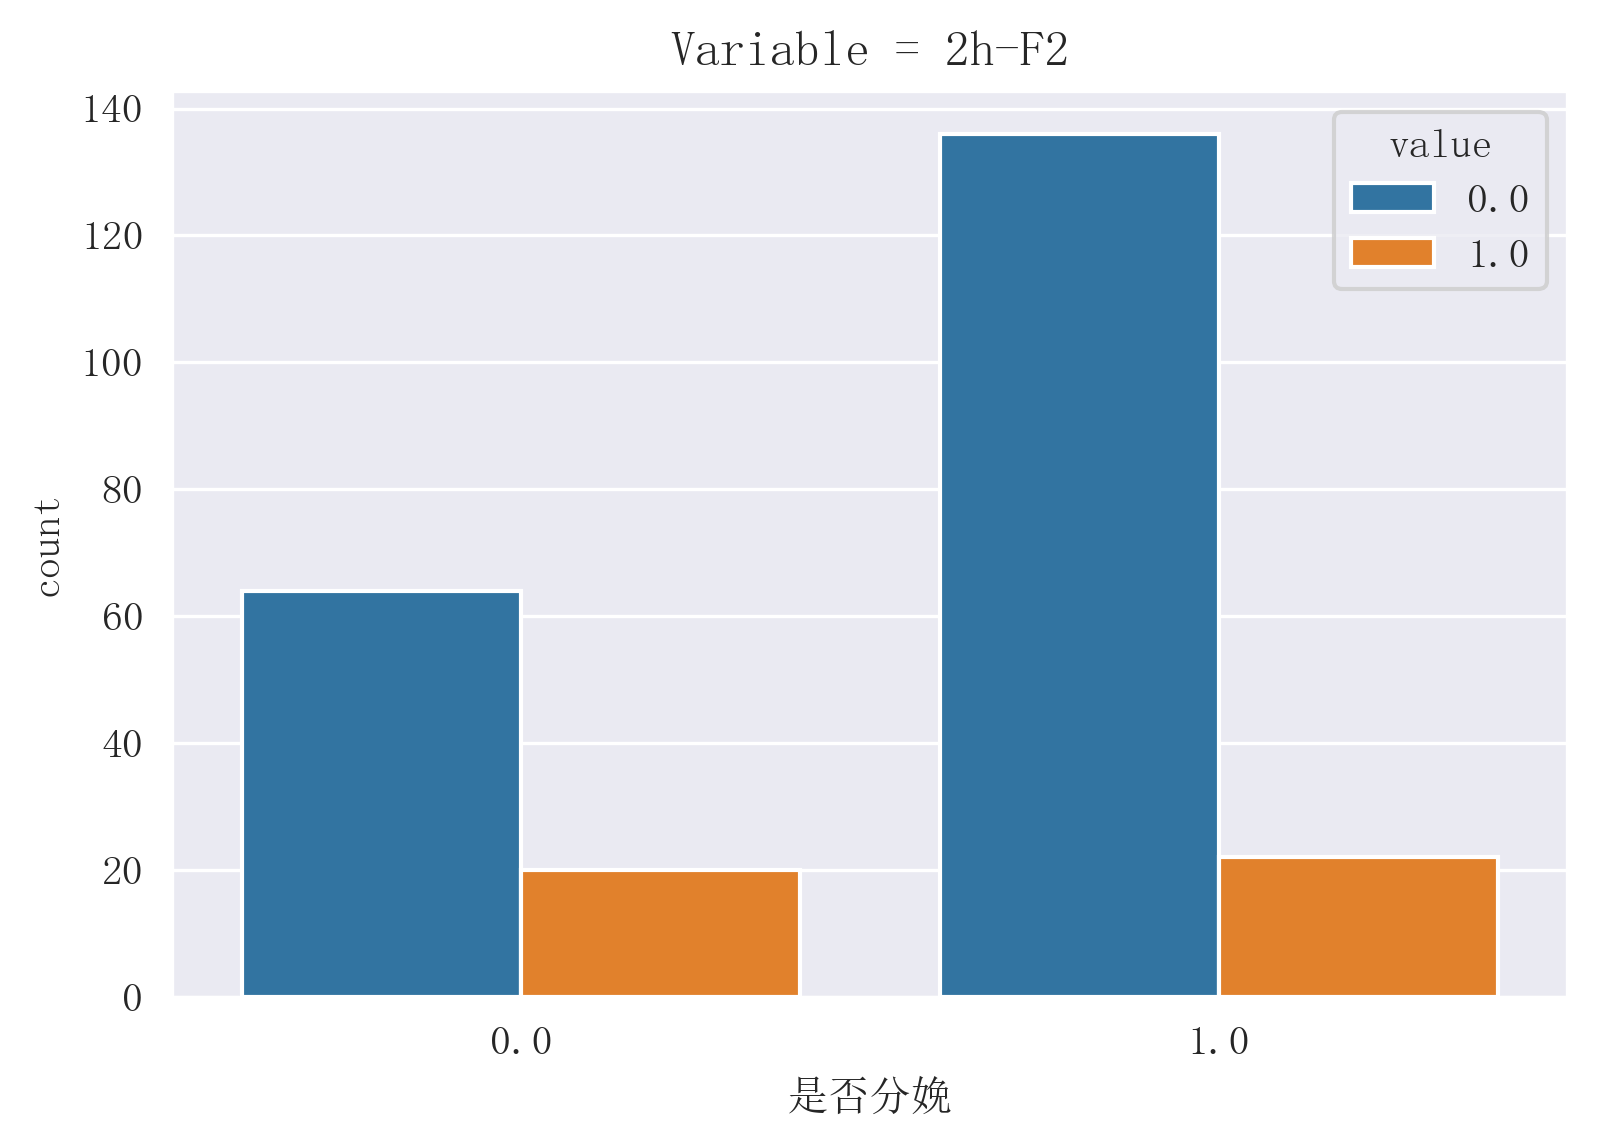

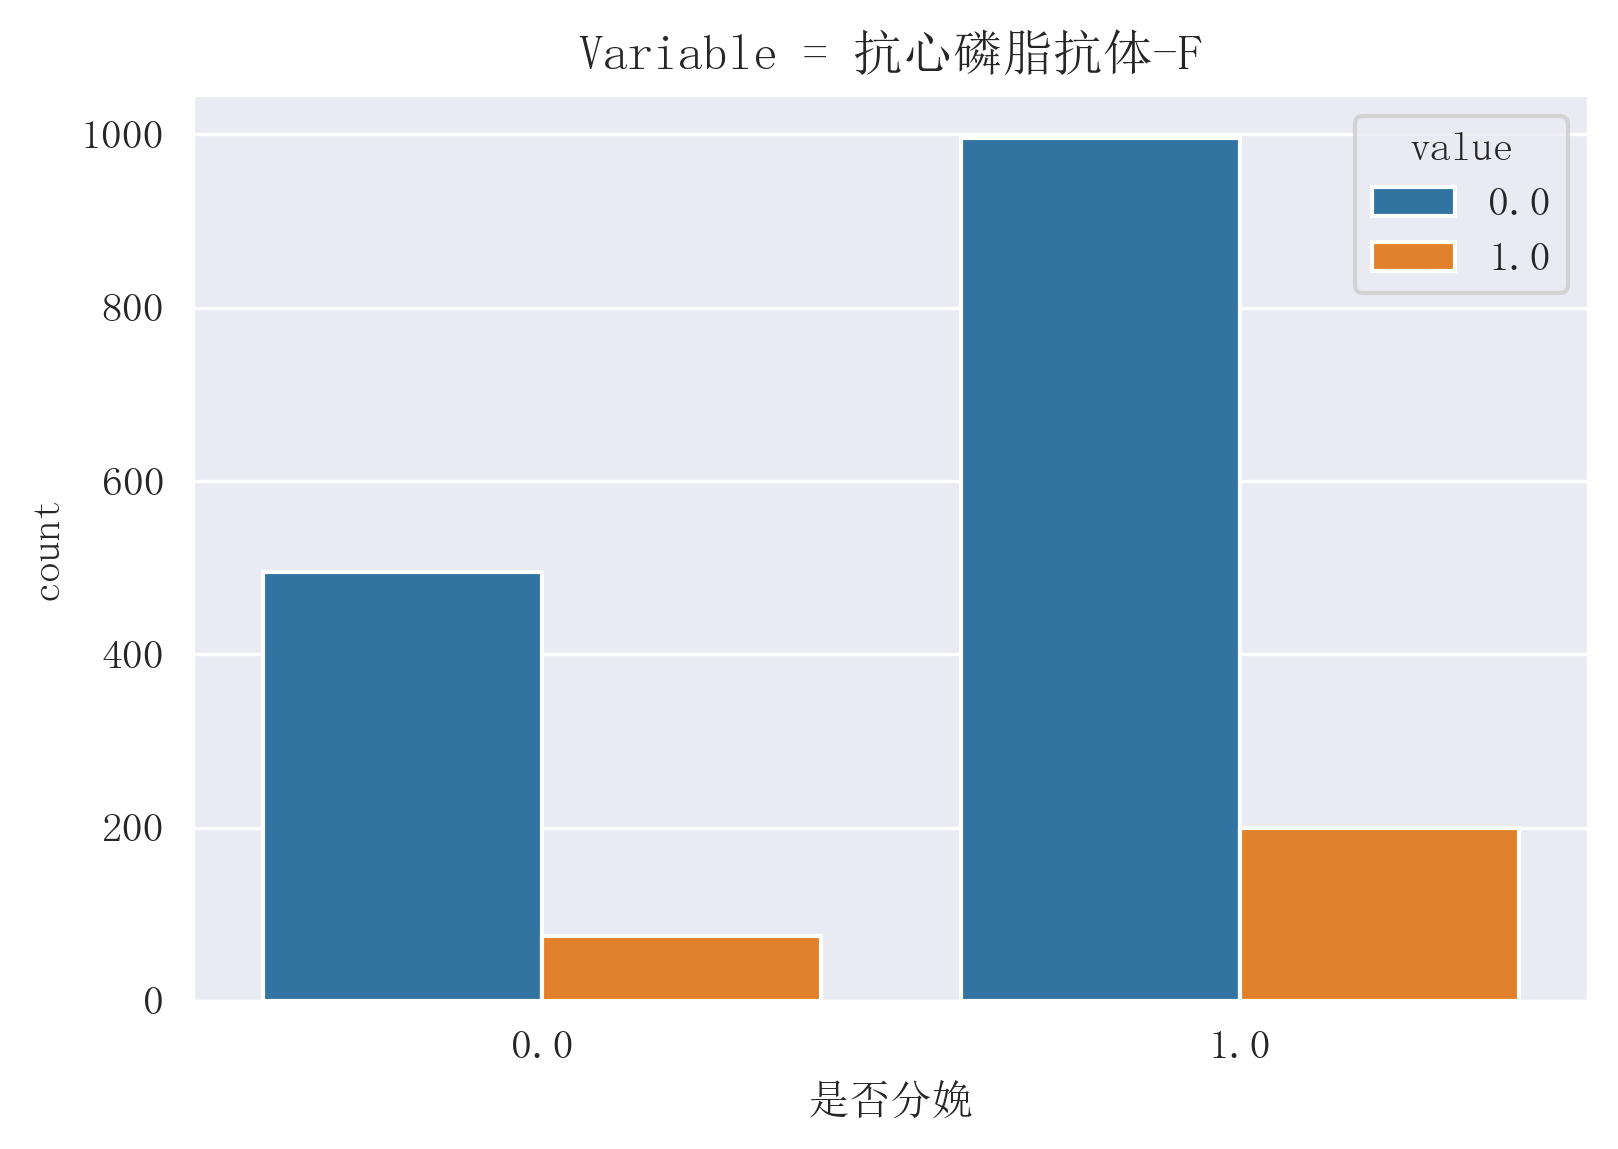

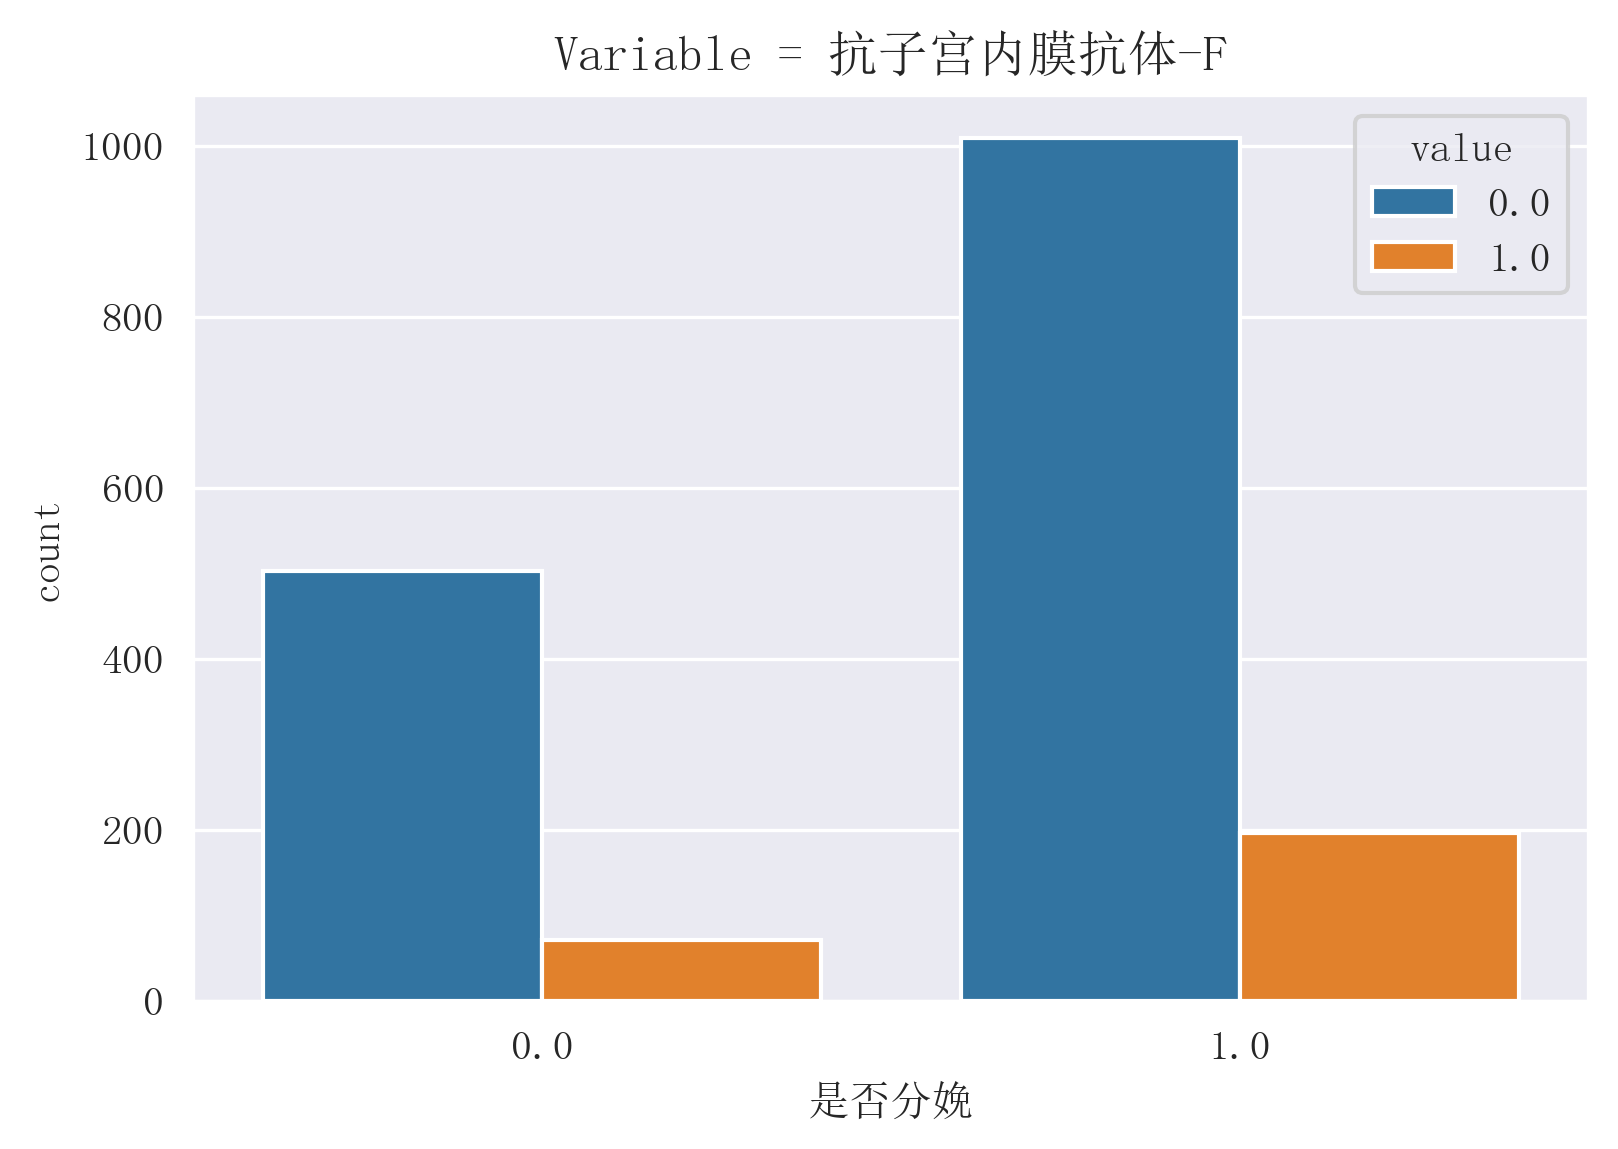

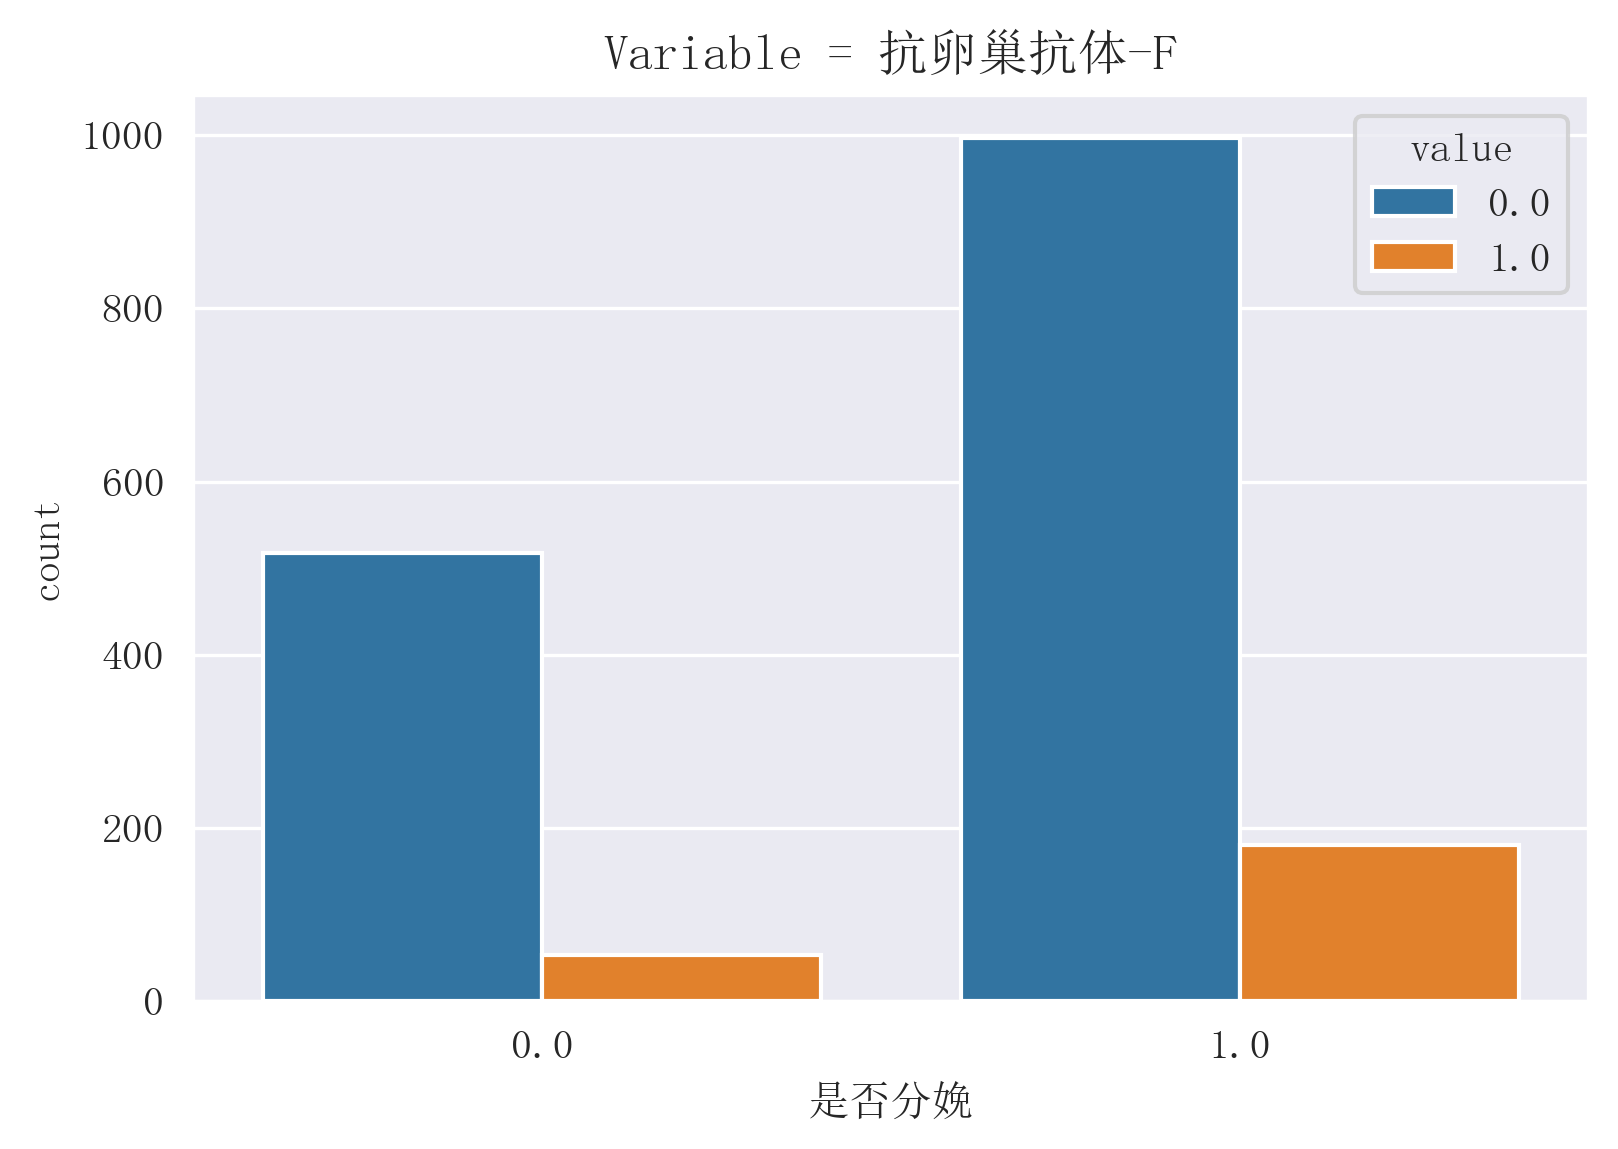

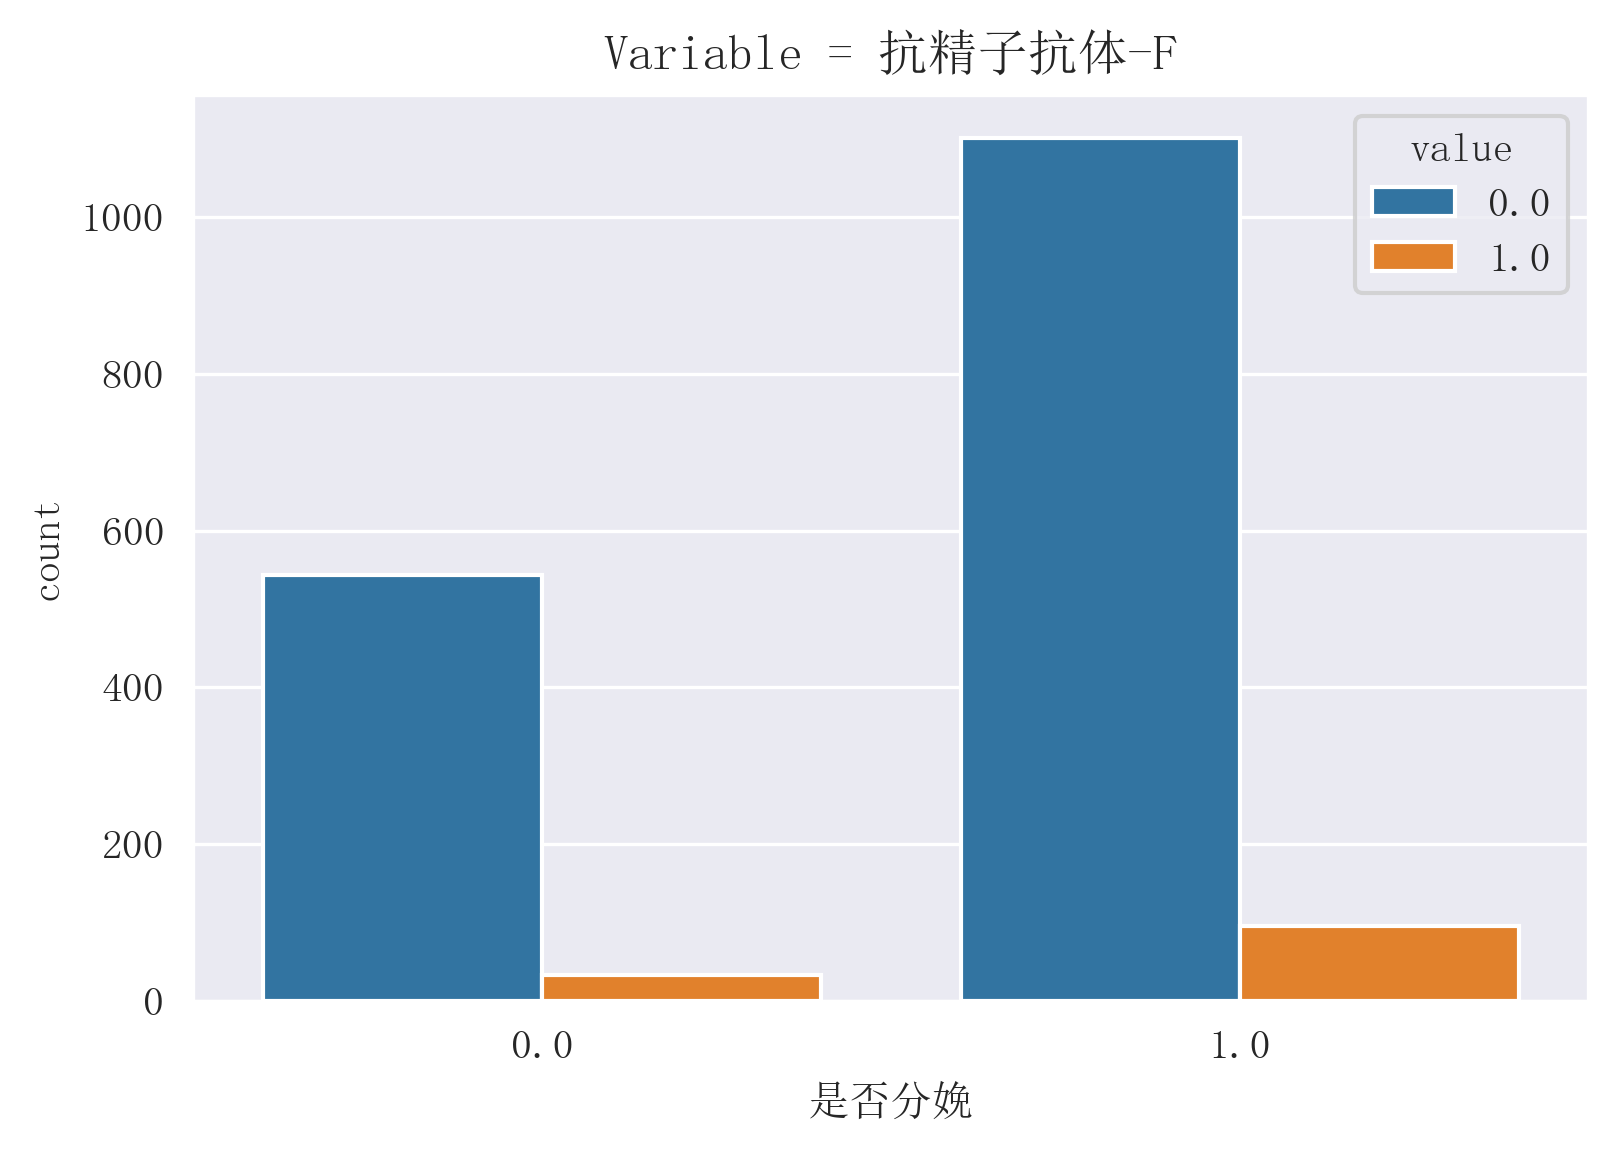

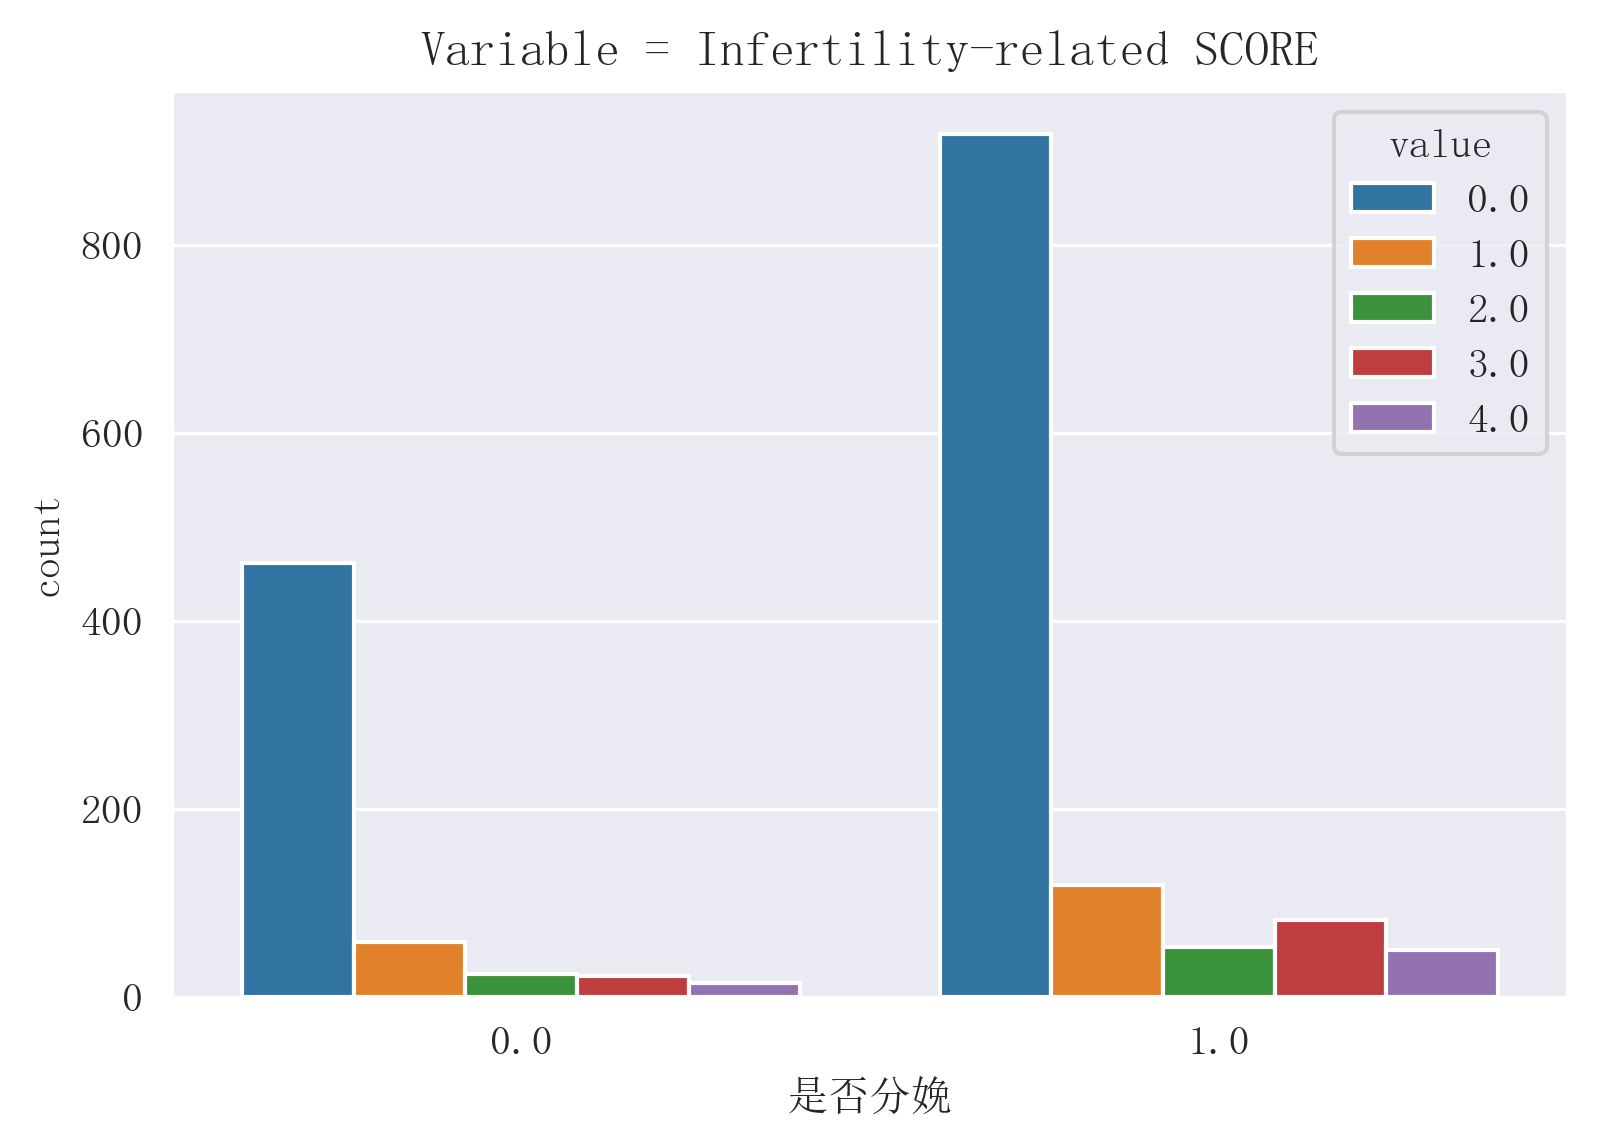

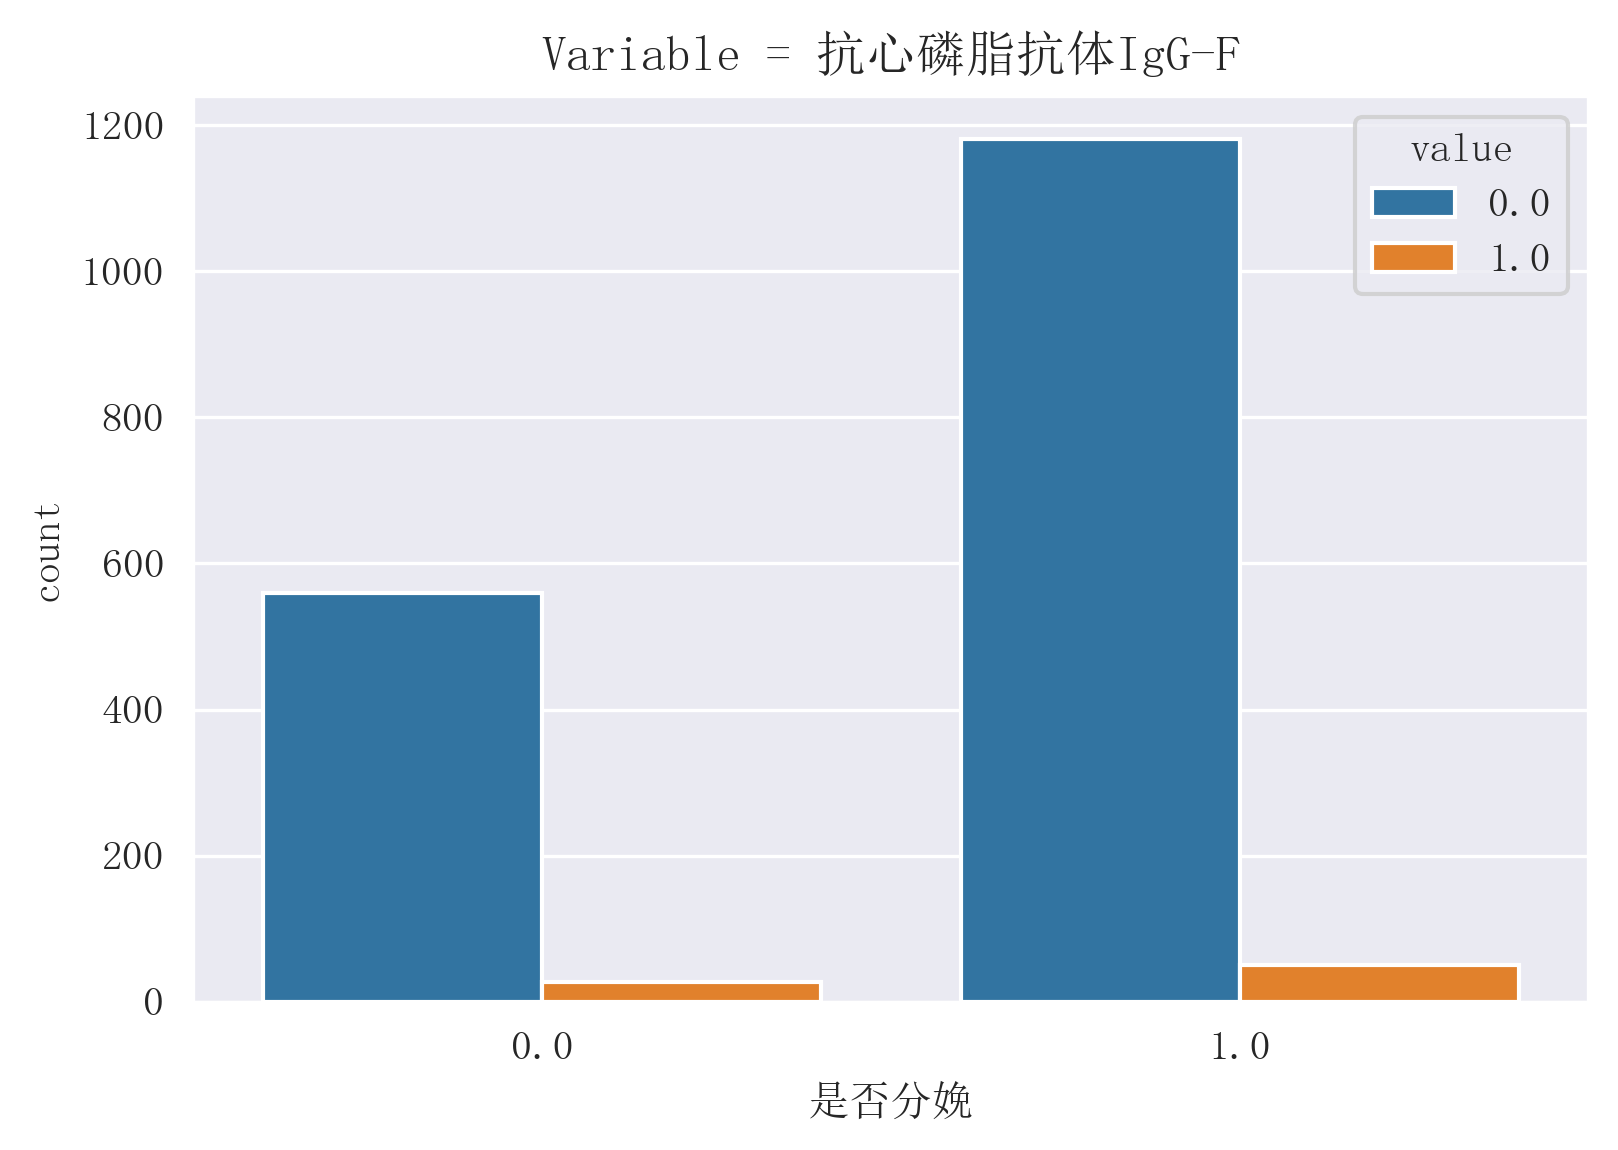

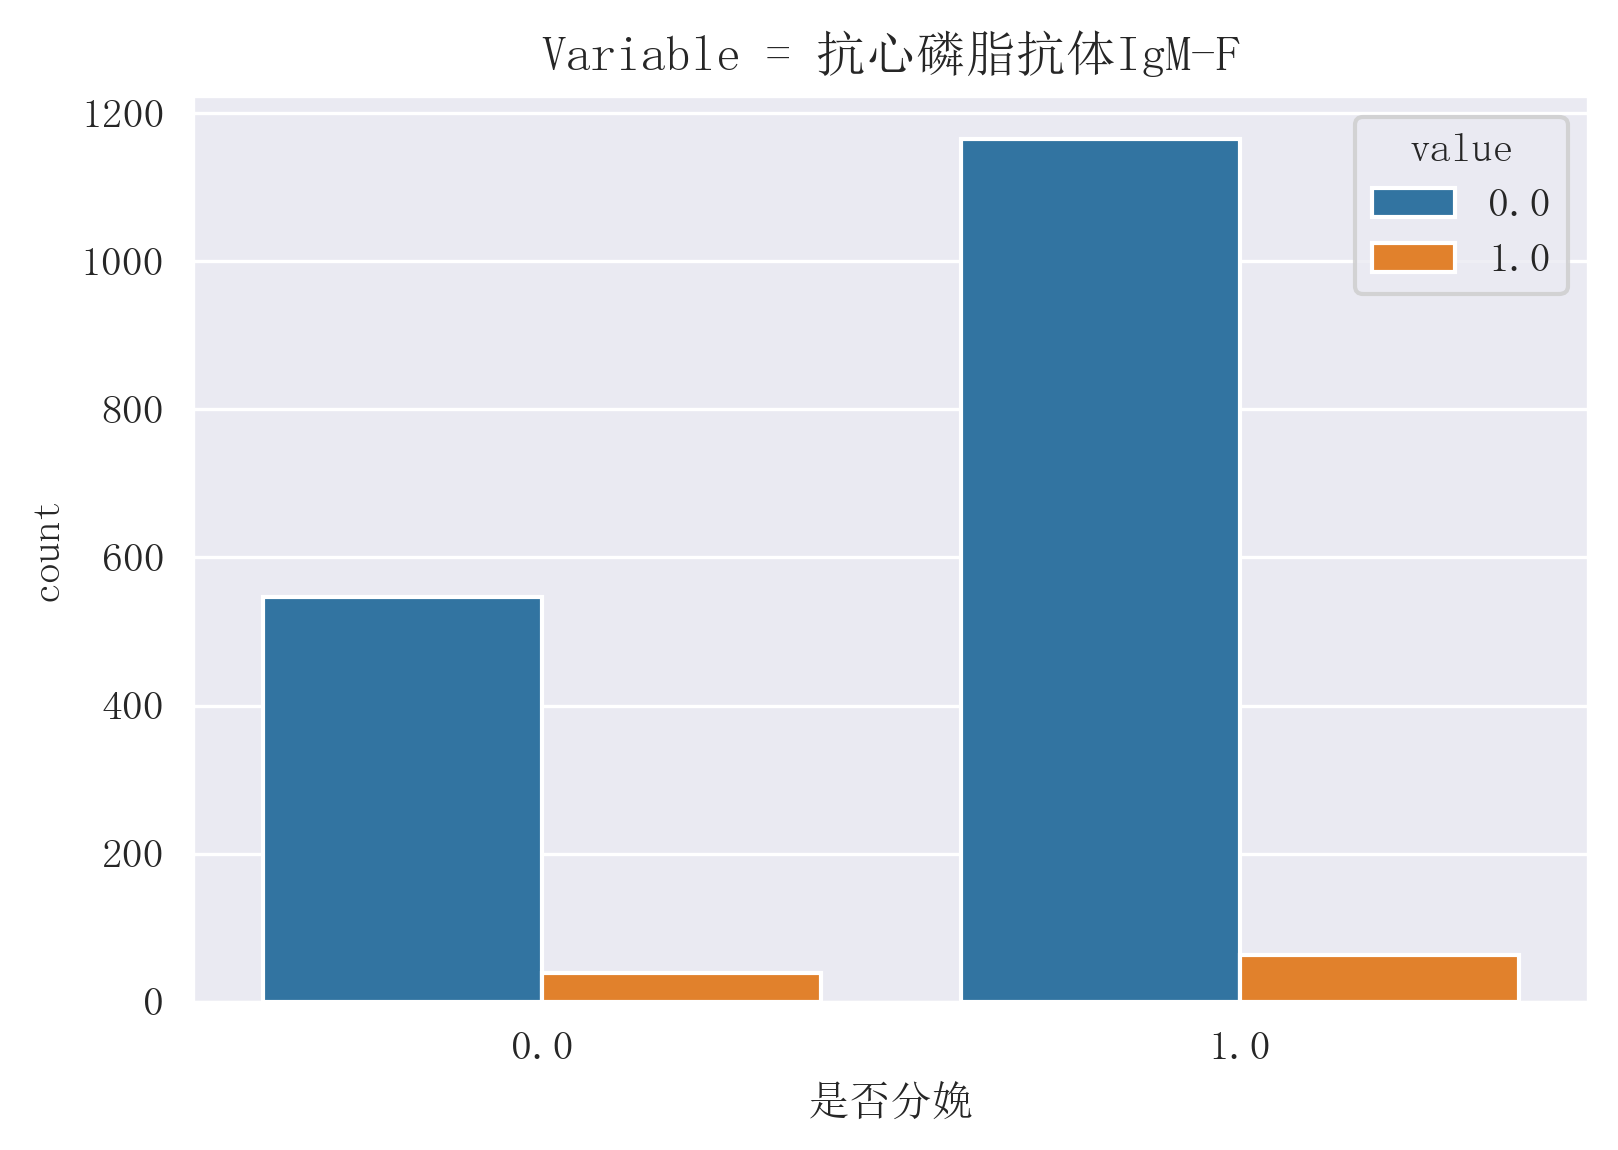

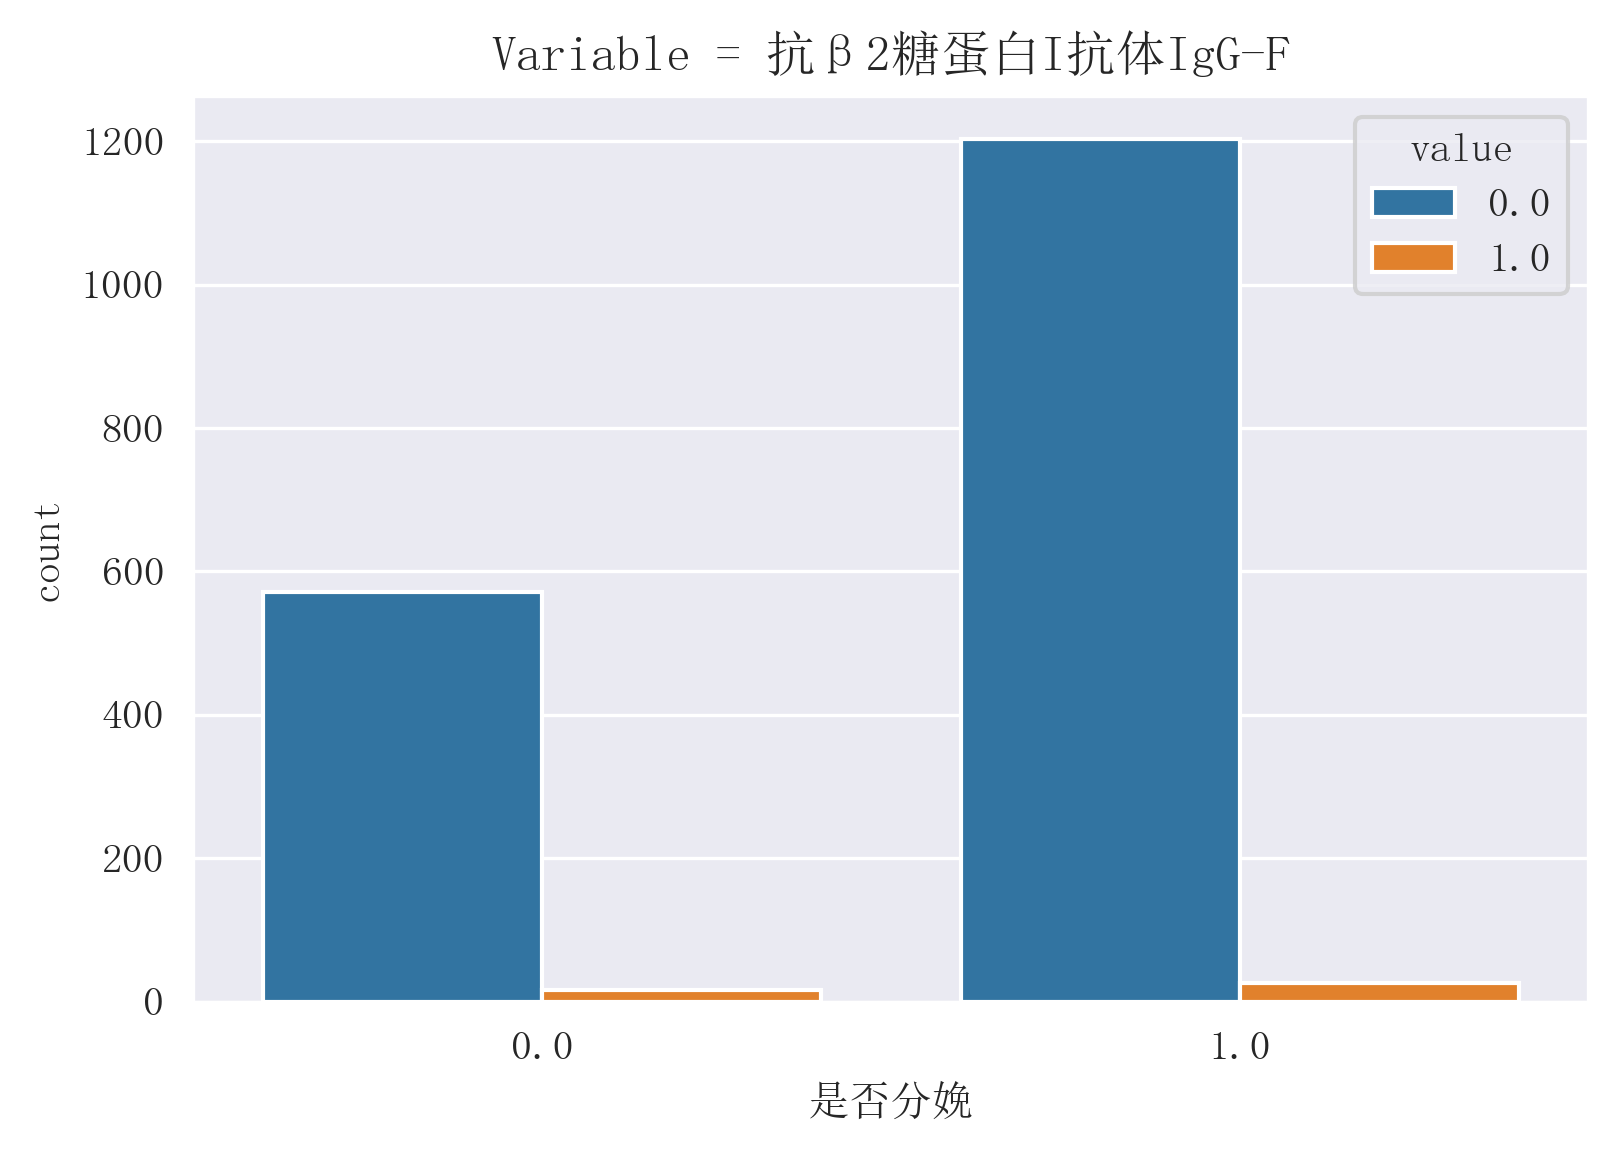

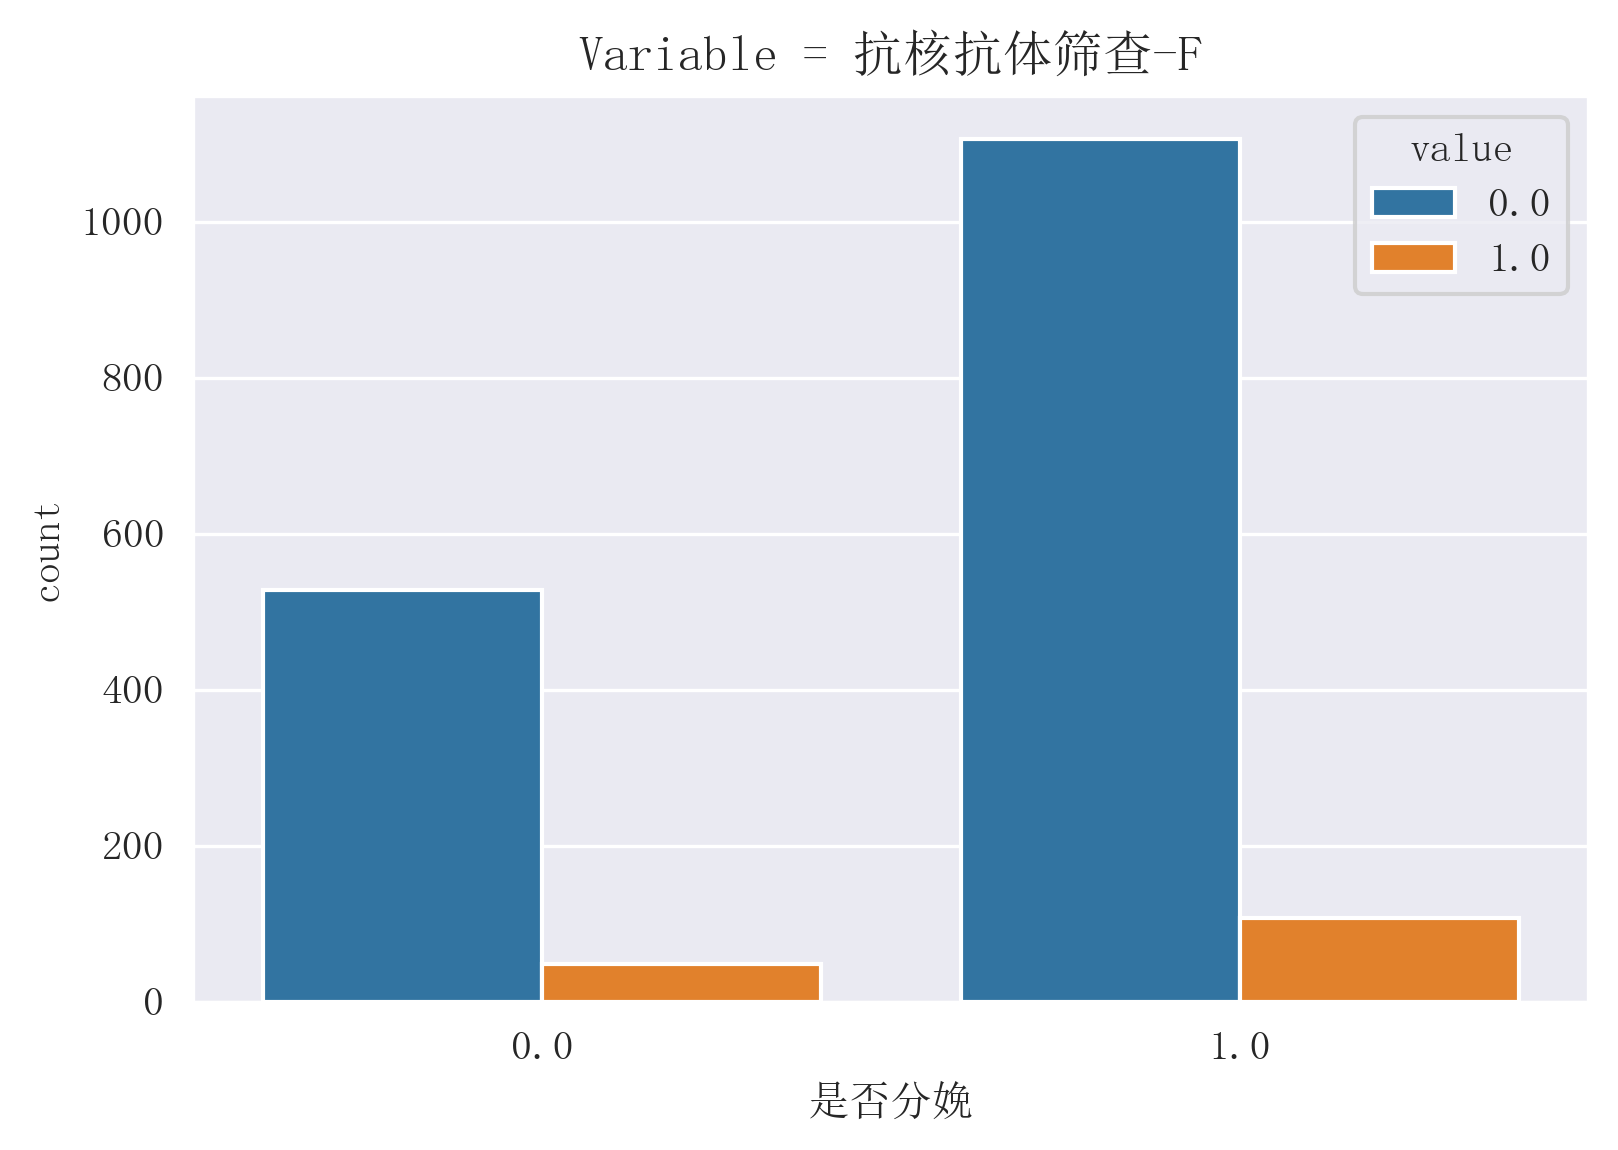

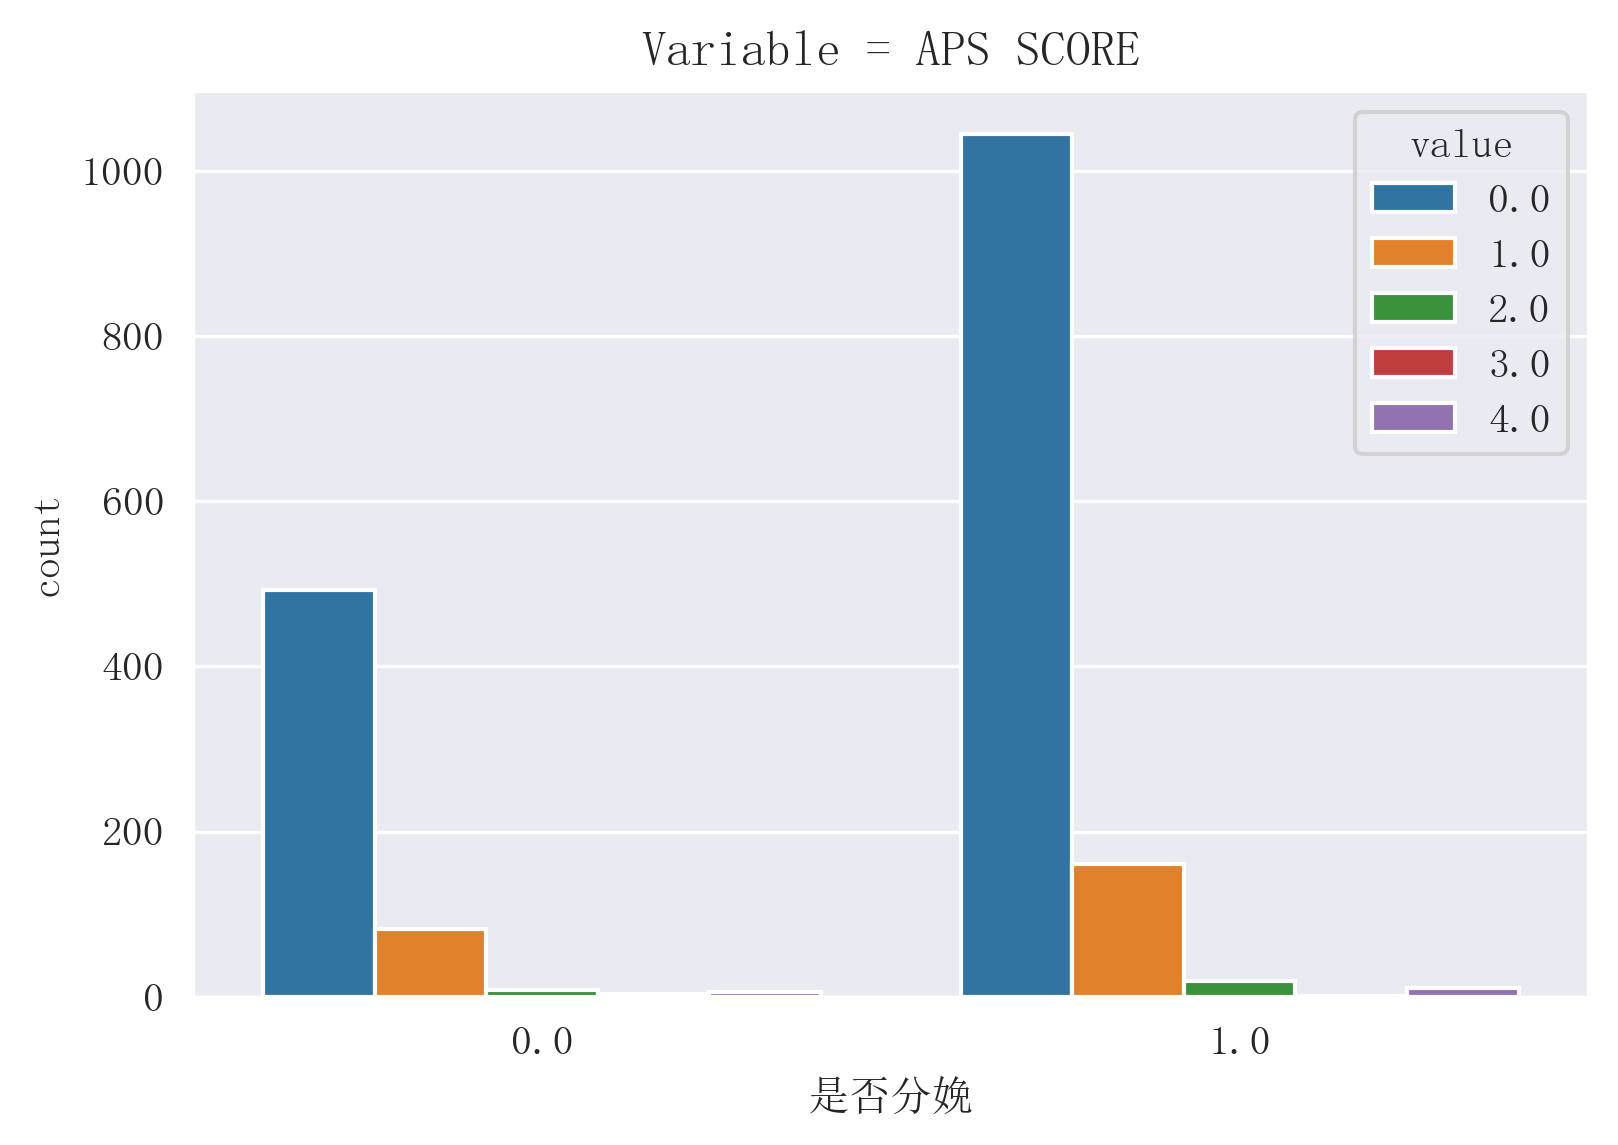

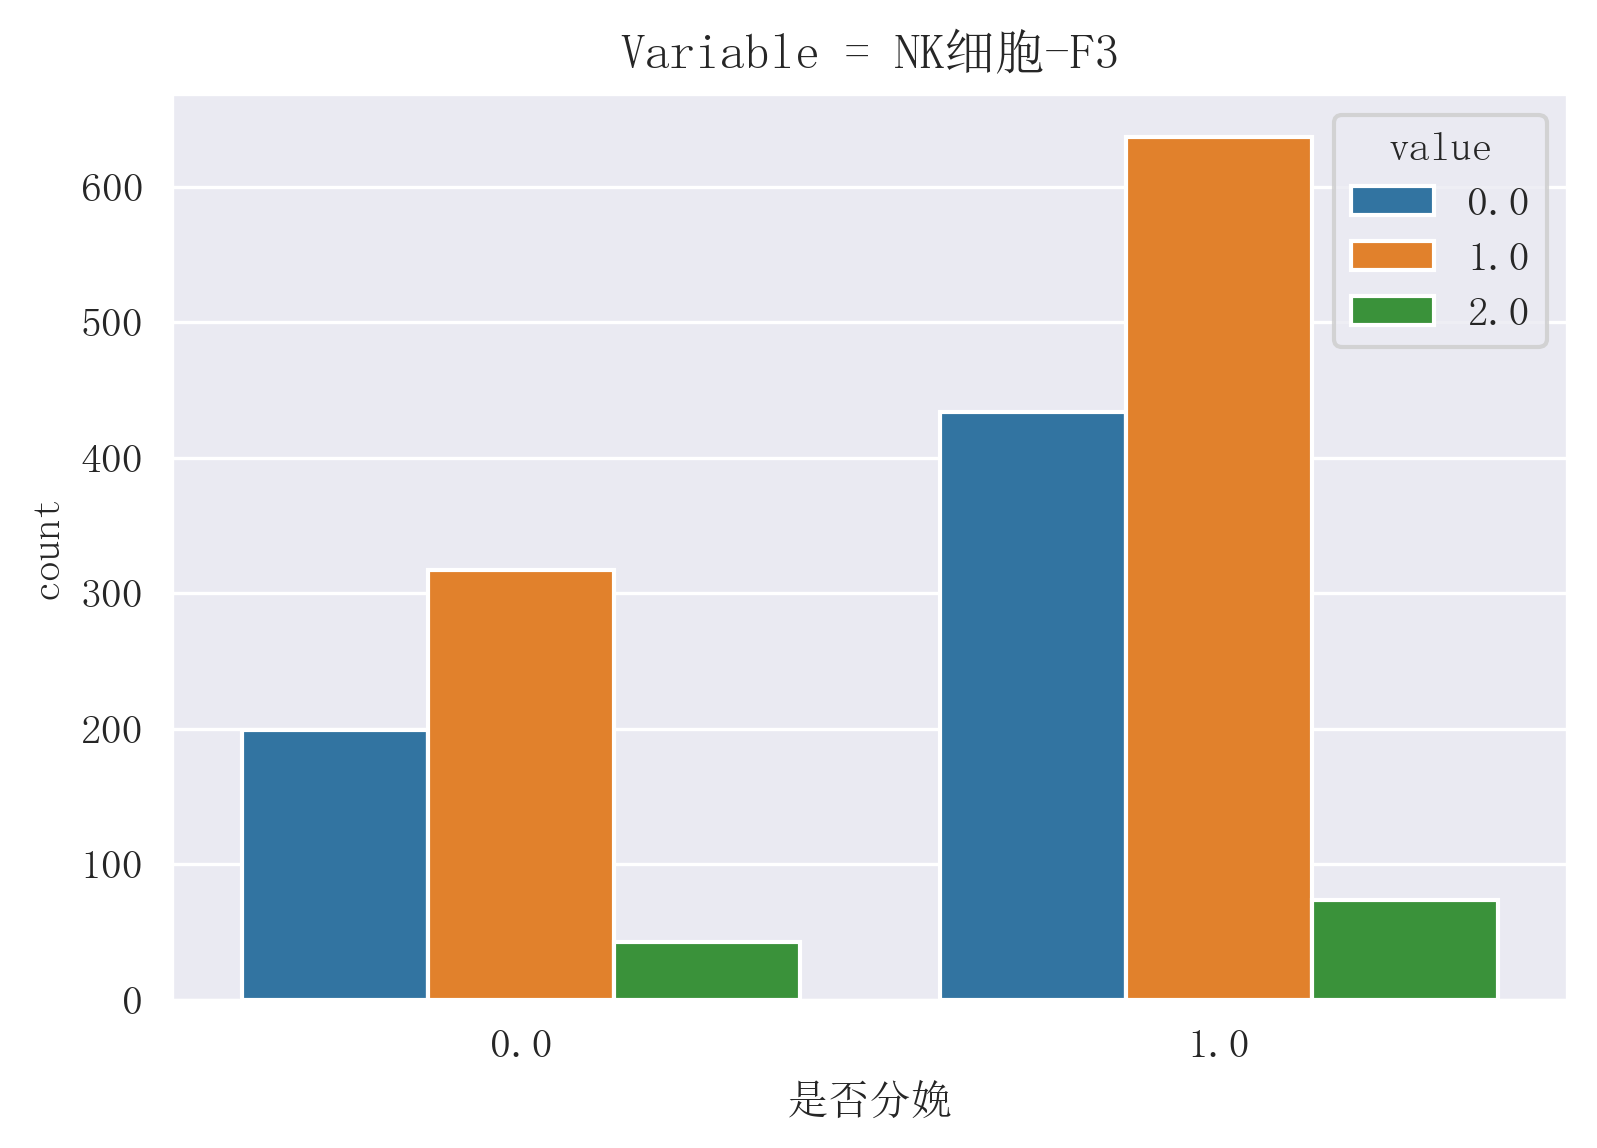

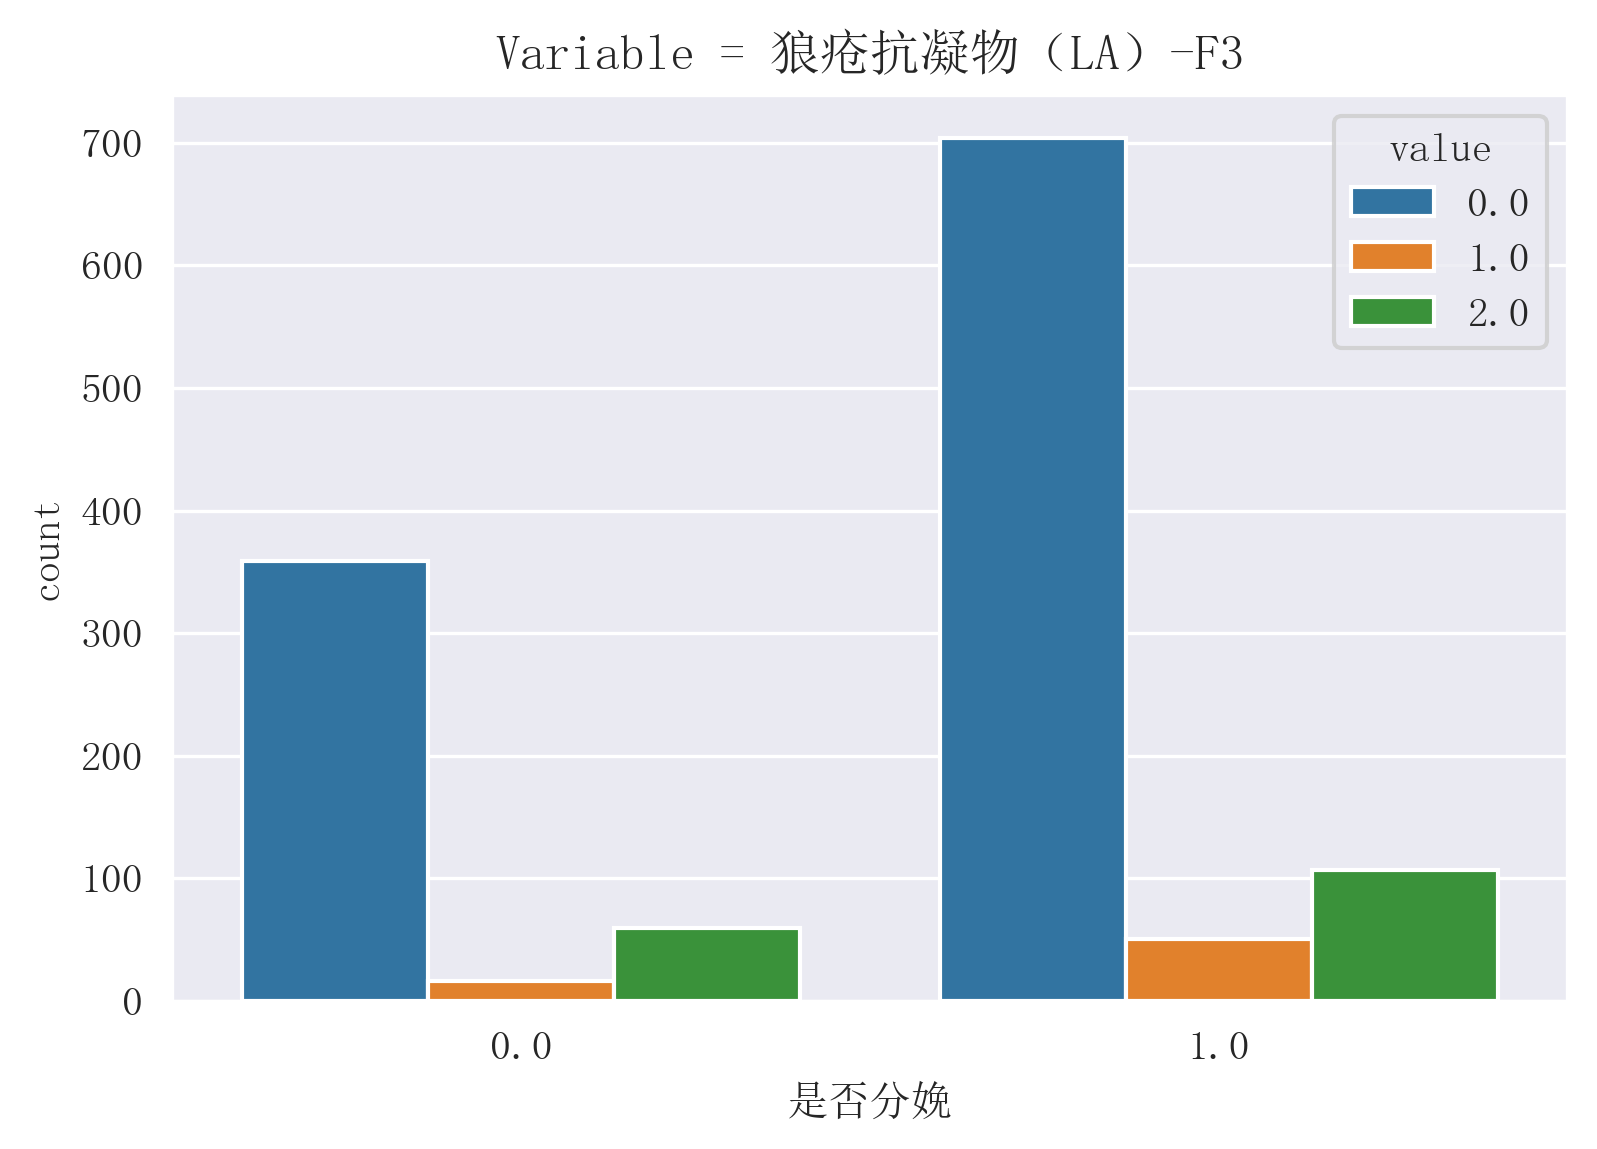

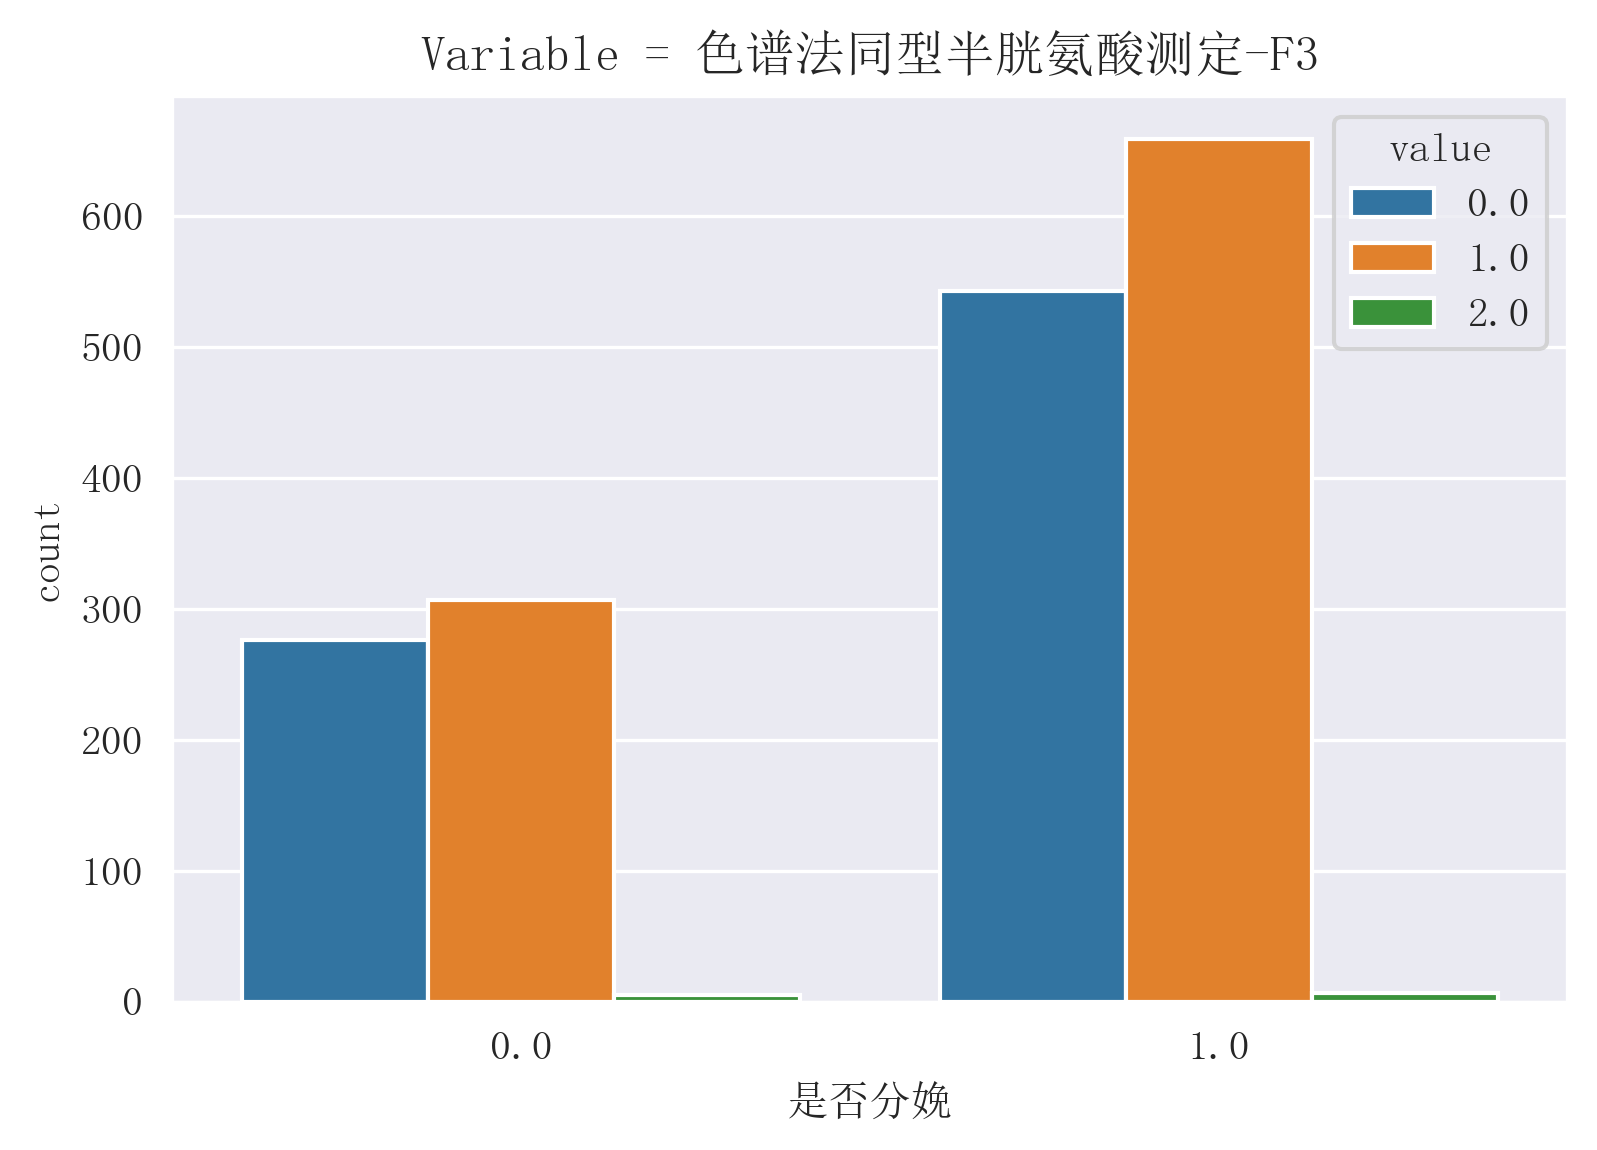

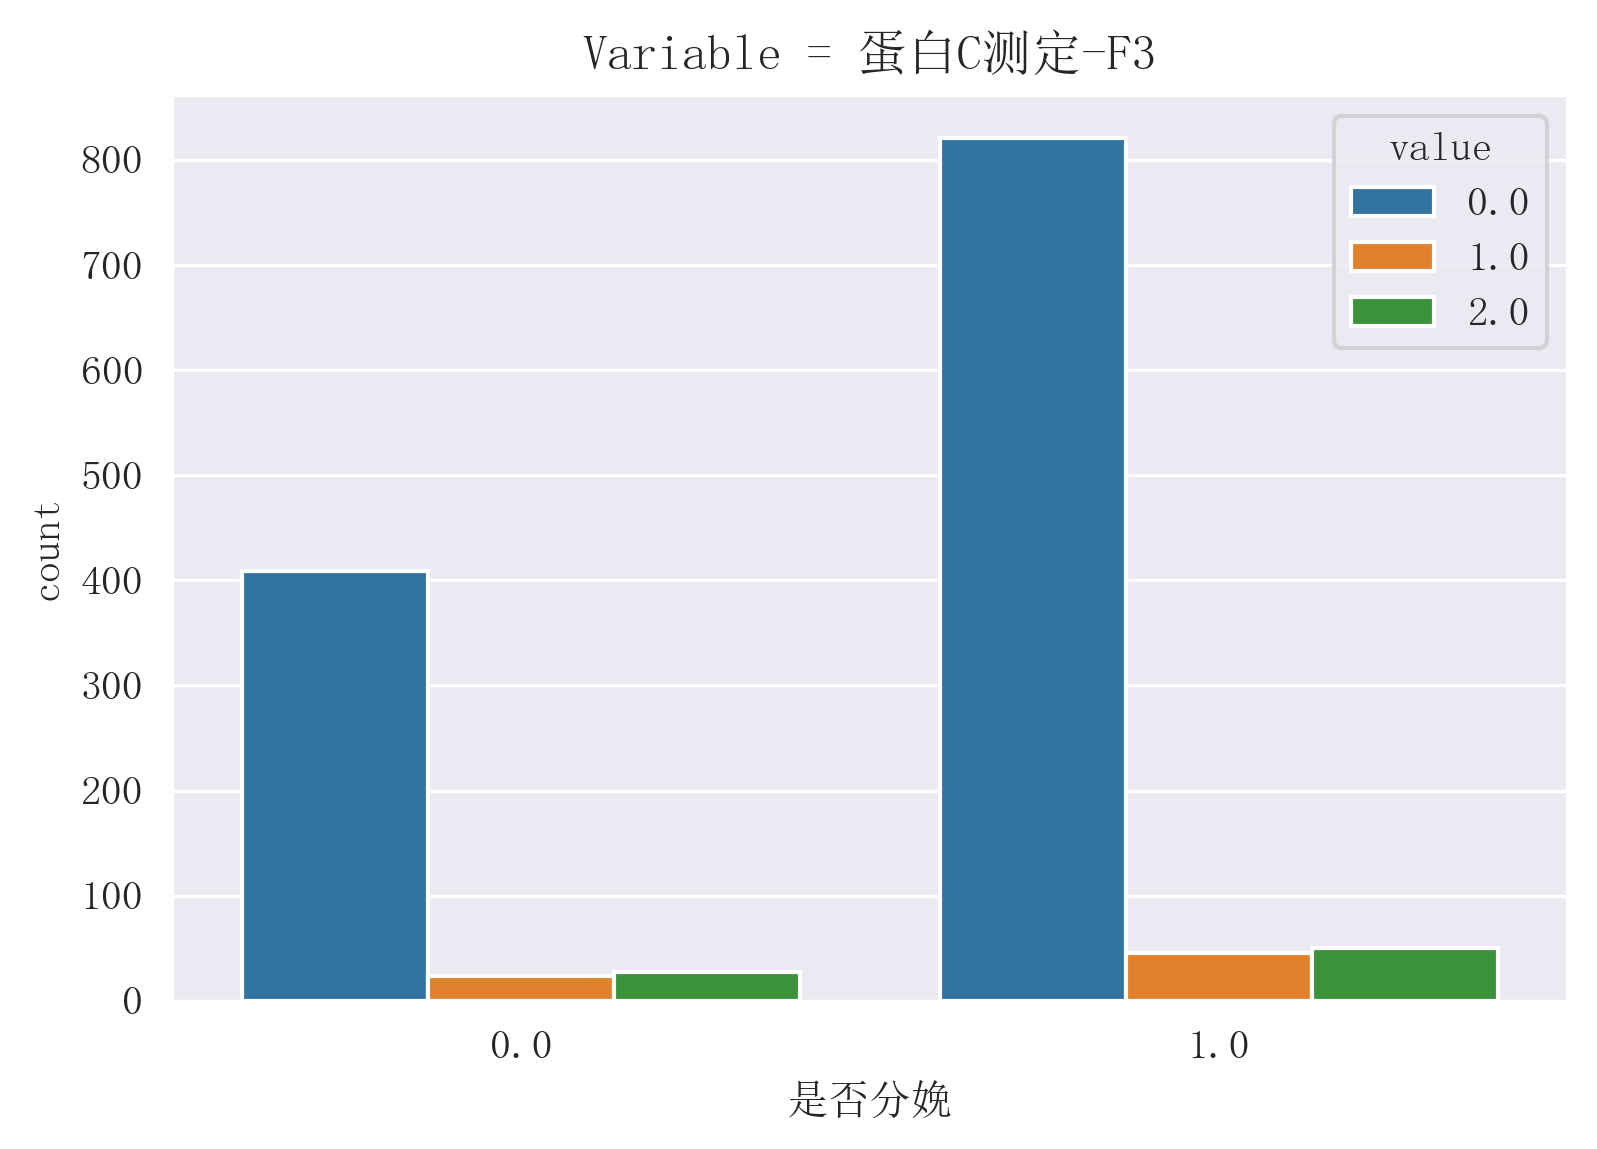

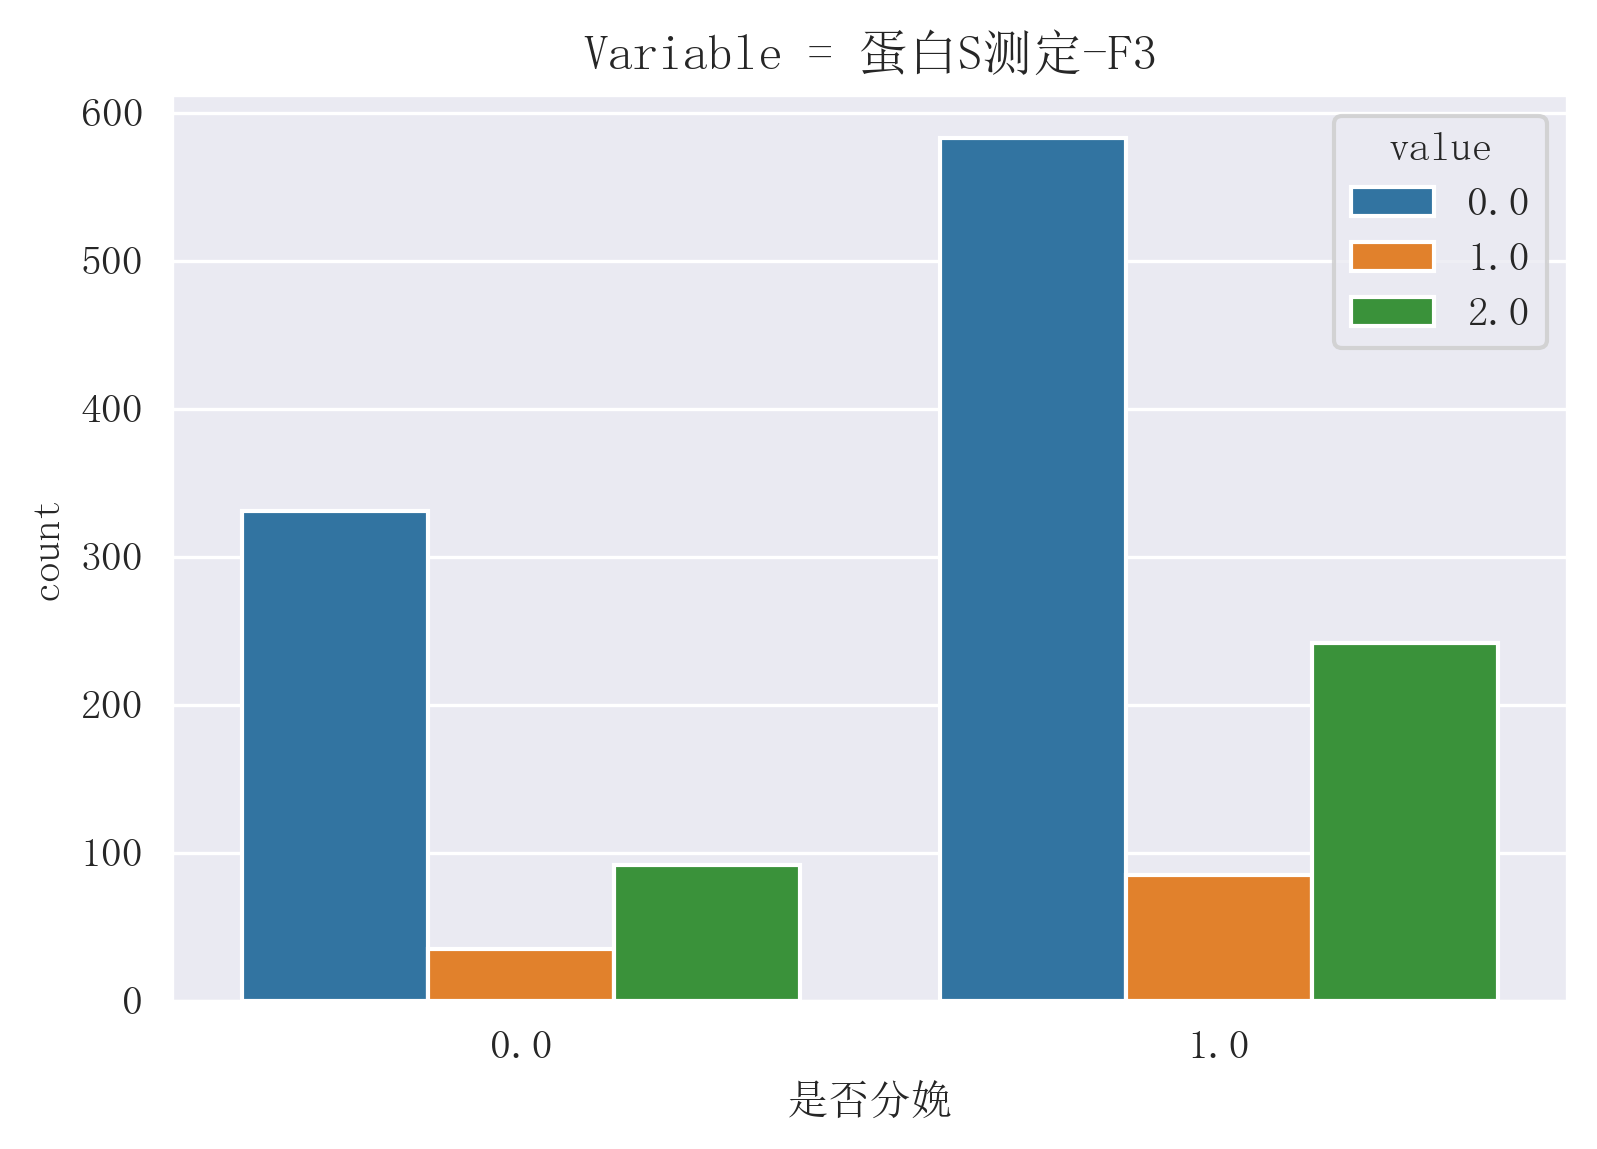

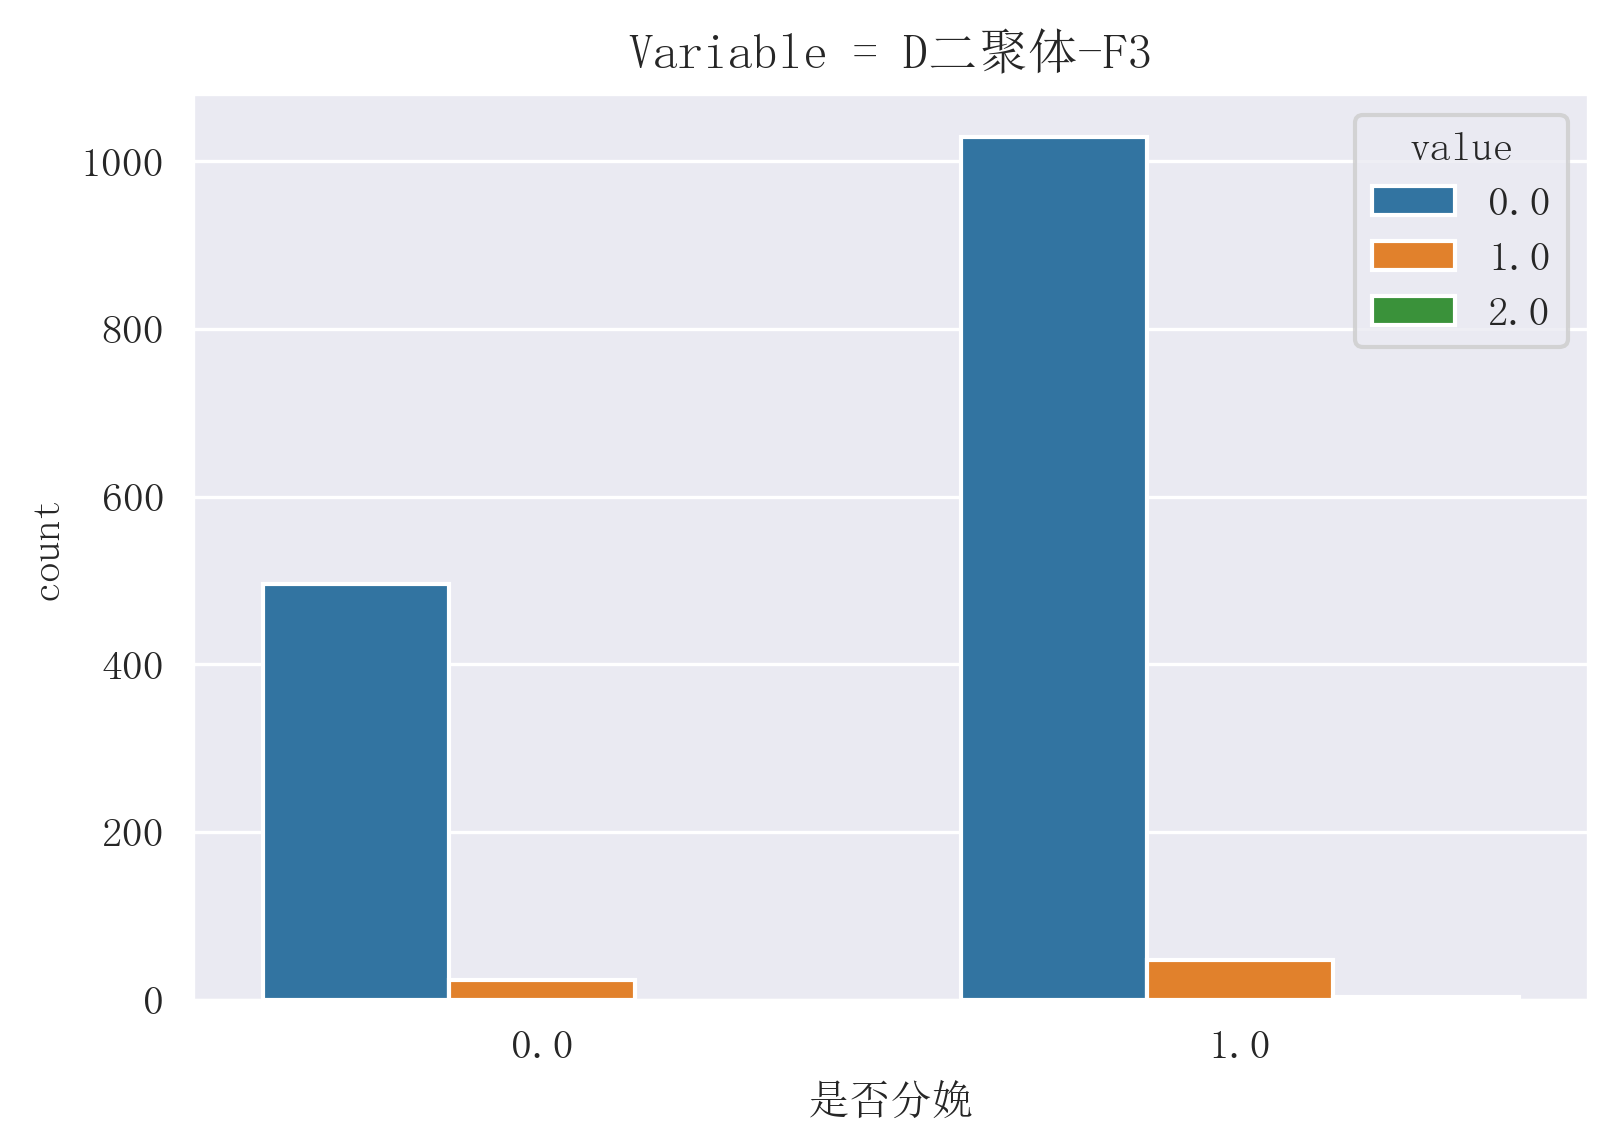

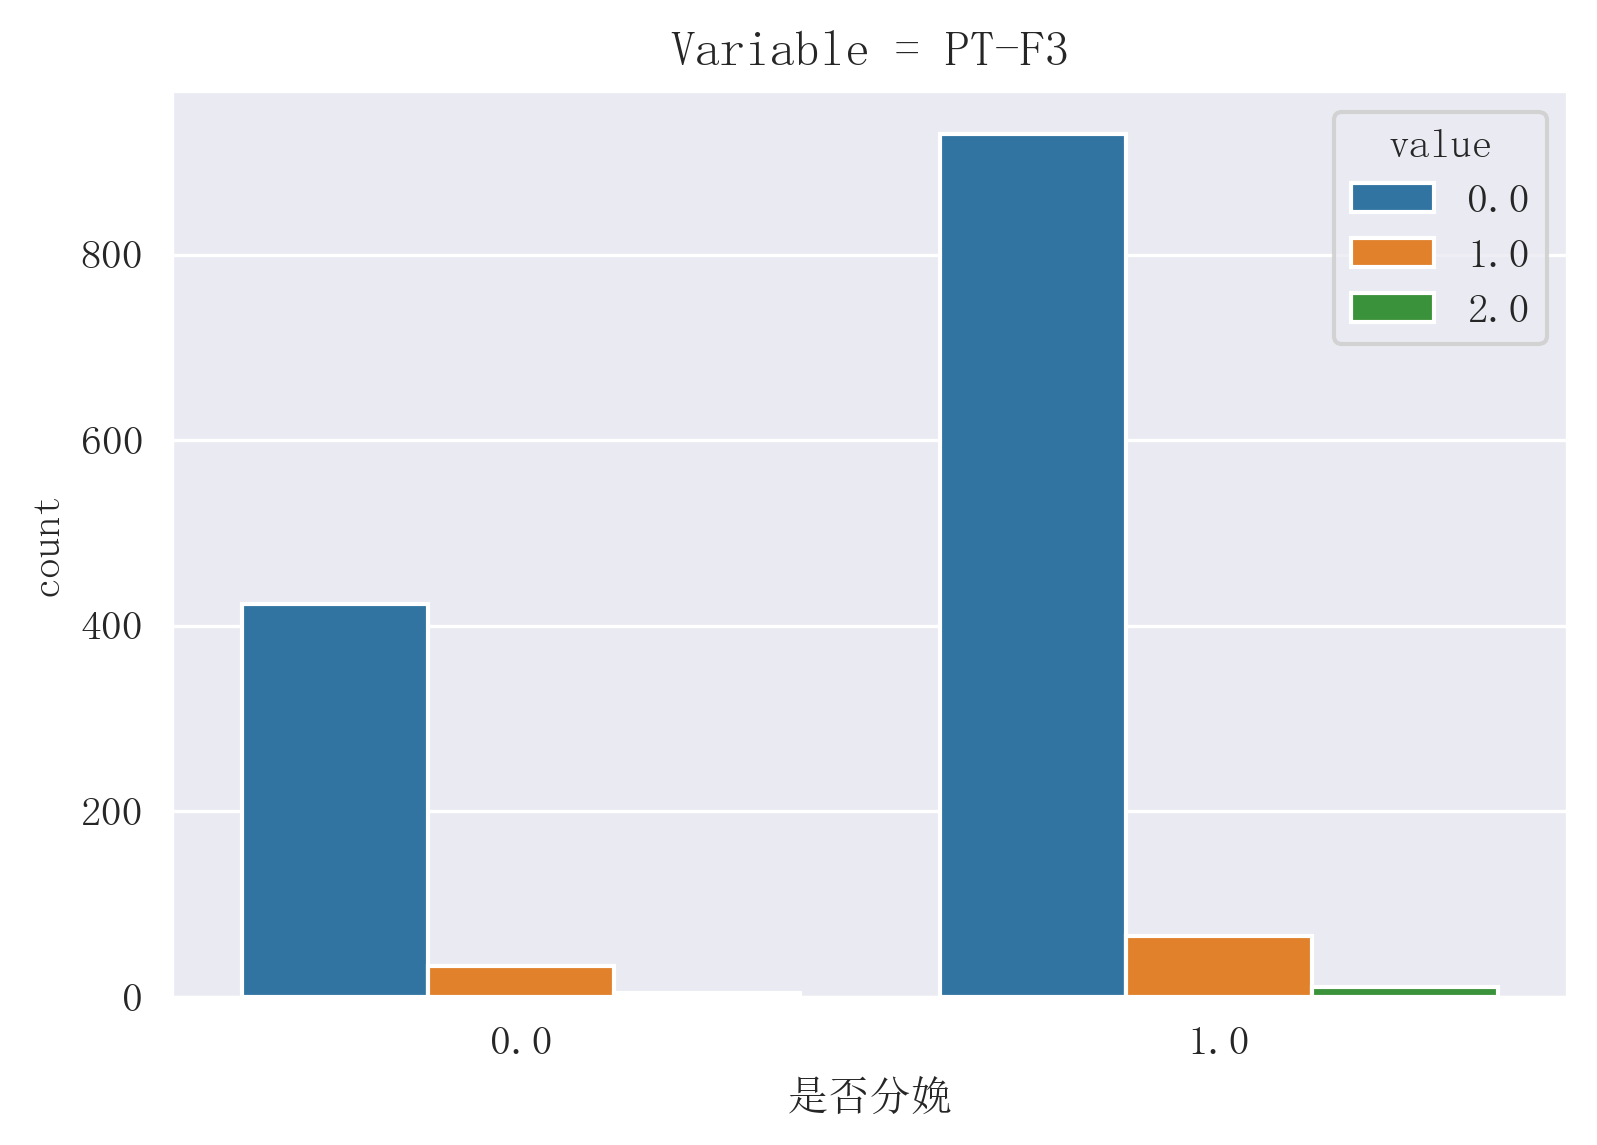

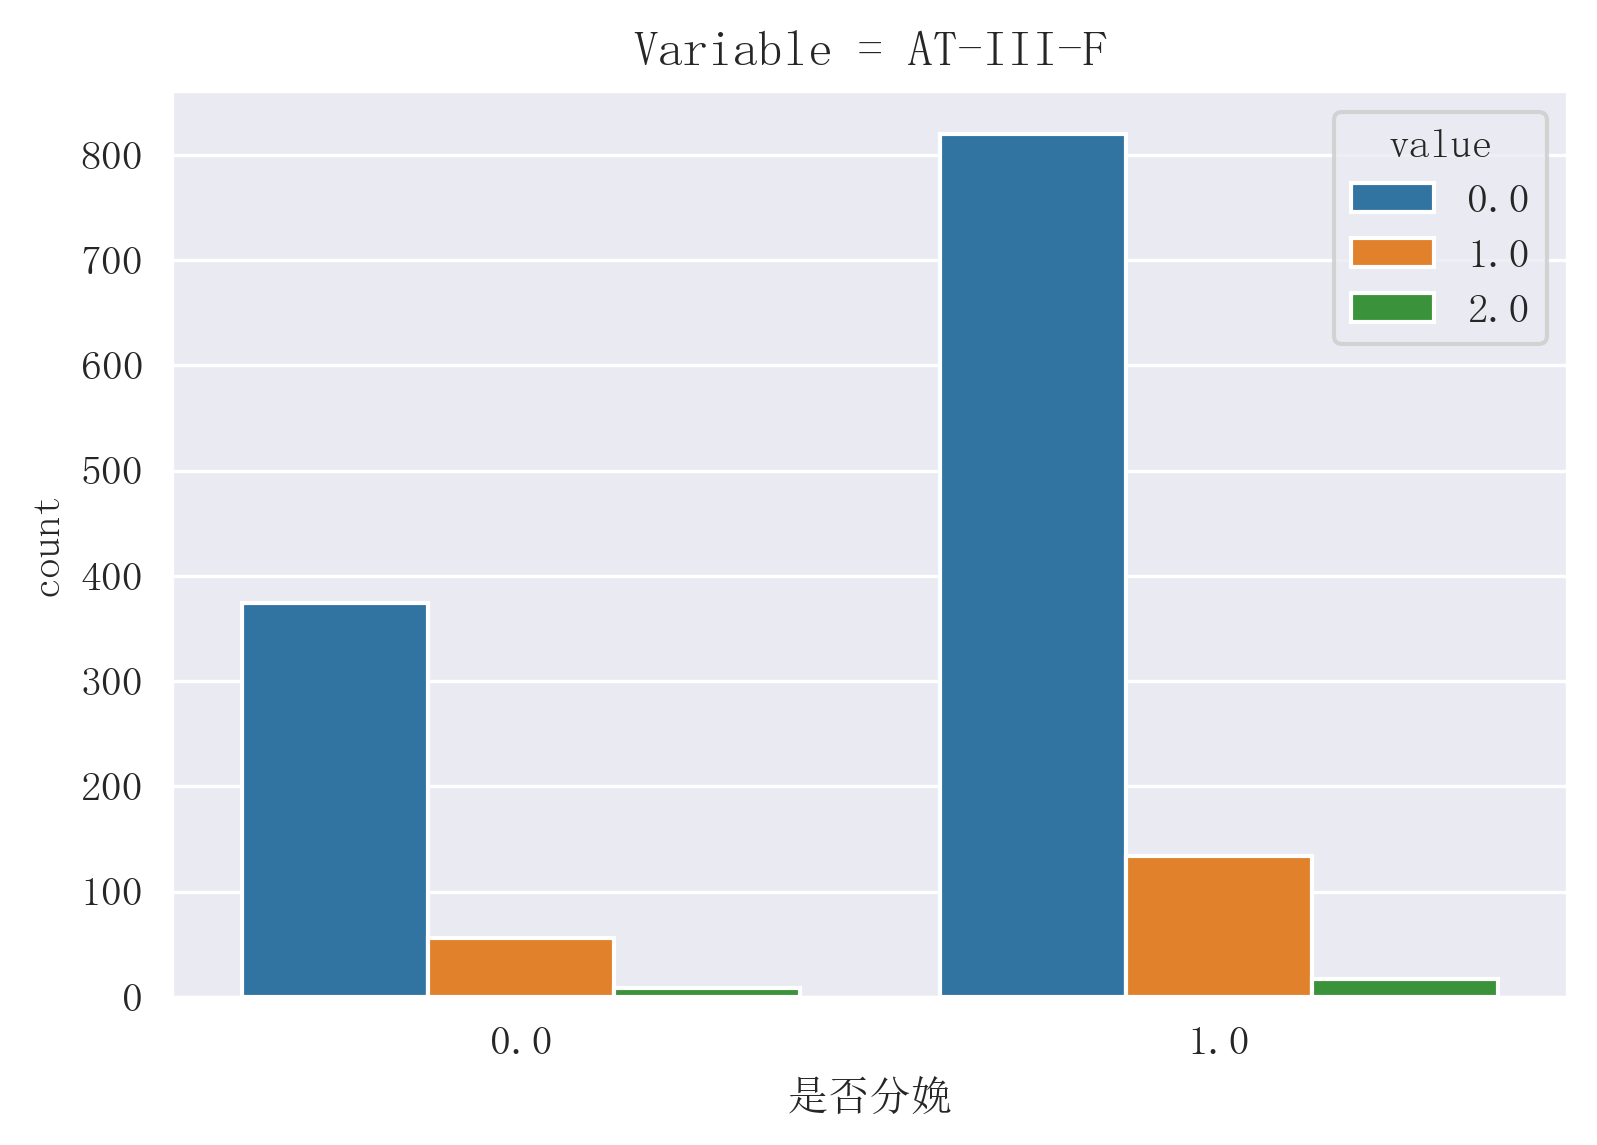

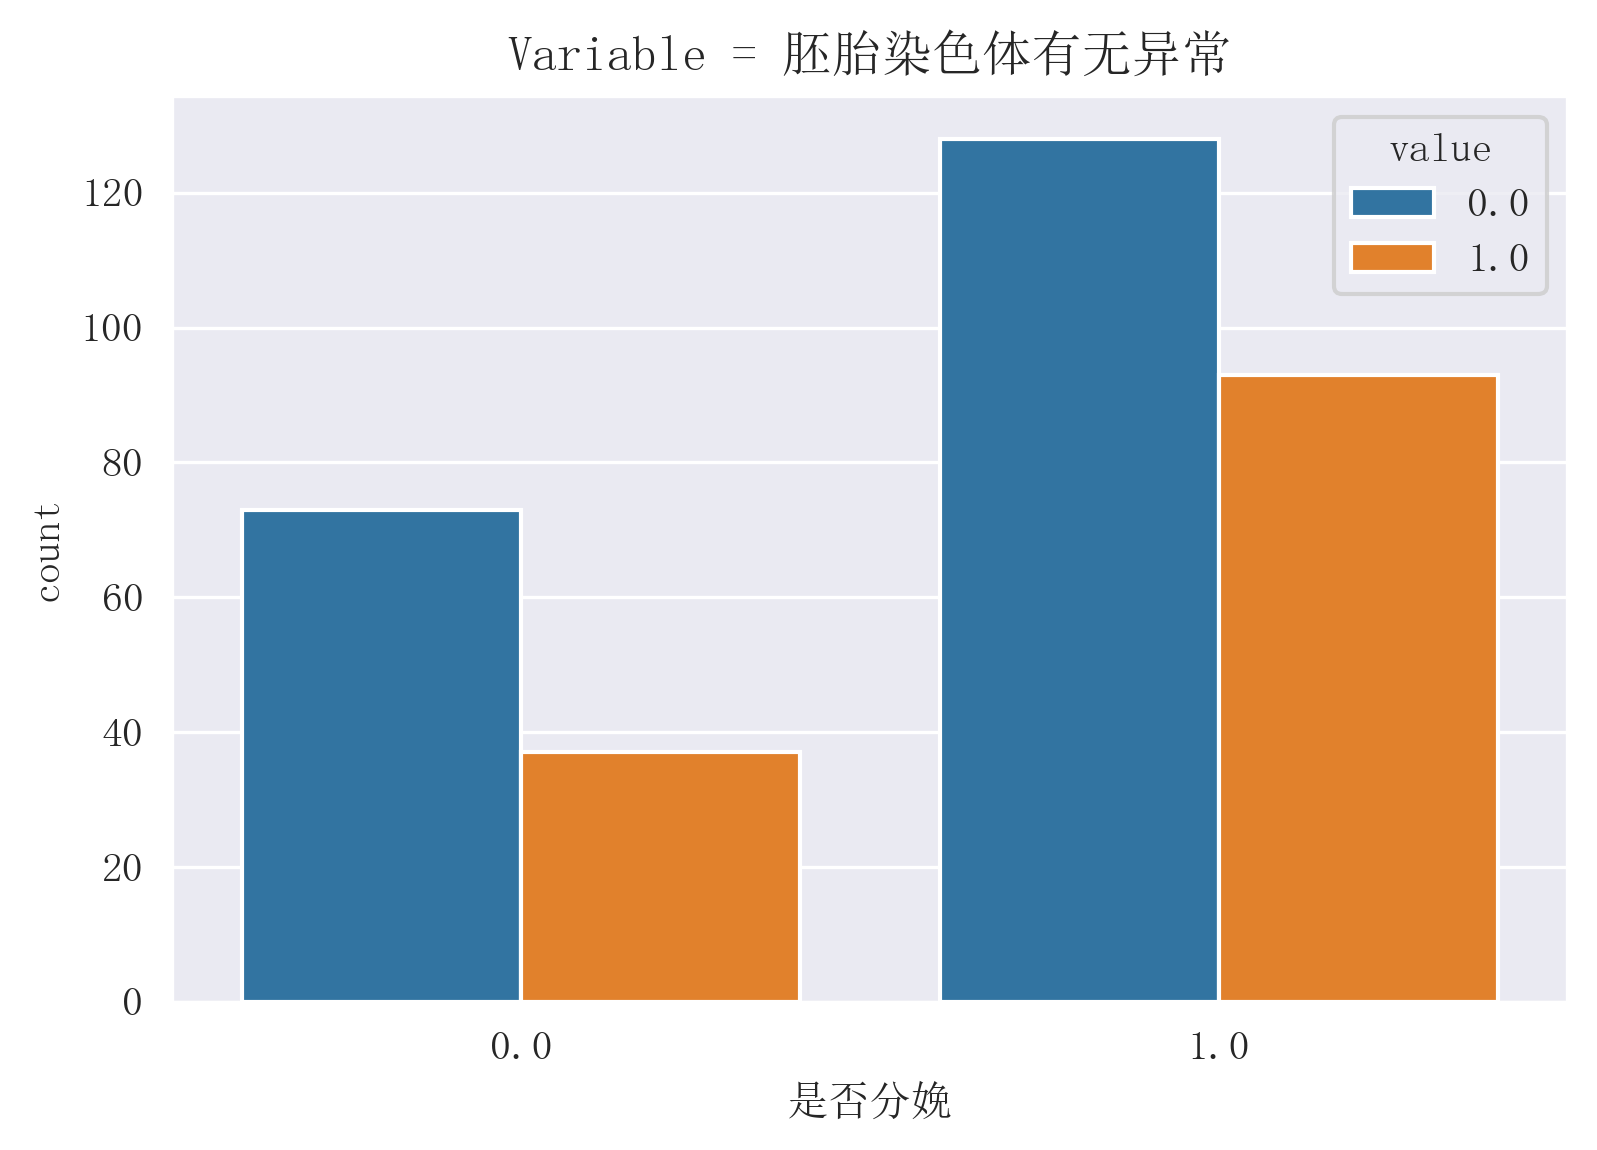

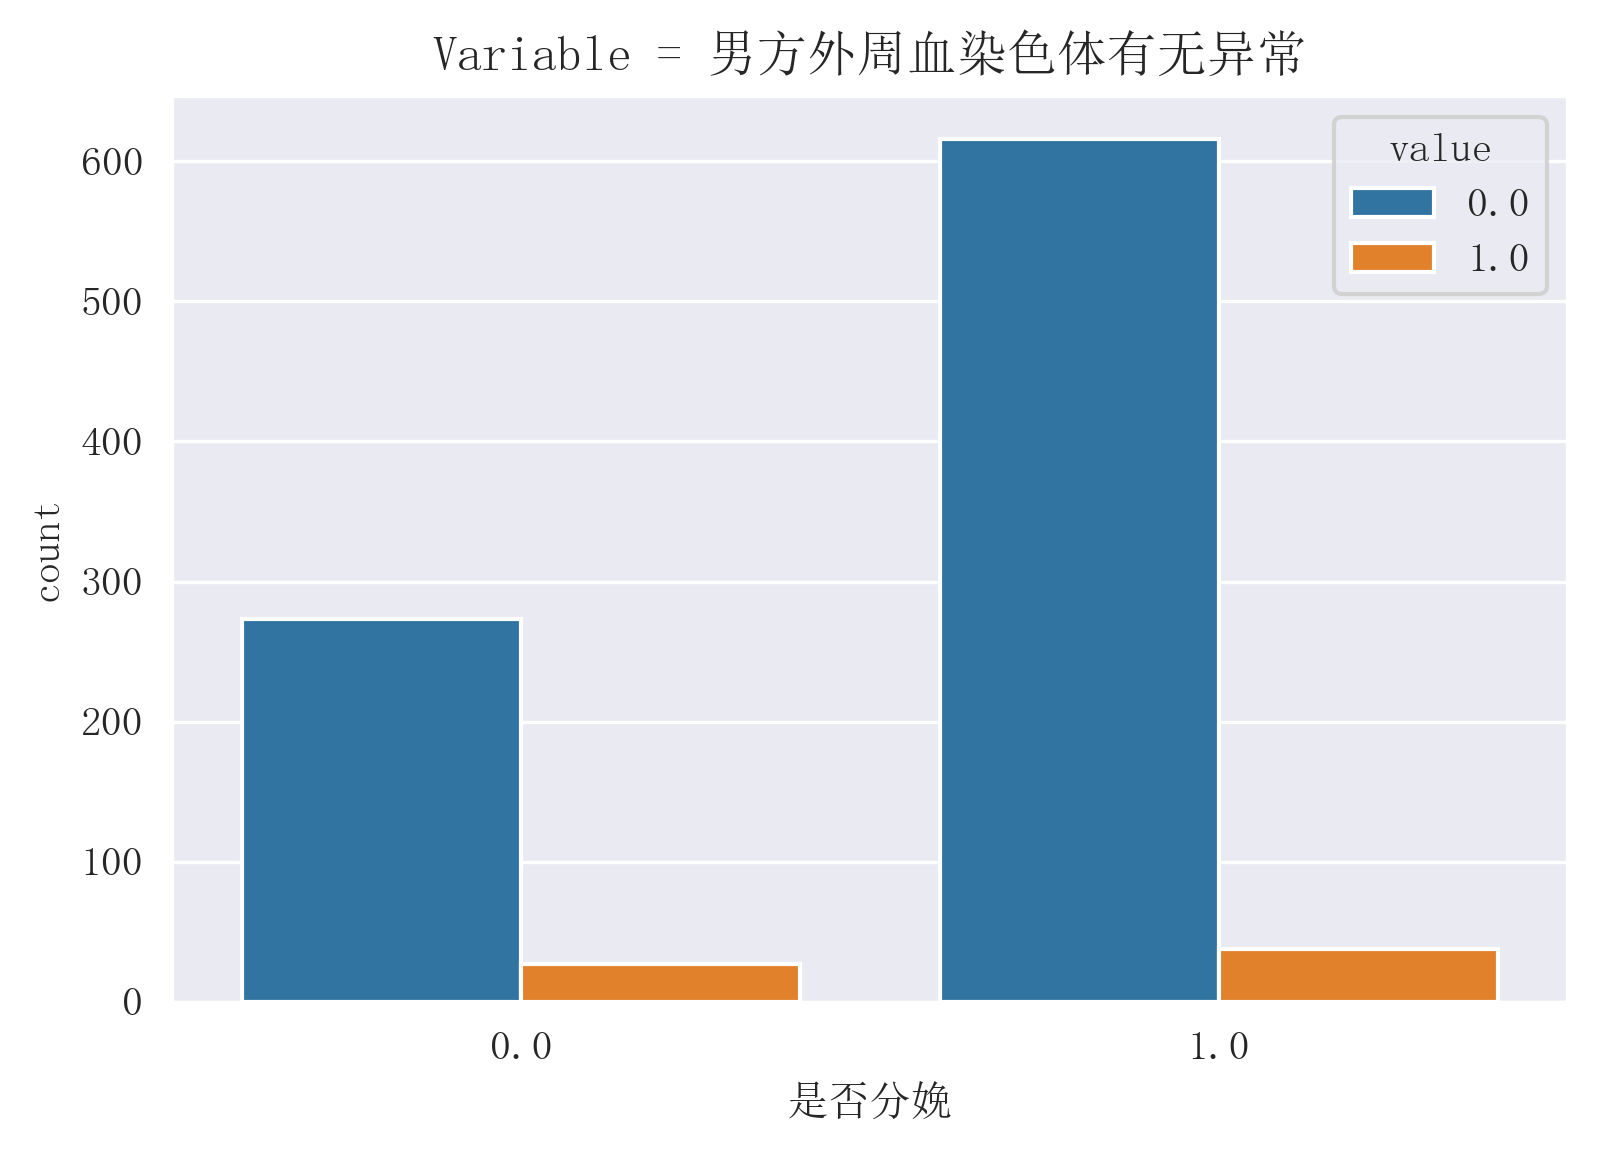

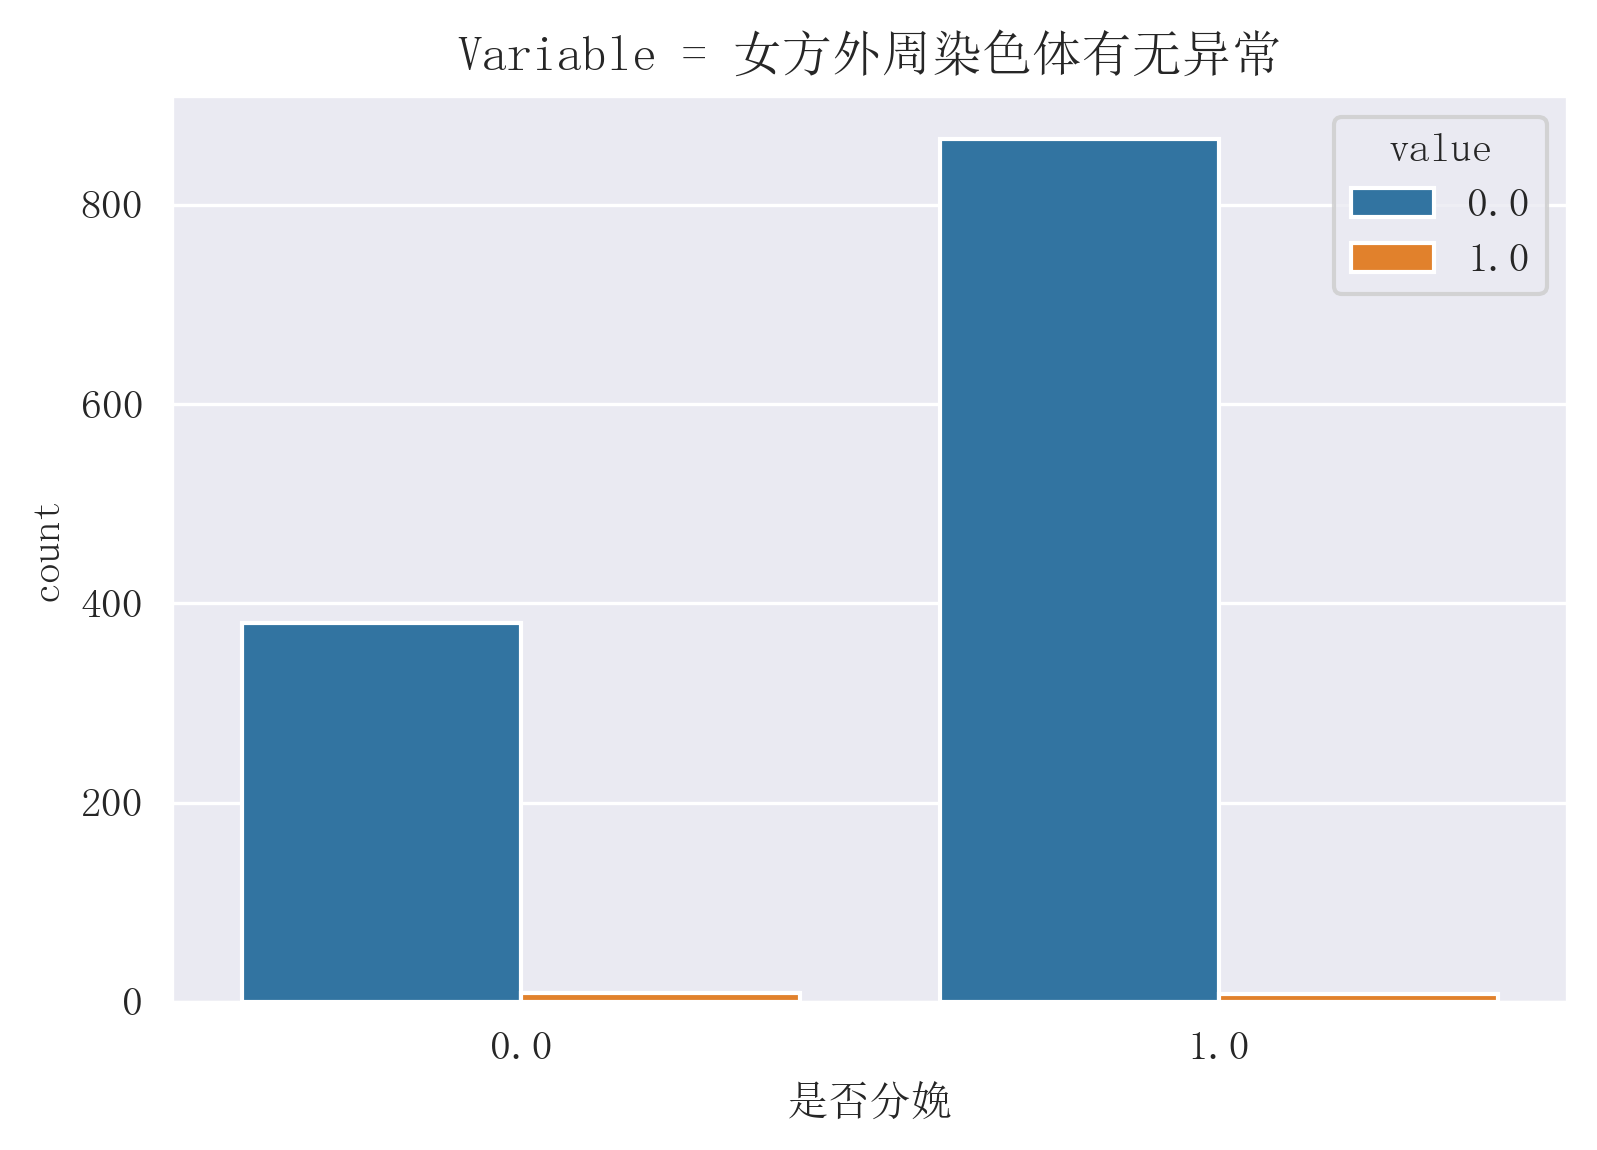

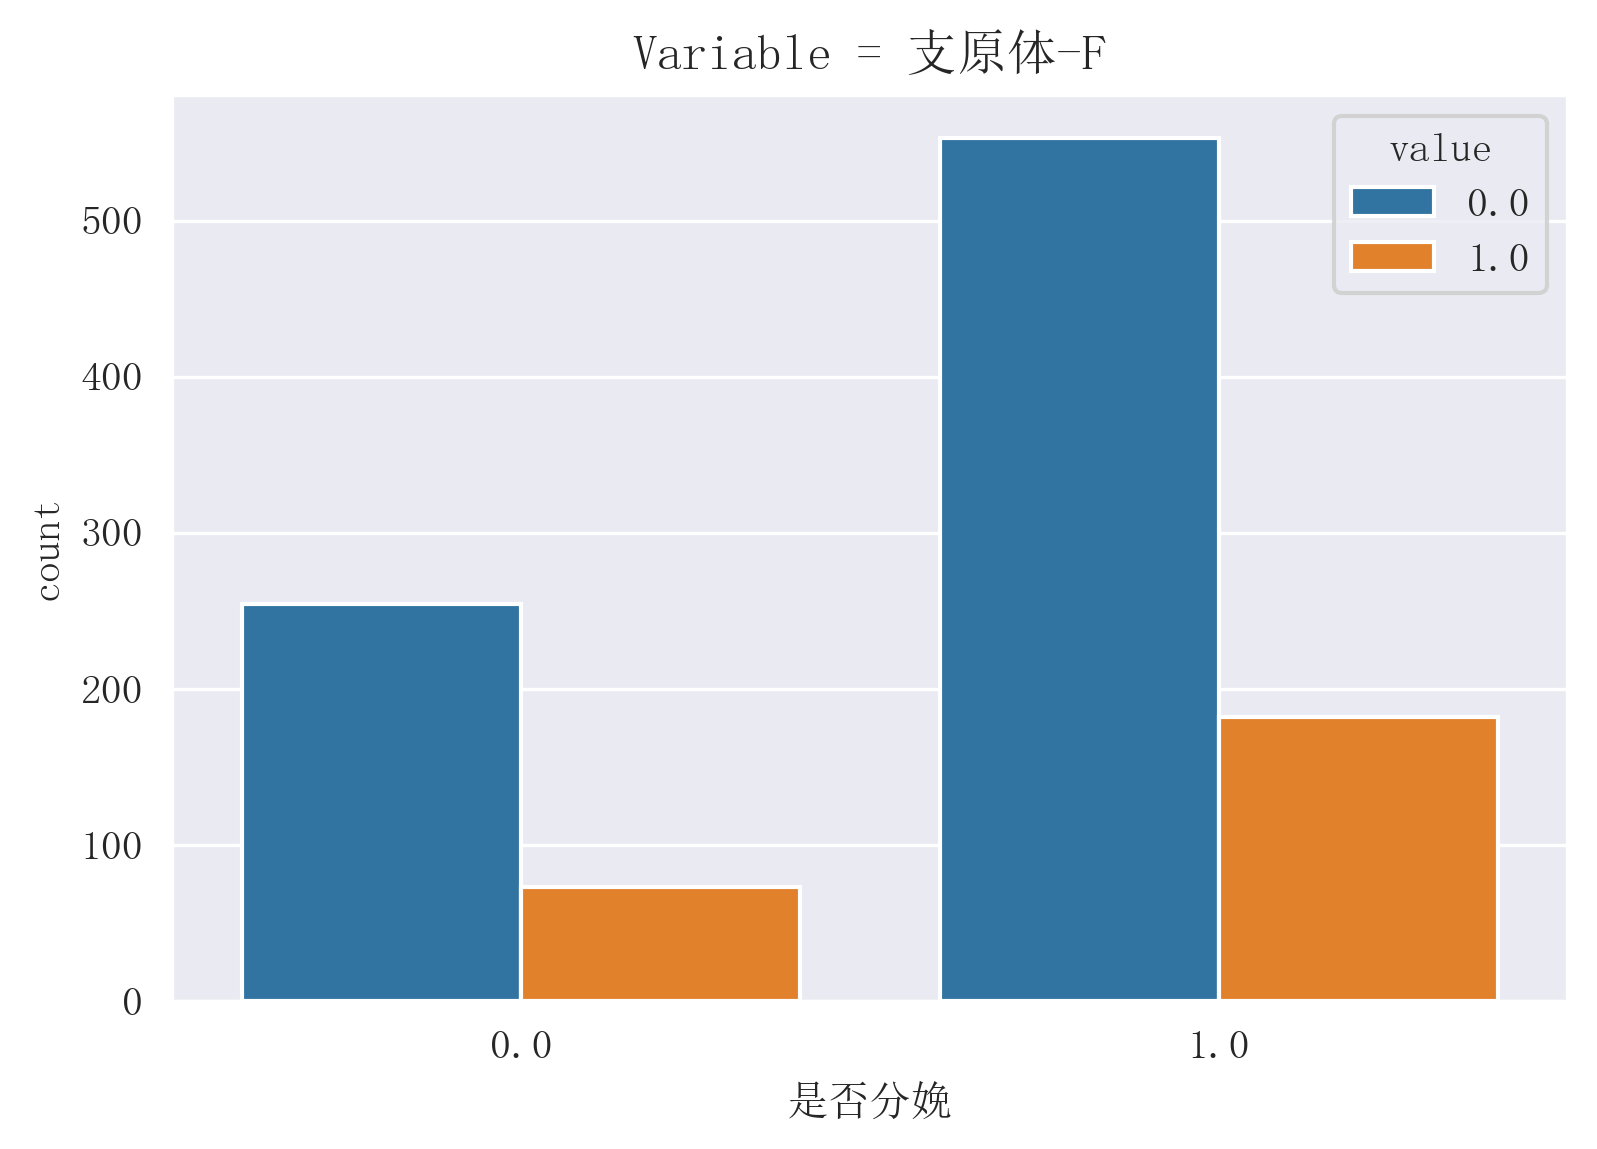

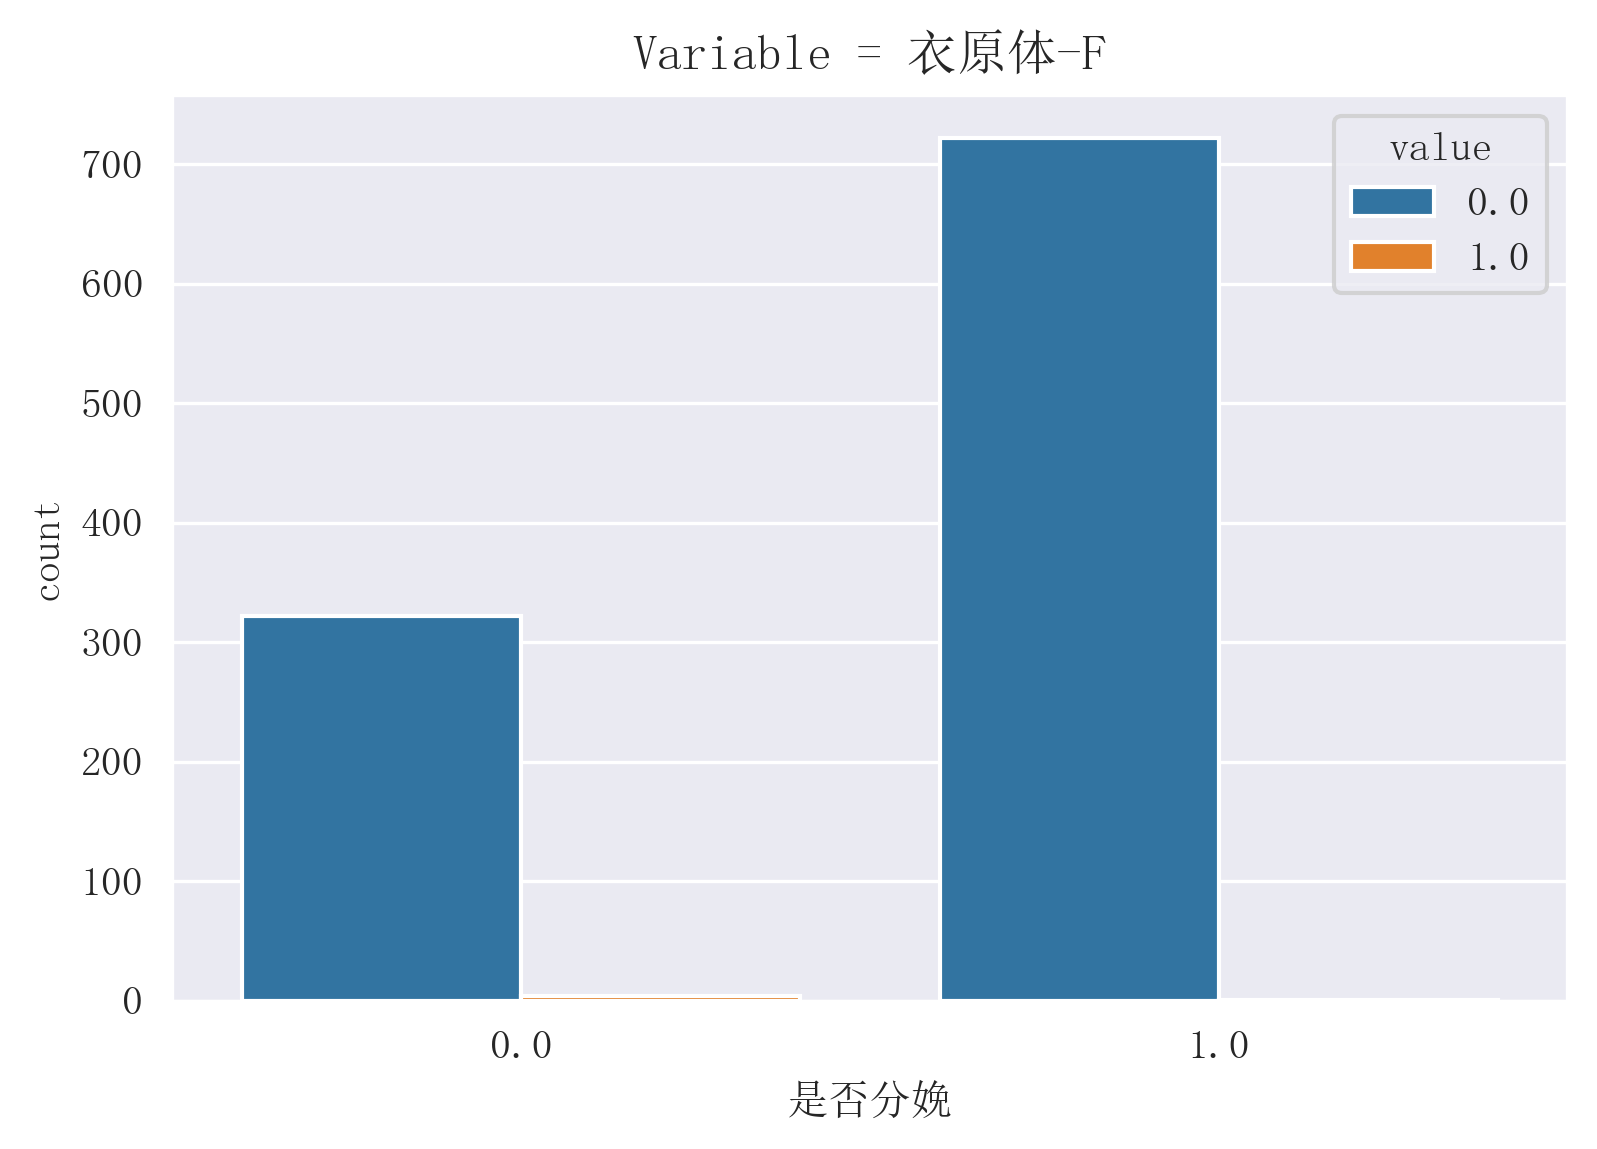

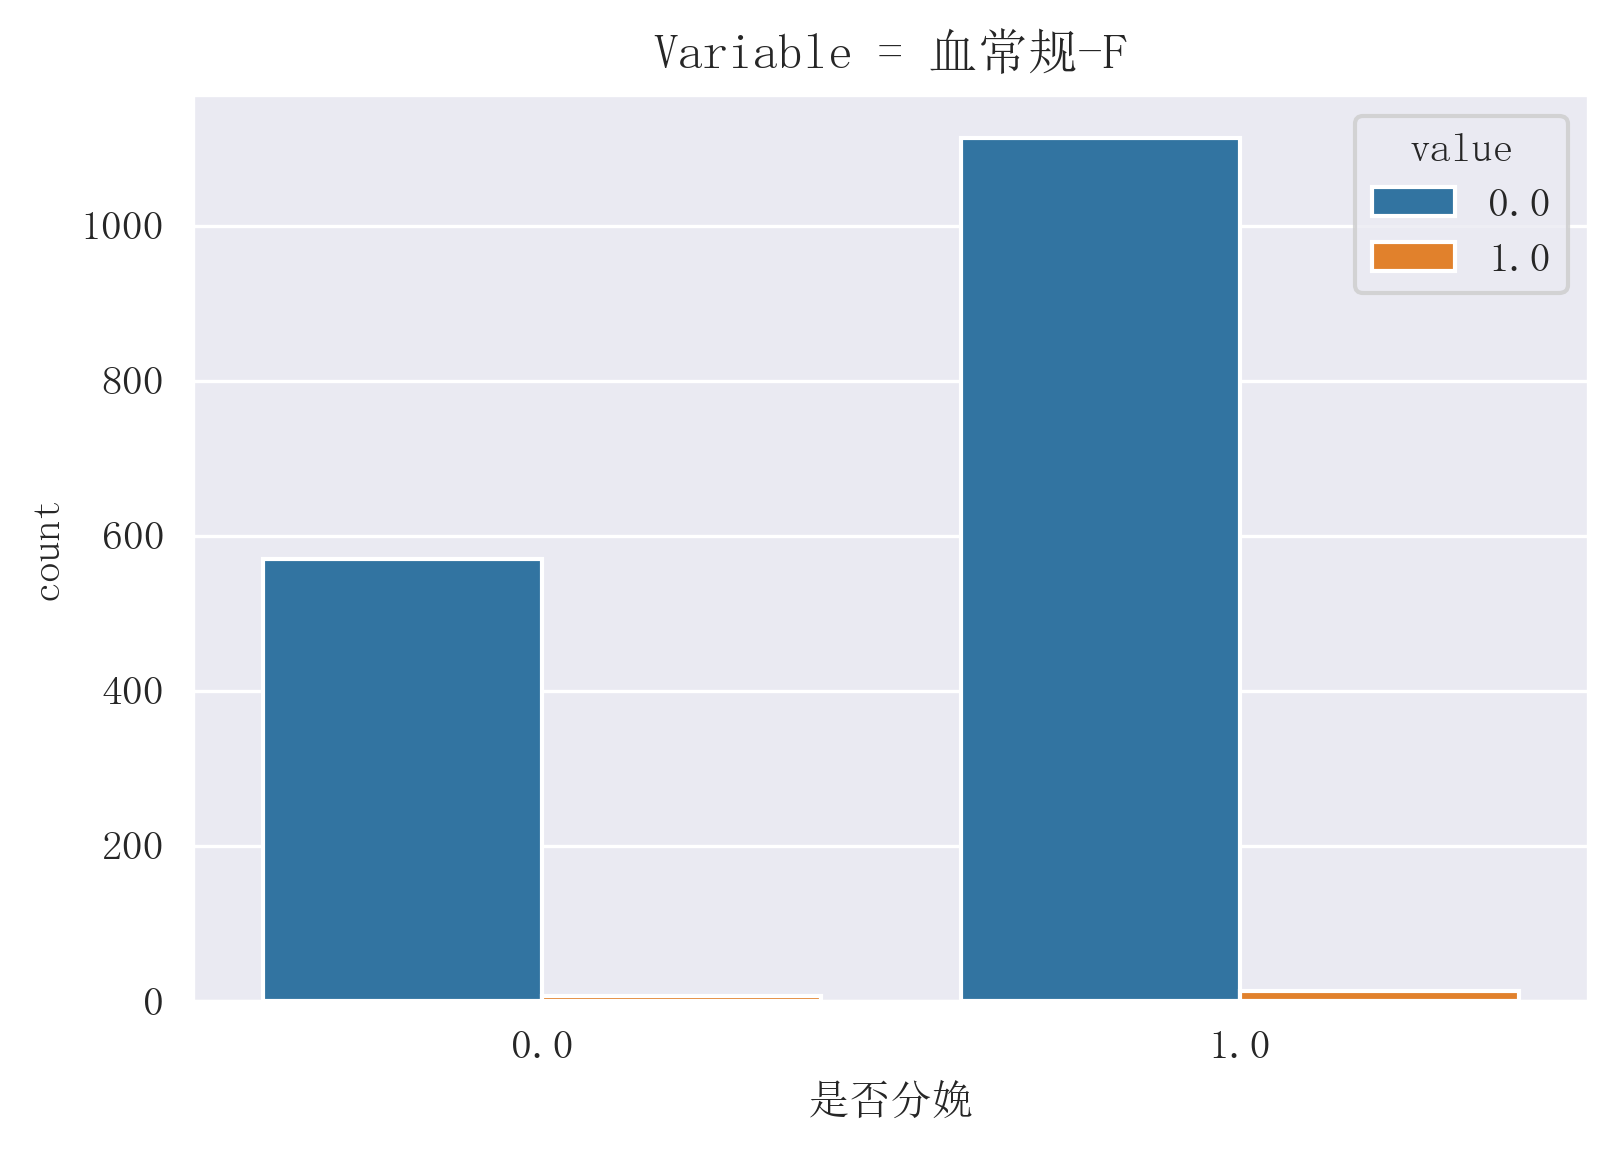

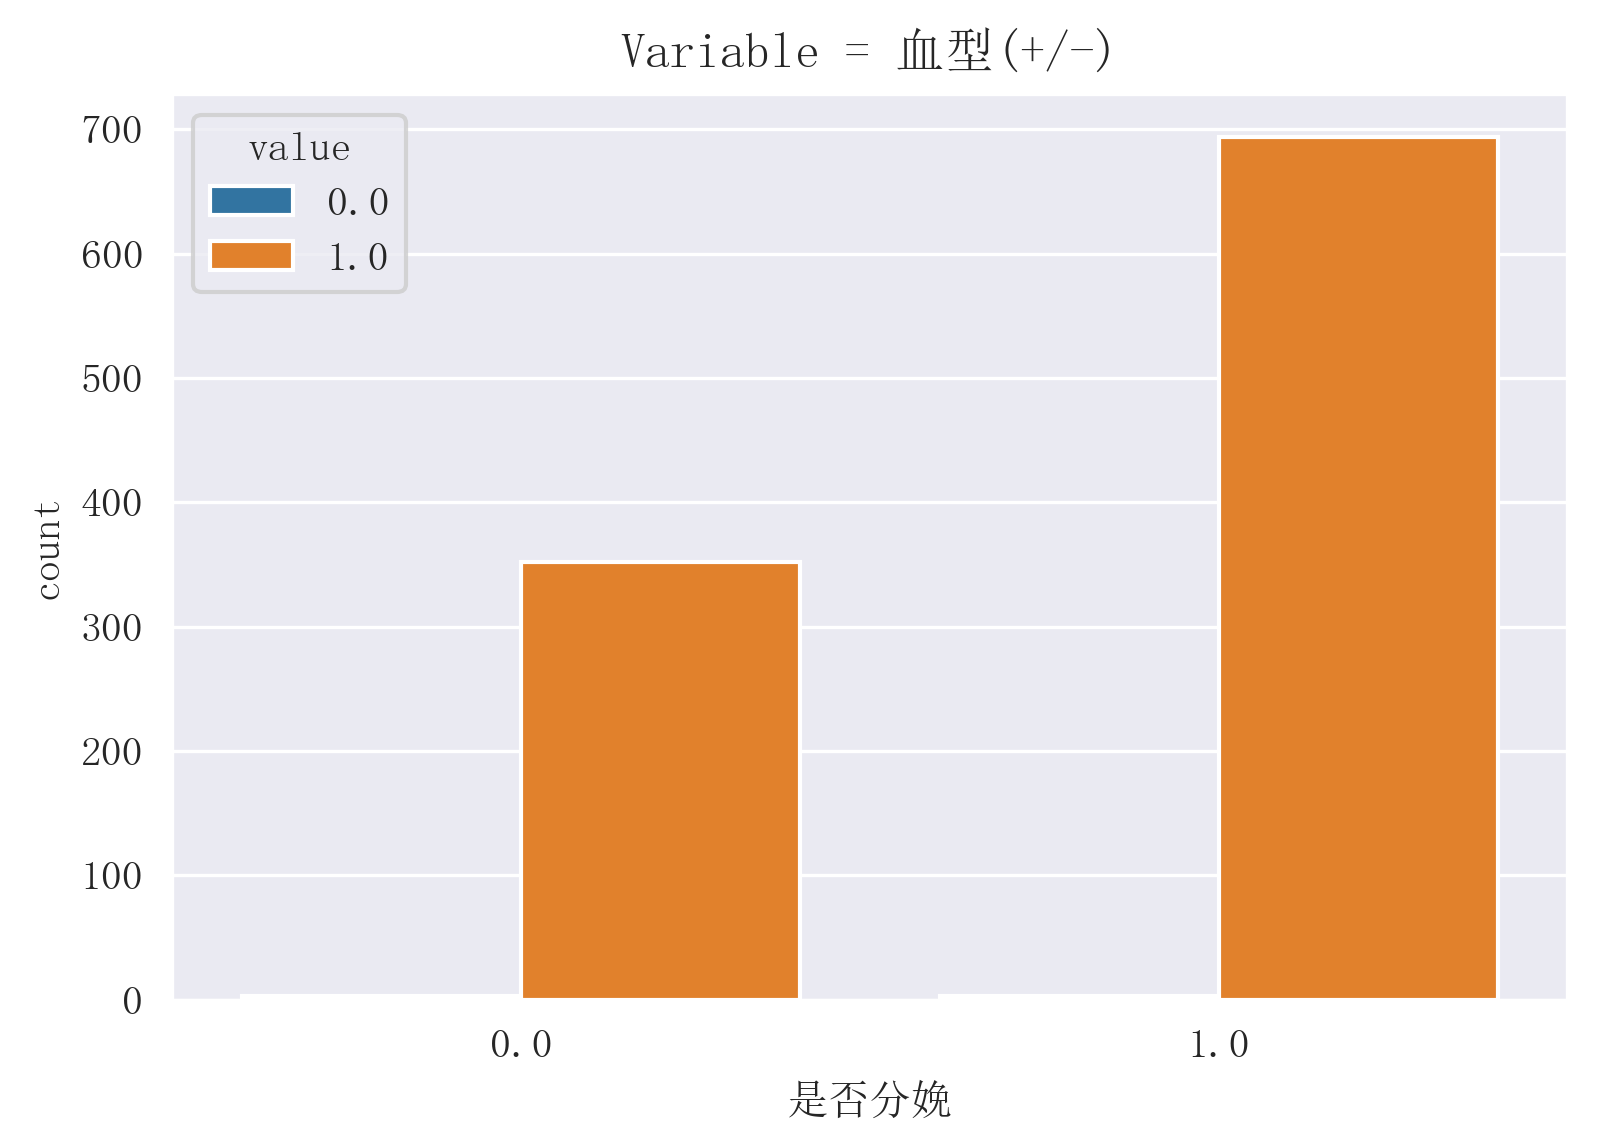

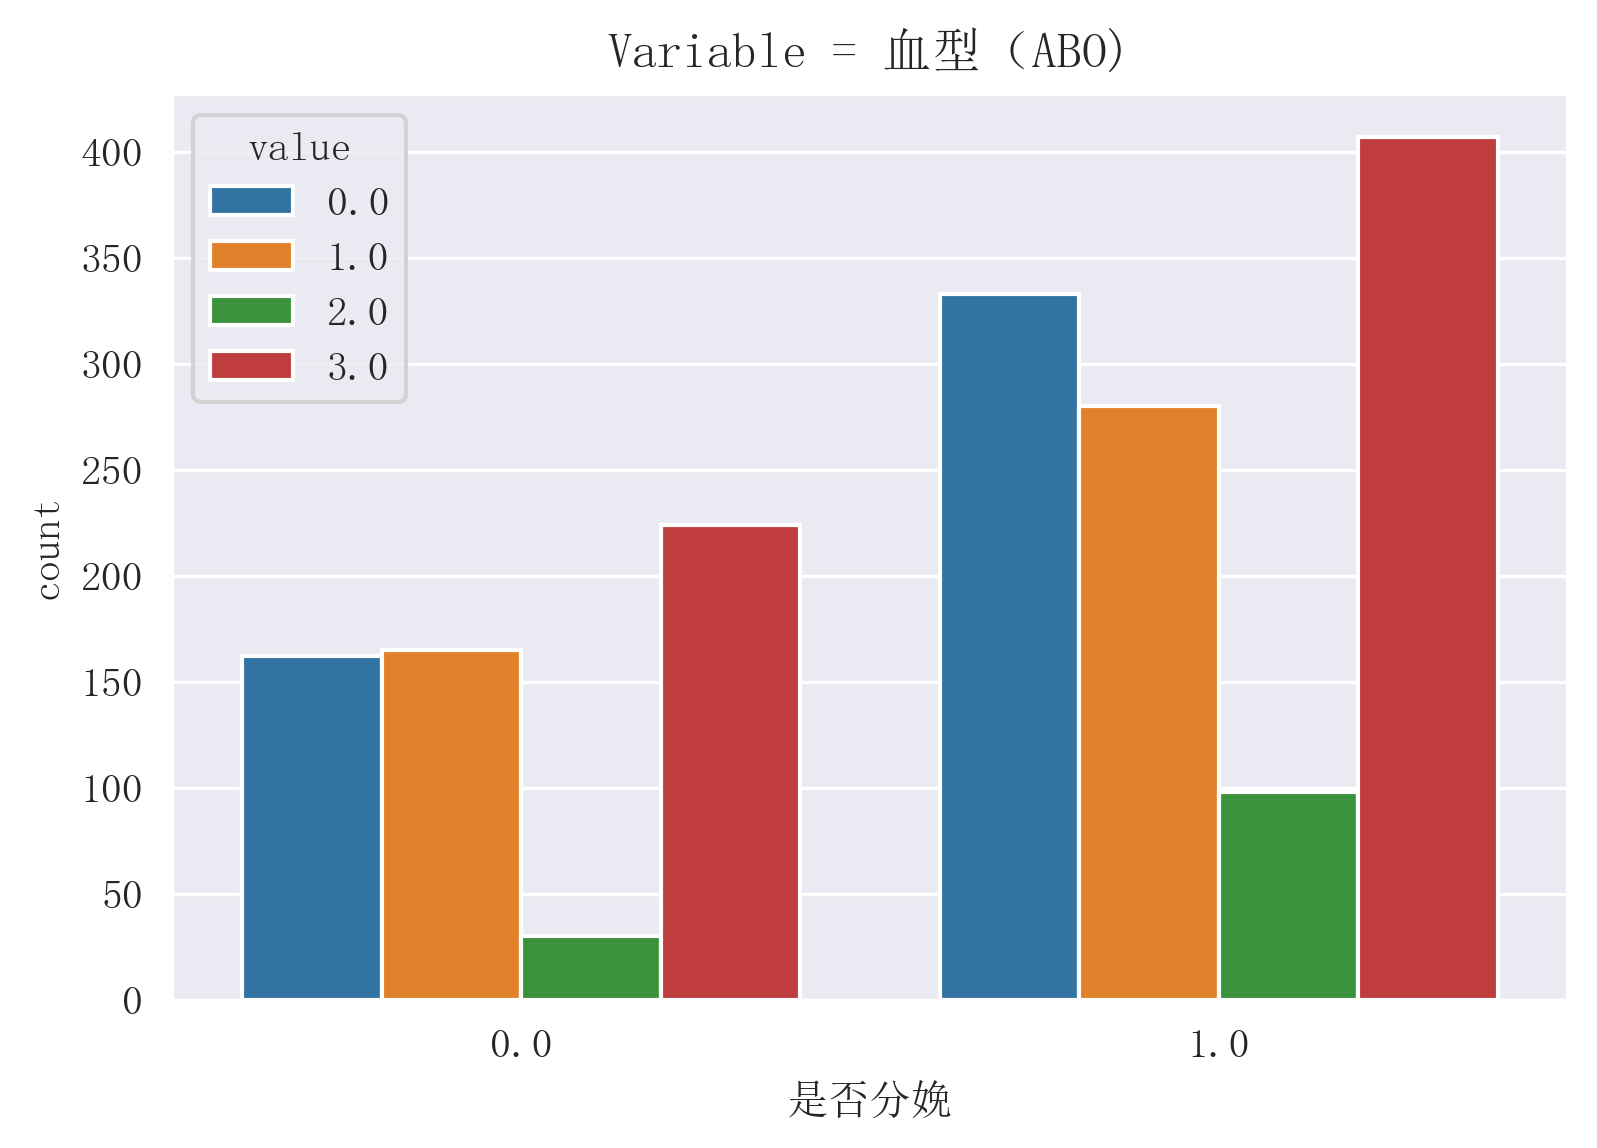

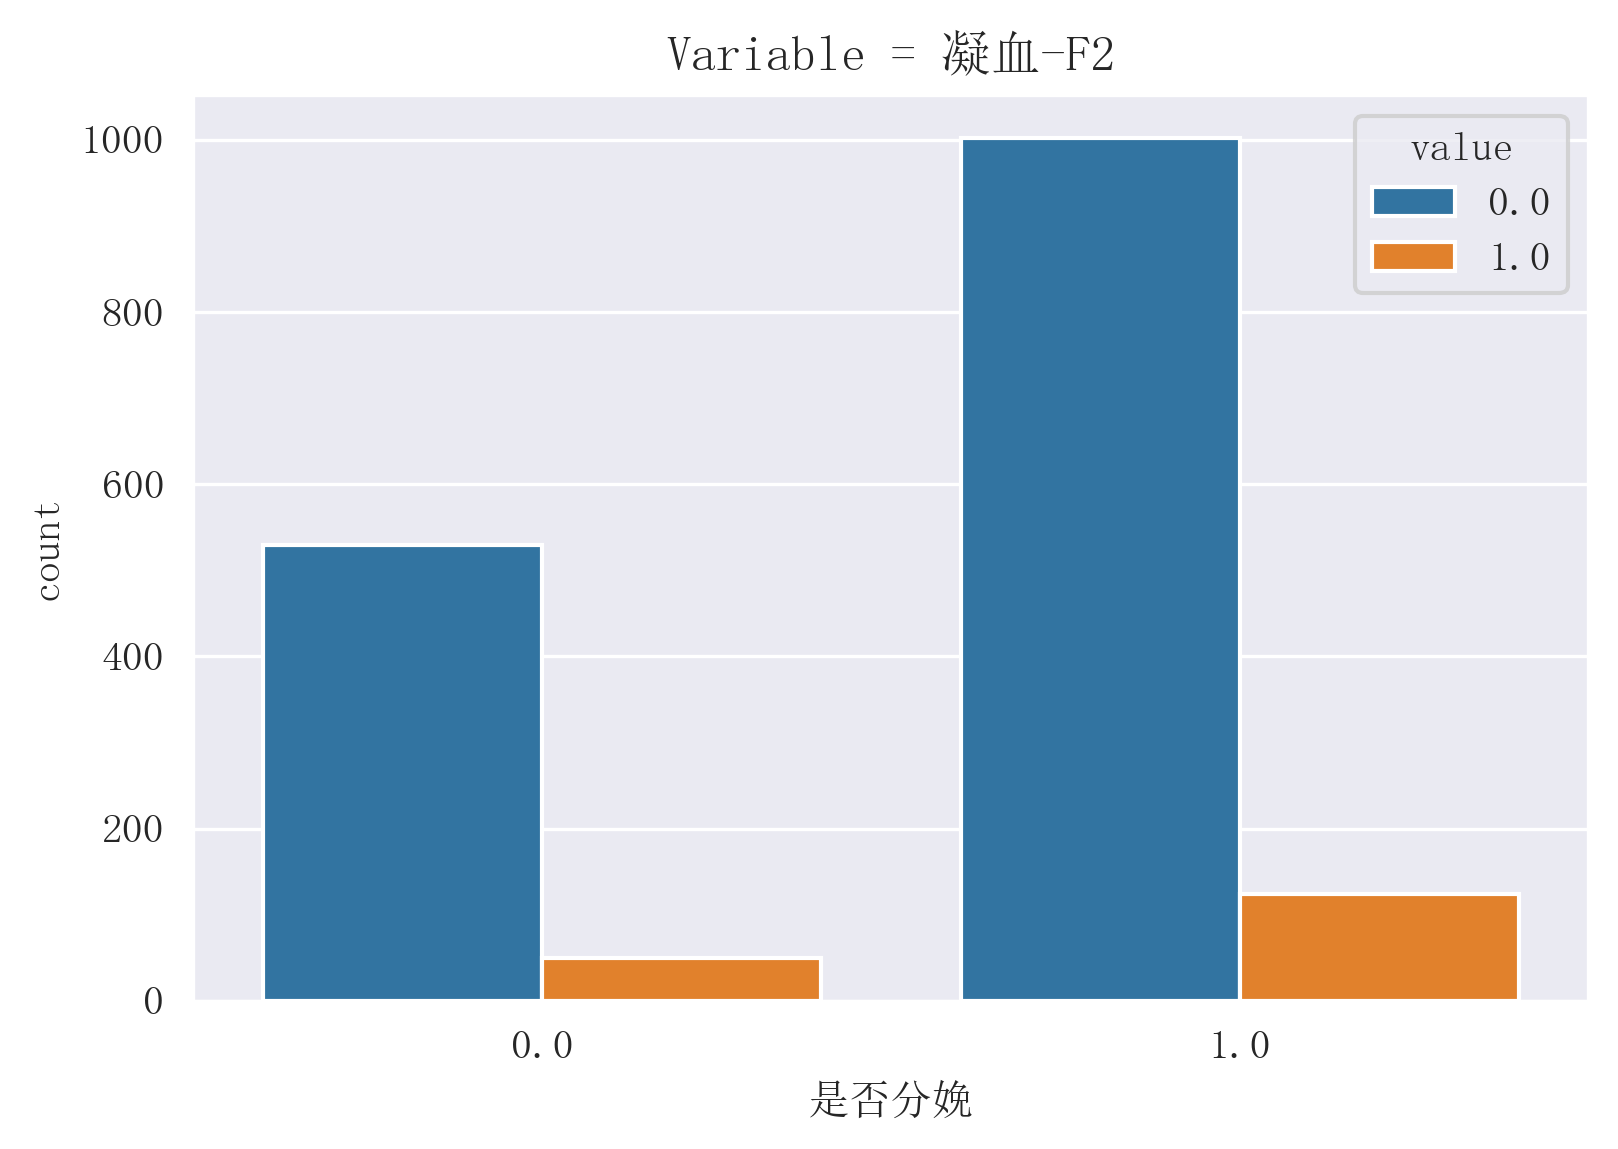

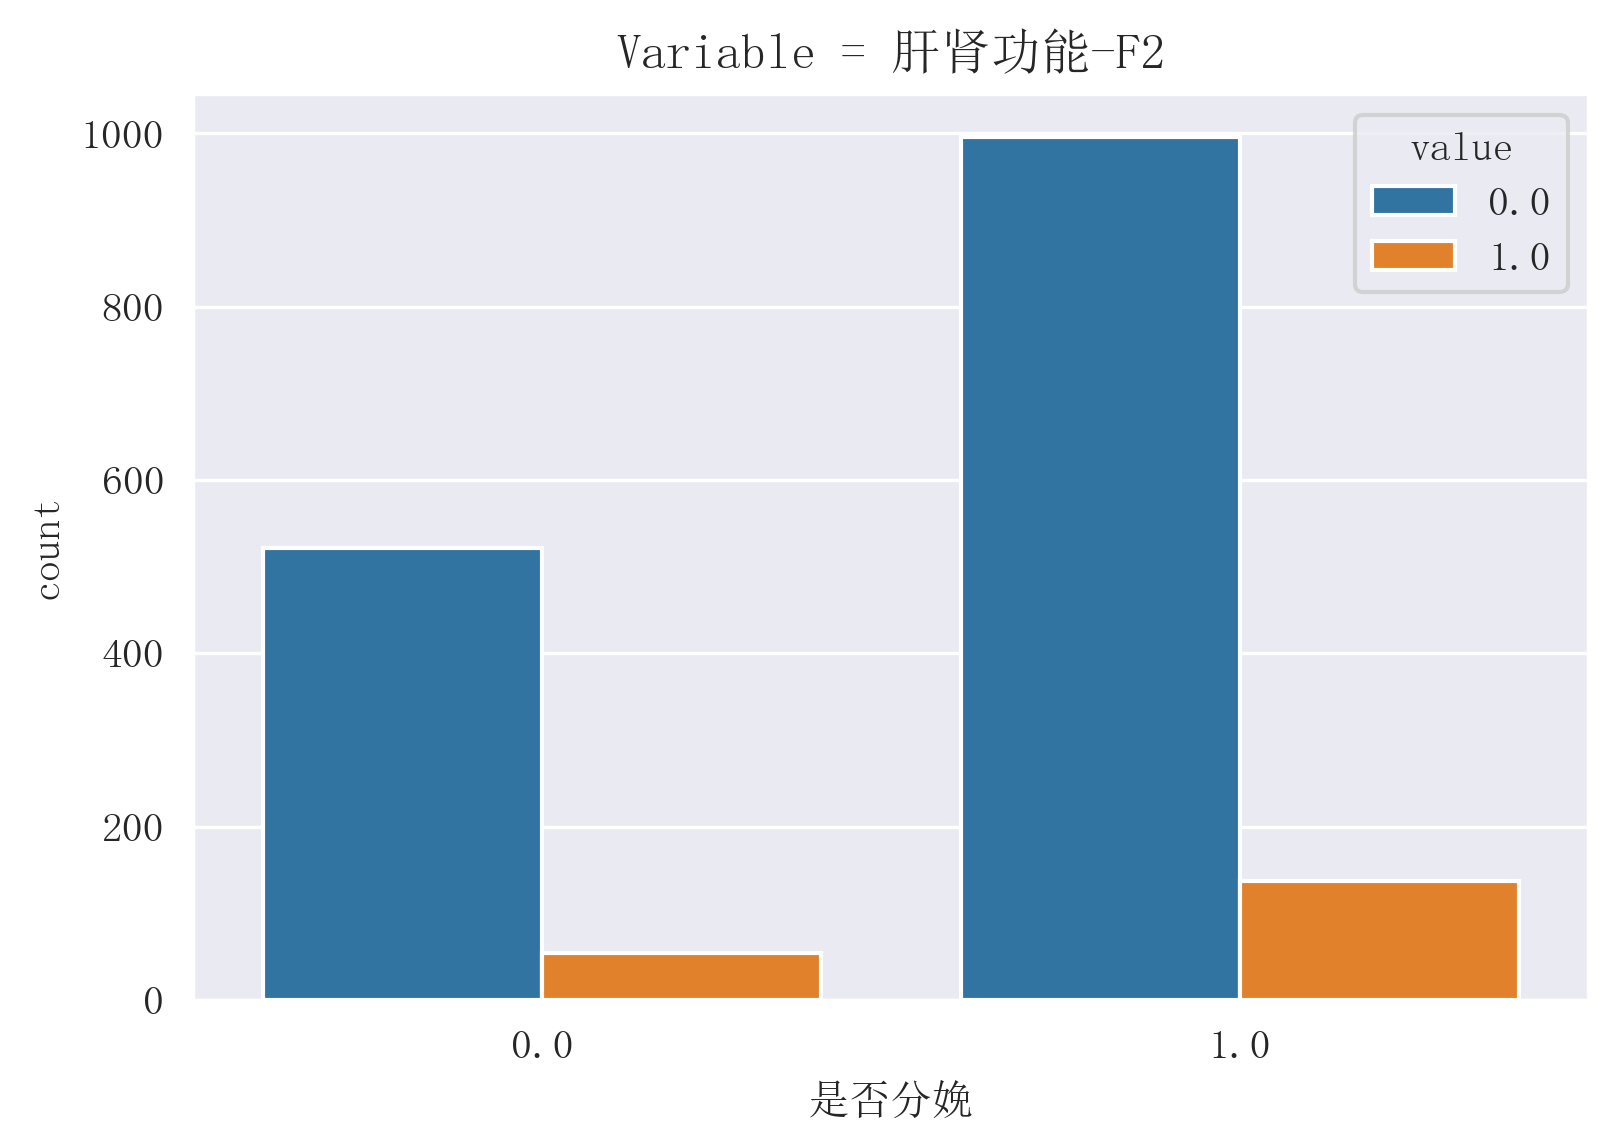

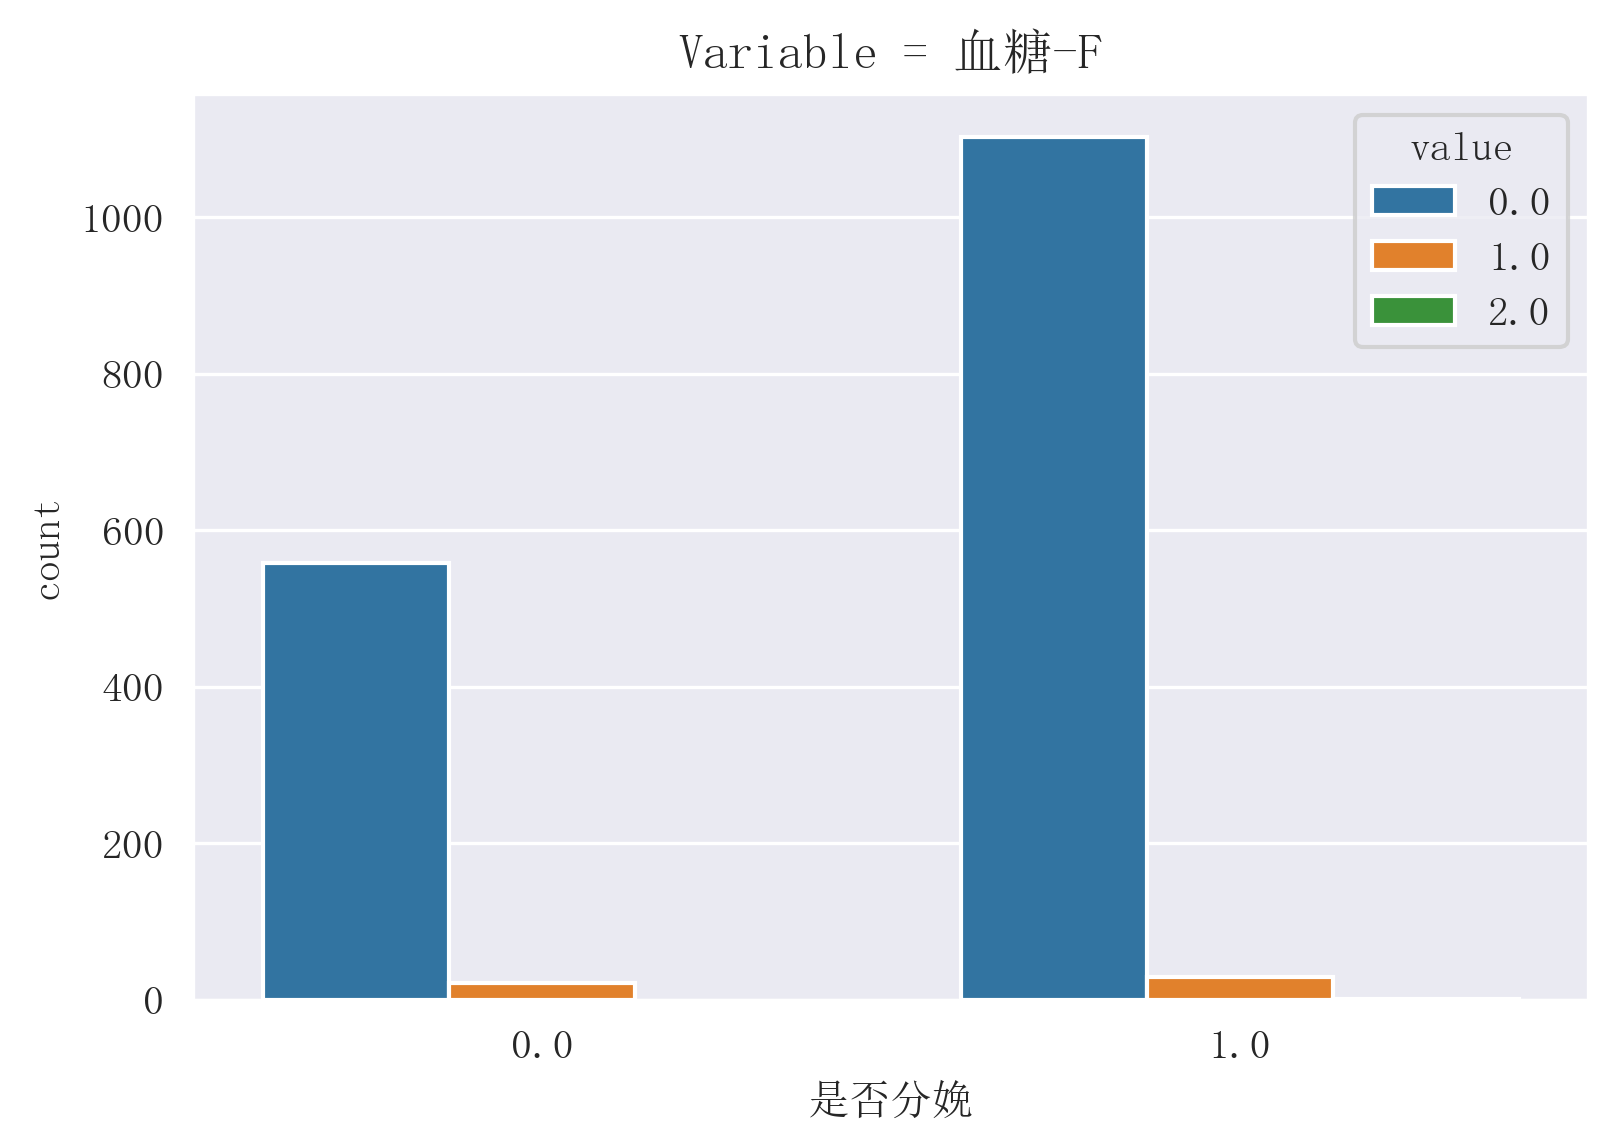

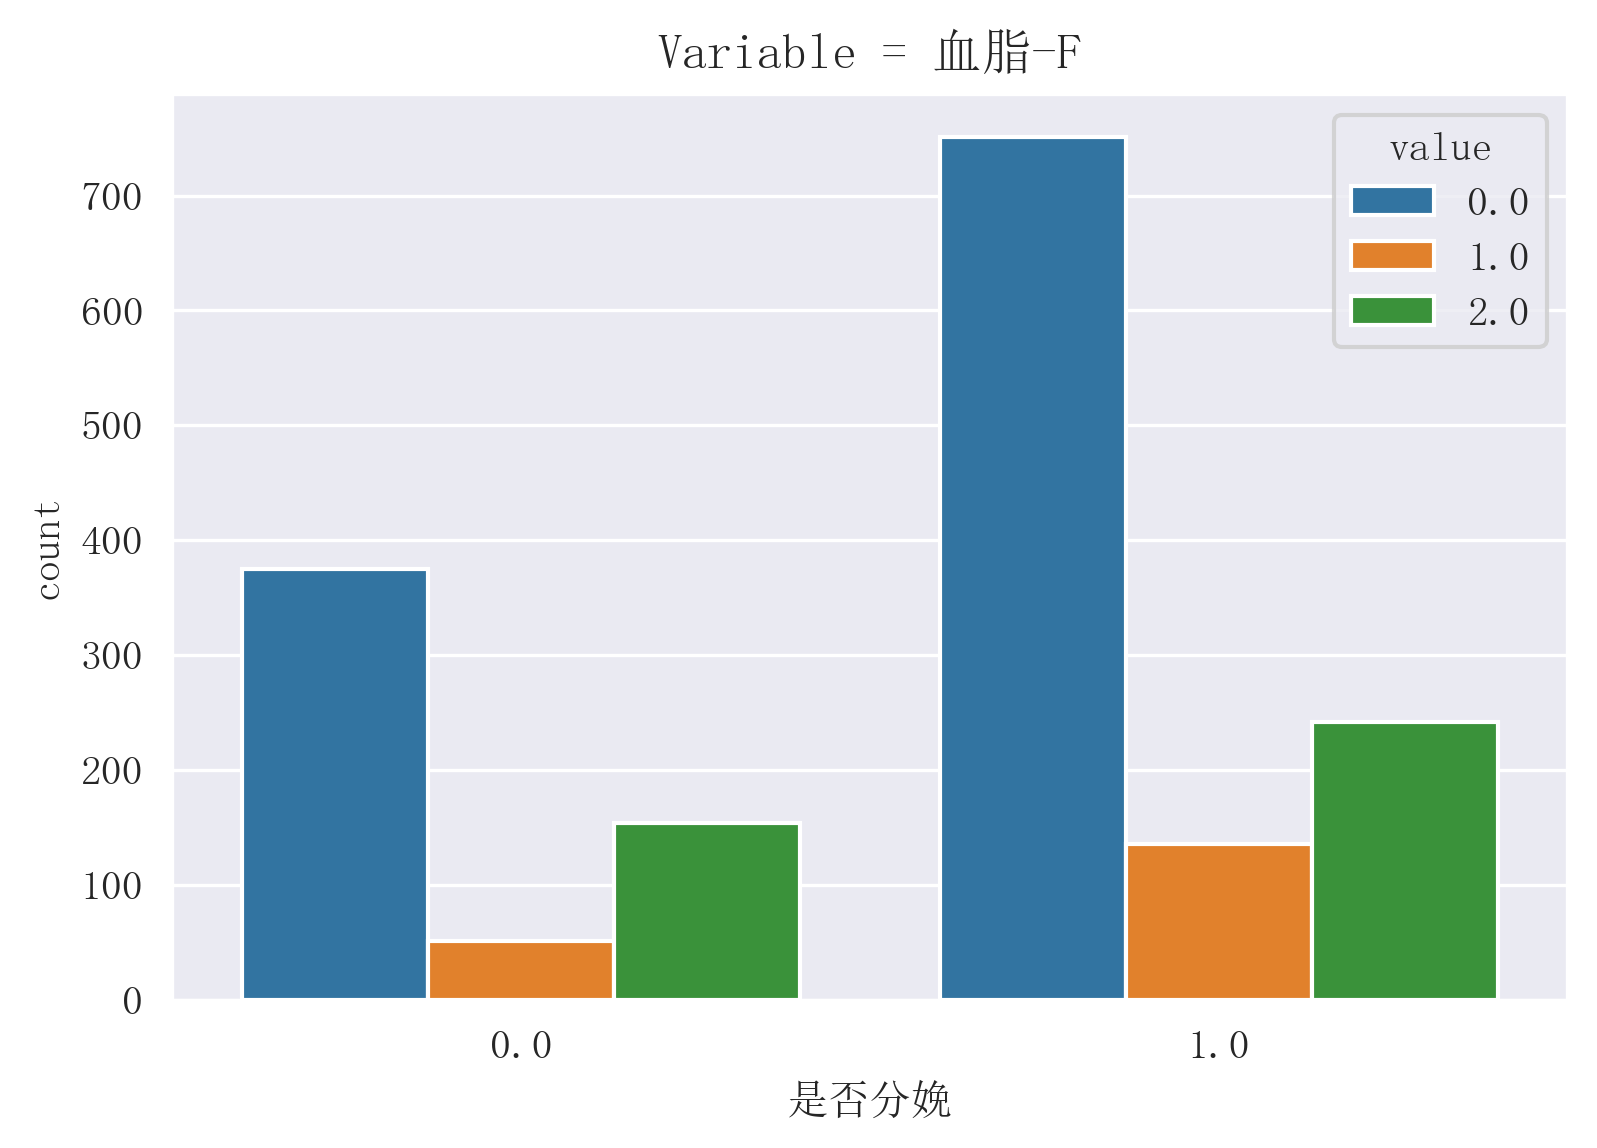

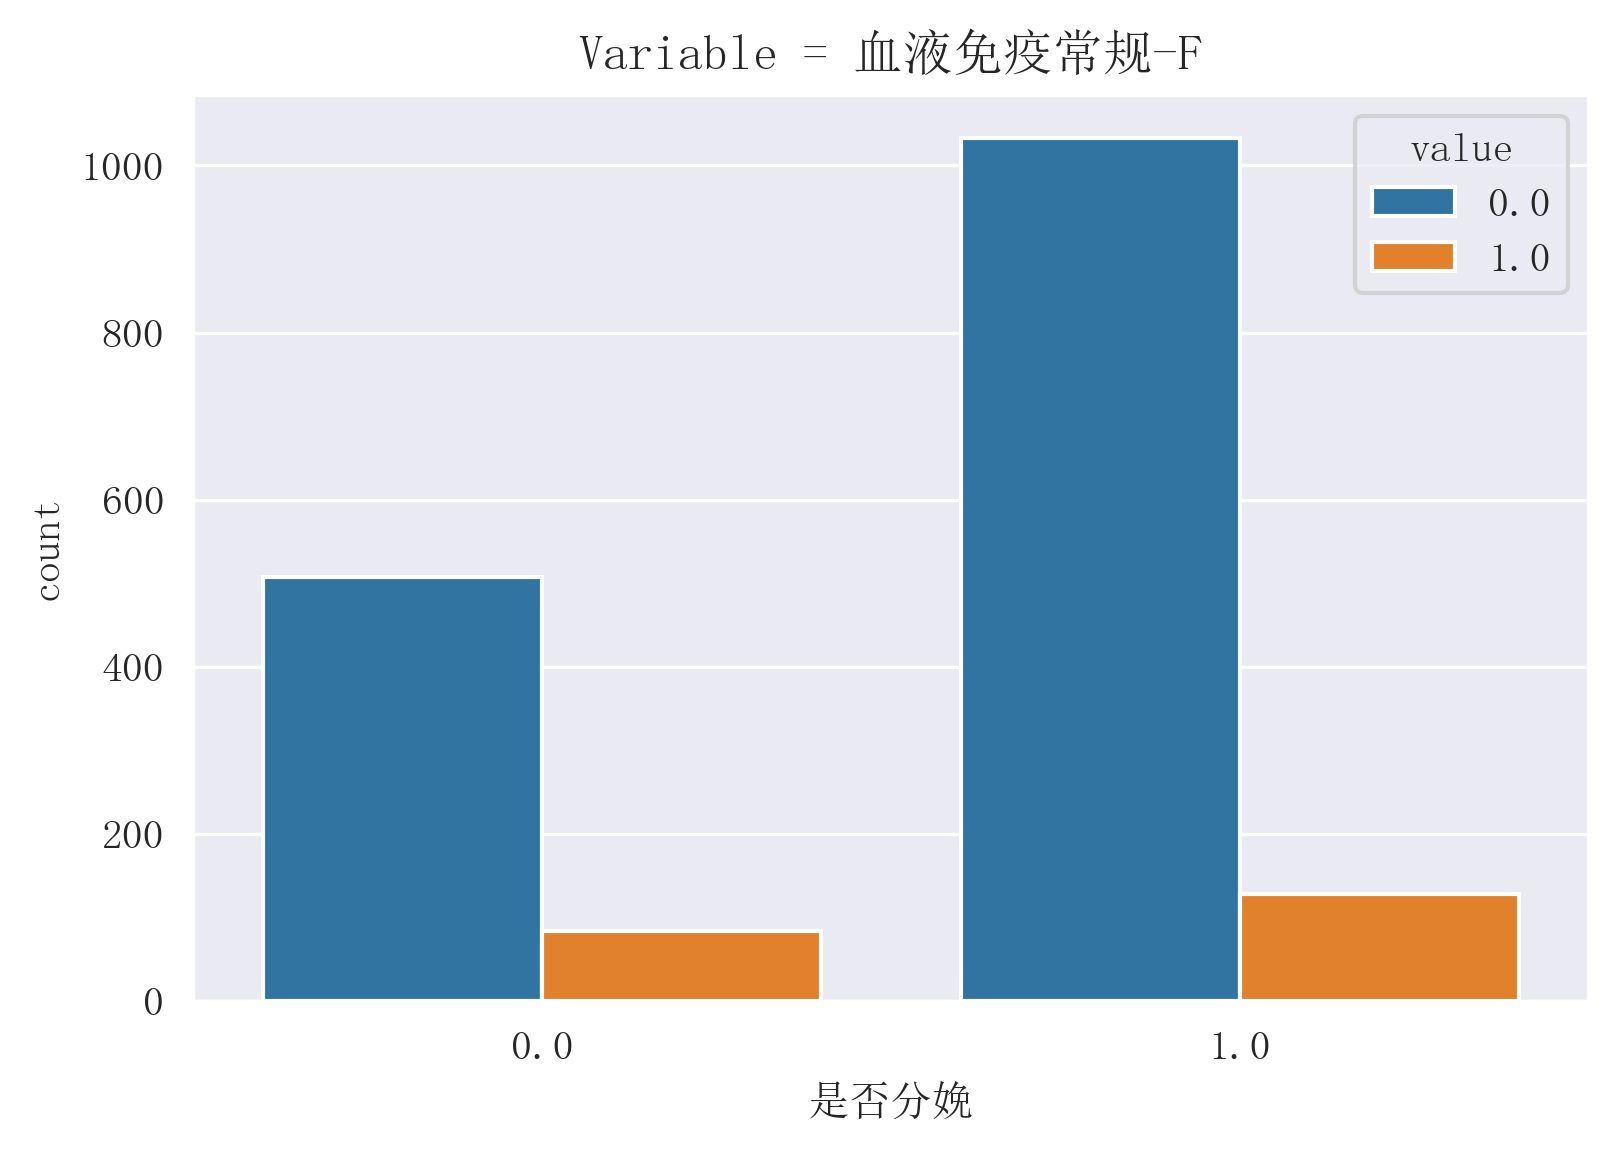

In [57]:

dataset_cate = dataset[VARS_ALL["cate"]+[y]]

for i in VARS_ALL['cate']:
    dataset_melt = pd.melt(dataset_cate, id_vars=y, value_vars= i).dropna()
    # display(dataset_melt[dataset_melt.isnull().T.any()])
    #display(dataset_melt)
    sns.set_style("darkgrid",{"font.sans-serif":["SimSun"]})
    plt.figure(dpi=300)
    # sns.barplot(x=y,y="value",data=dataset_melt)
    # plt.title("Variable = %s"%(i))
    # plt.show()
    sns.countplot(x=y, hue="value", data=dataset_melt)
    plt.title("Variable = %s"%(i))
    i = i.replace('*', '')
    if '/' in i:
        plt.savefig('./fig/cate/%s.png'%(i[:i.find('/')]))
    else:  
        plt.savefig('./fig/cate/%s.png'%(i))
    #plt.show()



## Correlation Calculation

## Loading Yujia data 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Parturition              1875 non-null   float64
 1   Age                      1859 non-null   float64
 2   BMI                      1836 non-null   float64
 3   E2                       929 non-null    float64
 4   P                        840 non-null    float64
 5   T                        881 non-null    float64
 6   TSH                      1719 non-null   float64
 7   TT3                      1444 non-null   float64
 8   FT3                      1690 non-null   float64
 9   FT4                      1690 non-null   float64
 10  EMAb                     1778 non-null   float64
 11  AoAb                     1747 non-null   float64
 12  ACA-IgM                  694 non-null    float64
 13  Ab anti-β2 GP1           689 non-null    float64
 14  Protein S               

C:\Users\14599\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


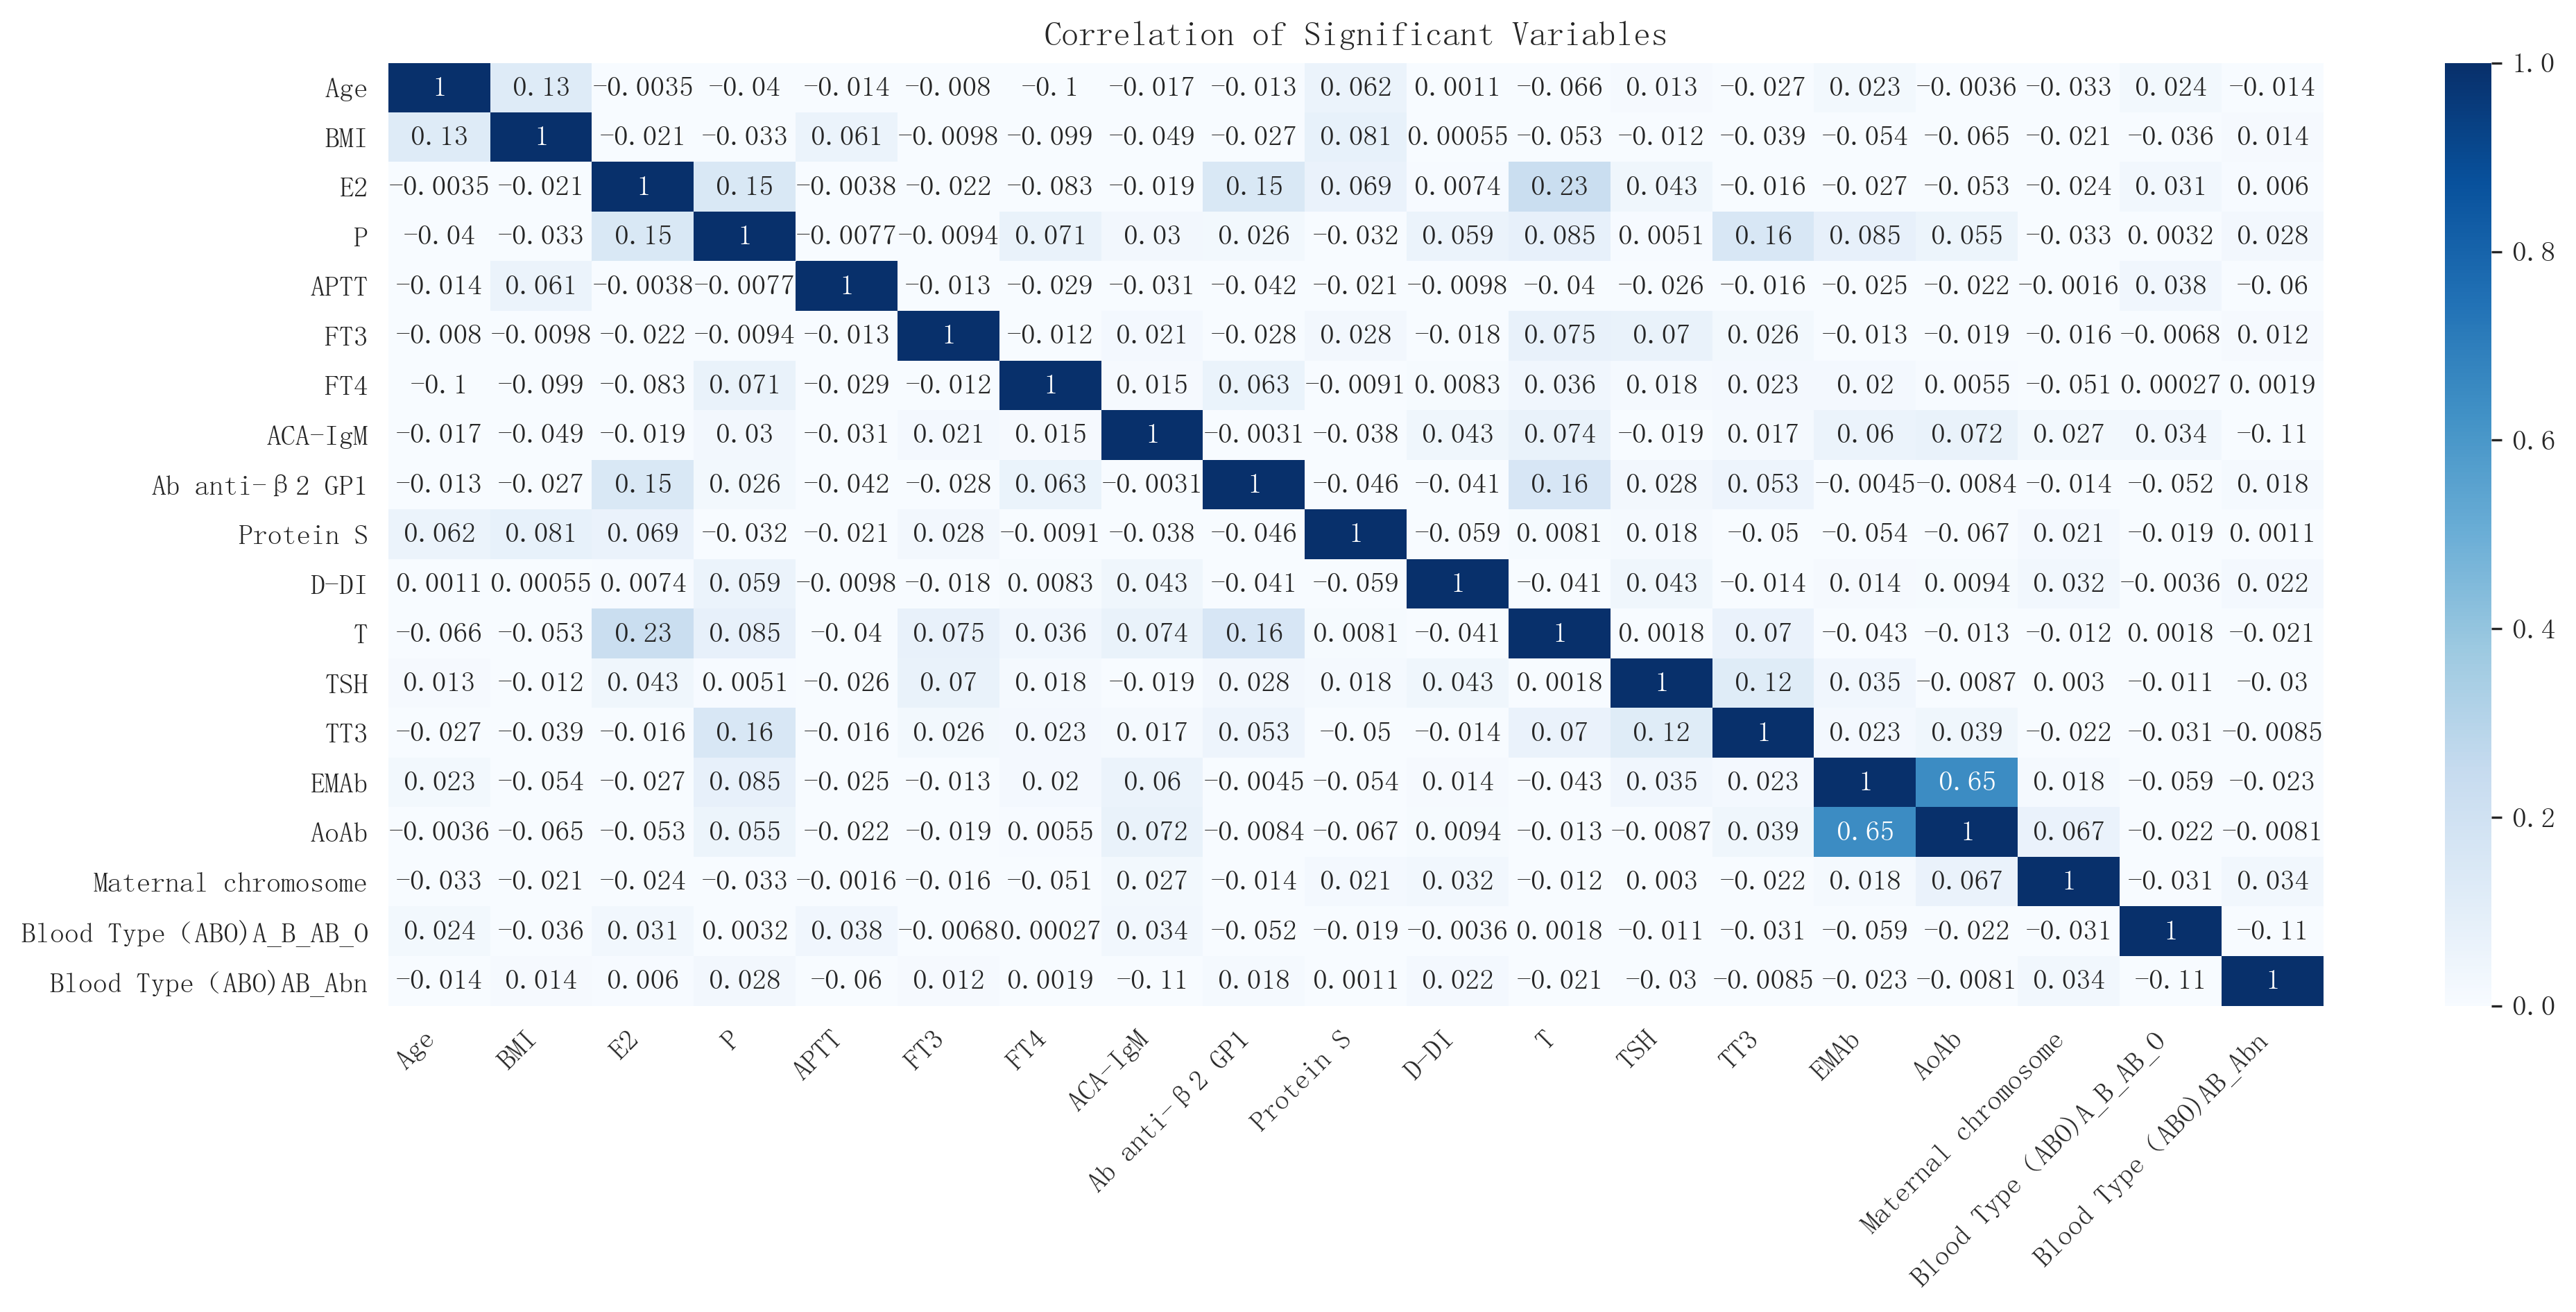

In [66]:
# load dataset
dataset_yujia = pd.read_excel("./FOR CODE-V6.0.xlsx", convert_float=False)
# variables
VARS_ALL_yujia = \
    {
        "num": ['Age', 'BMI', 'E2', 'P', 'APTT', 'FT3', 'FT4', 'ACA-IgM', 'Ab anti-β2 GP1', 'Protein S', 'D-DI'],
        
        "cate": ['T', 'TSH', 'TT3', 'EMAb', 'AoAb', 'Maternal chromosome', 'Blood Type（ABO)A_B_AB_O','Blood Type（ABO)AB_Abn']
    }

for i in list(dataset_yujia.columns):
    if dataset_yujia[i].dtypes == 'object':
        dataset_yujia[i] = pd.to_numeric(dataset_yujia[i], errors='coerce')
print(dataset_yujia.info())

y = "Parturition"
ALL_X_yujia = [*VARS_ALL_yujia["num"], *VARS_ALL_yujia["cate"]]
corr = dataset_yujia[ALL_X_yujia].corr()

fig = plt.figure(figsize=(15,6),dpi=300)
ax = fig.add_subplot(111)
sns.heatmap(corr, annot=True, vmax=1, vmin = 0, cmap="Blues")
ax.set_xticklabels(
    labels = ALL_X_yujia,
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Correlation of Significant Variables")
fig.show()
